In [1]:
import sys
import os
import pandas as pd

sys.path.append(os.path.abspath("../scripts"))

In [26]:
from data_loader import load_clean_data
from metrics import get_sentiment_proportions, compute_sentiment_ratios
from visualization import (
    plot_percentages, plot_stacked_bar_chart, plot_comfort, plot_exposure, plot_income, 
    plot_stacked_bar_chart_interaction
)
from sentiment_utils import (
    compute_sentiment_metrics, interpret_metrics, plot_sentiment_trend
)

In [3]:
data_path = "../data/muslim_brand_july_2025.csv"
july25 = load_clean_data(data_path)

In [4]:
july25.columns

Index(['What is your religion?', 'Religion_other',
       'How many Muslim people have you talked to in the last 7 days?',
       'How do you feel about Muslim people in America?',
       'What is your level of education?', 'Where do you get your news from?',
       'News_other',
       'How comfortable do you feel interacting with Muslims in your community?',
       'How often do you hear positive things about Muslims in the media?',
       'In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?',
       'Would you feel comfortable buying goods or services from a Muslim-owned business?',
       'If a Muslim invited you to go to a mosque (Muslims' place of worship), would you go?',
       'How would you rate your own understanding of Muslim religious practices (e.g., Ramadan, daily prayers)?',
       'Do you feel you have a lot in common with Muslims in America?',
       'If you had questions about Islam or Muslims, where would 

## Compute Key Metrics

In [5]:
# Sentiment proportions
sentiment_prop = get_sentiment_proportions(july25, 'How do you feel about Muslim people in America?')
display(sentiment_prop)

# Ratios
pos_neg_ratio, pos_neutral_ratio = compute_sentiment_ratios(july25, \
                                                            'How do you feel about Muslim people in America?')
print(f"Positive to Negative Ratio: {pos_neg_ratio:.2f}")
print(f"Positive to Neutral Ratio: {pos_neutral_ratio:.2f}")


Category  Percentage
0     Good   63.063063
1  Neutral   31.531532
2      Bad    5.405405

Positive to Negative Ratio: 11.67
Positive to Neutral Ratio: 2.00


# Visualizations

## Overall Public Opinion

Saving plot to: /Users/manelmahroug/Desktop/Muslim-Brand-Sentiment/scripts/../images/Public_Opinion_on_Muslims_July_2025.png


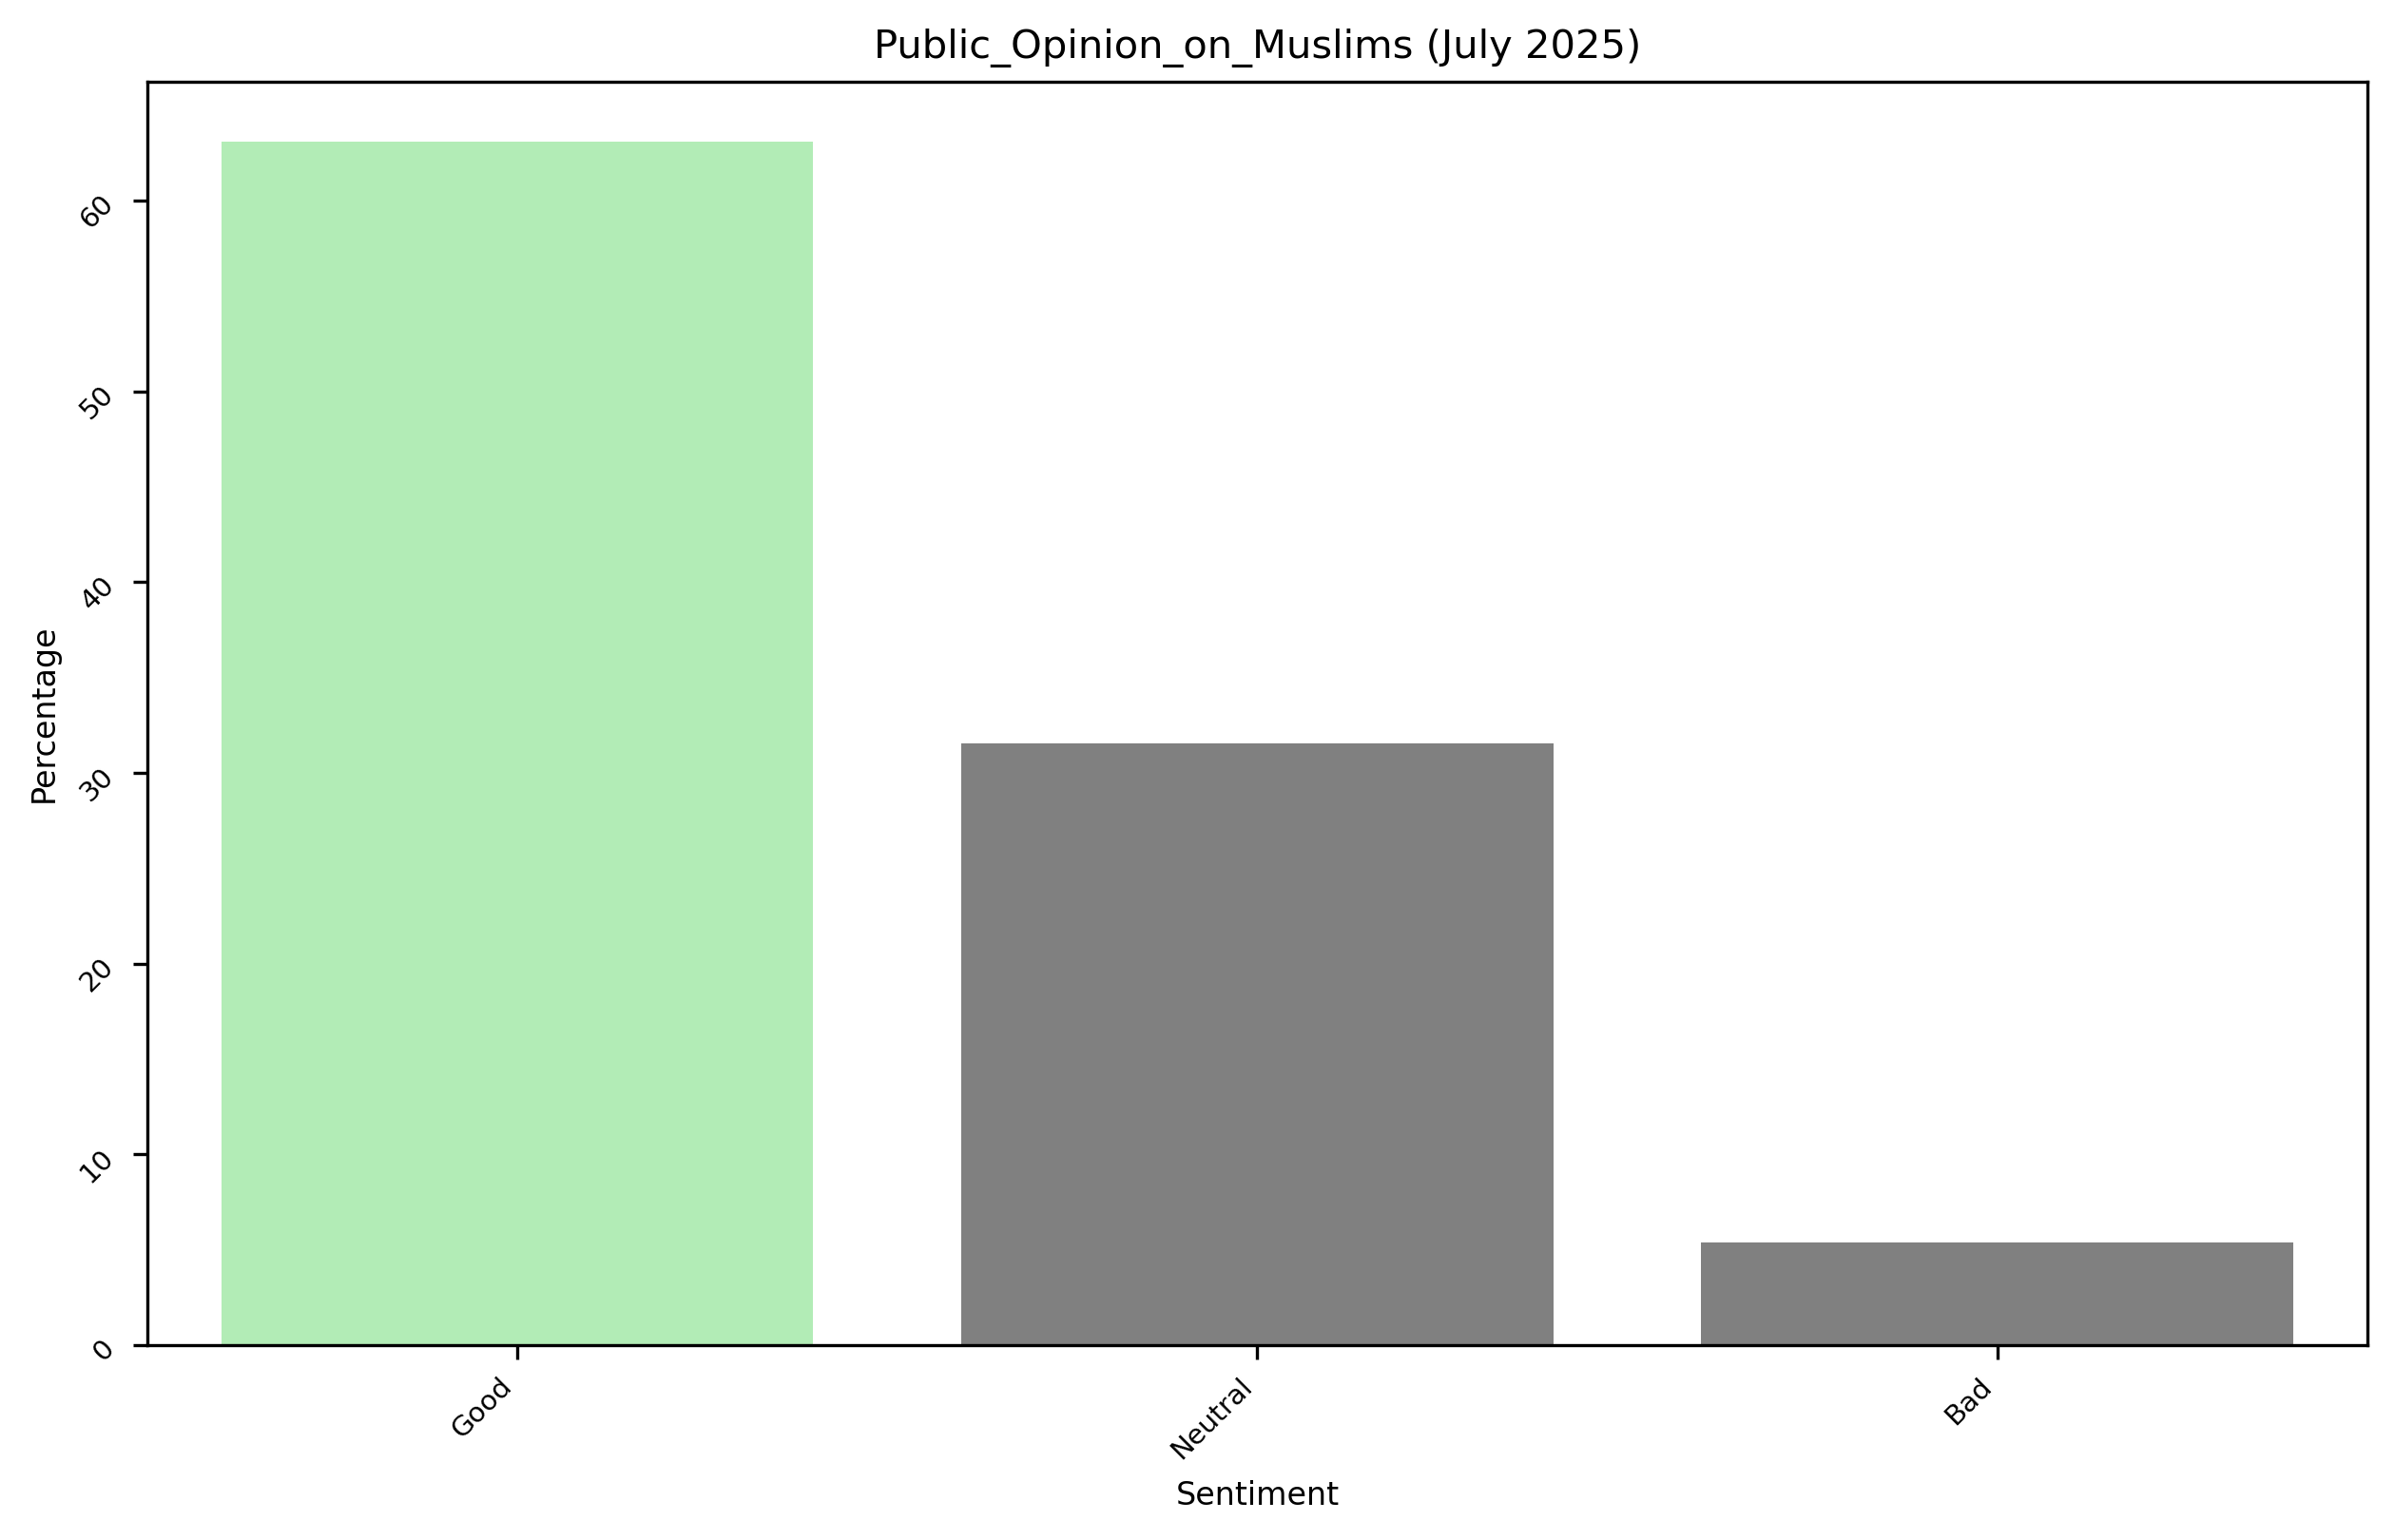

In [6]:
plot_percentages(july25,
                 column_name='How do you feel about Muslim people in America?',
                 x_label='Sentiment',
                 title='Public_Opinion_on_Muslims (July 2025)')


Saving plot to: /Users/manelmahroug/Desktop/Muslim-Brand-Sentiment/scripts/../images/Comfort_levels_Around_Muslims_in_America_July_2025.png


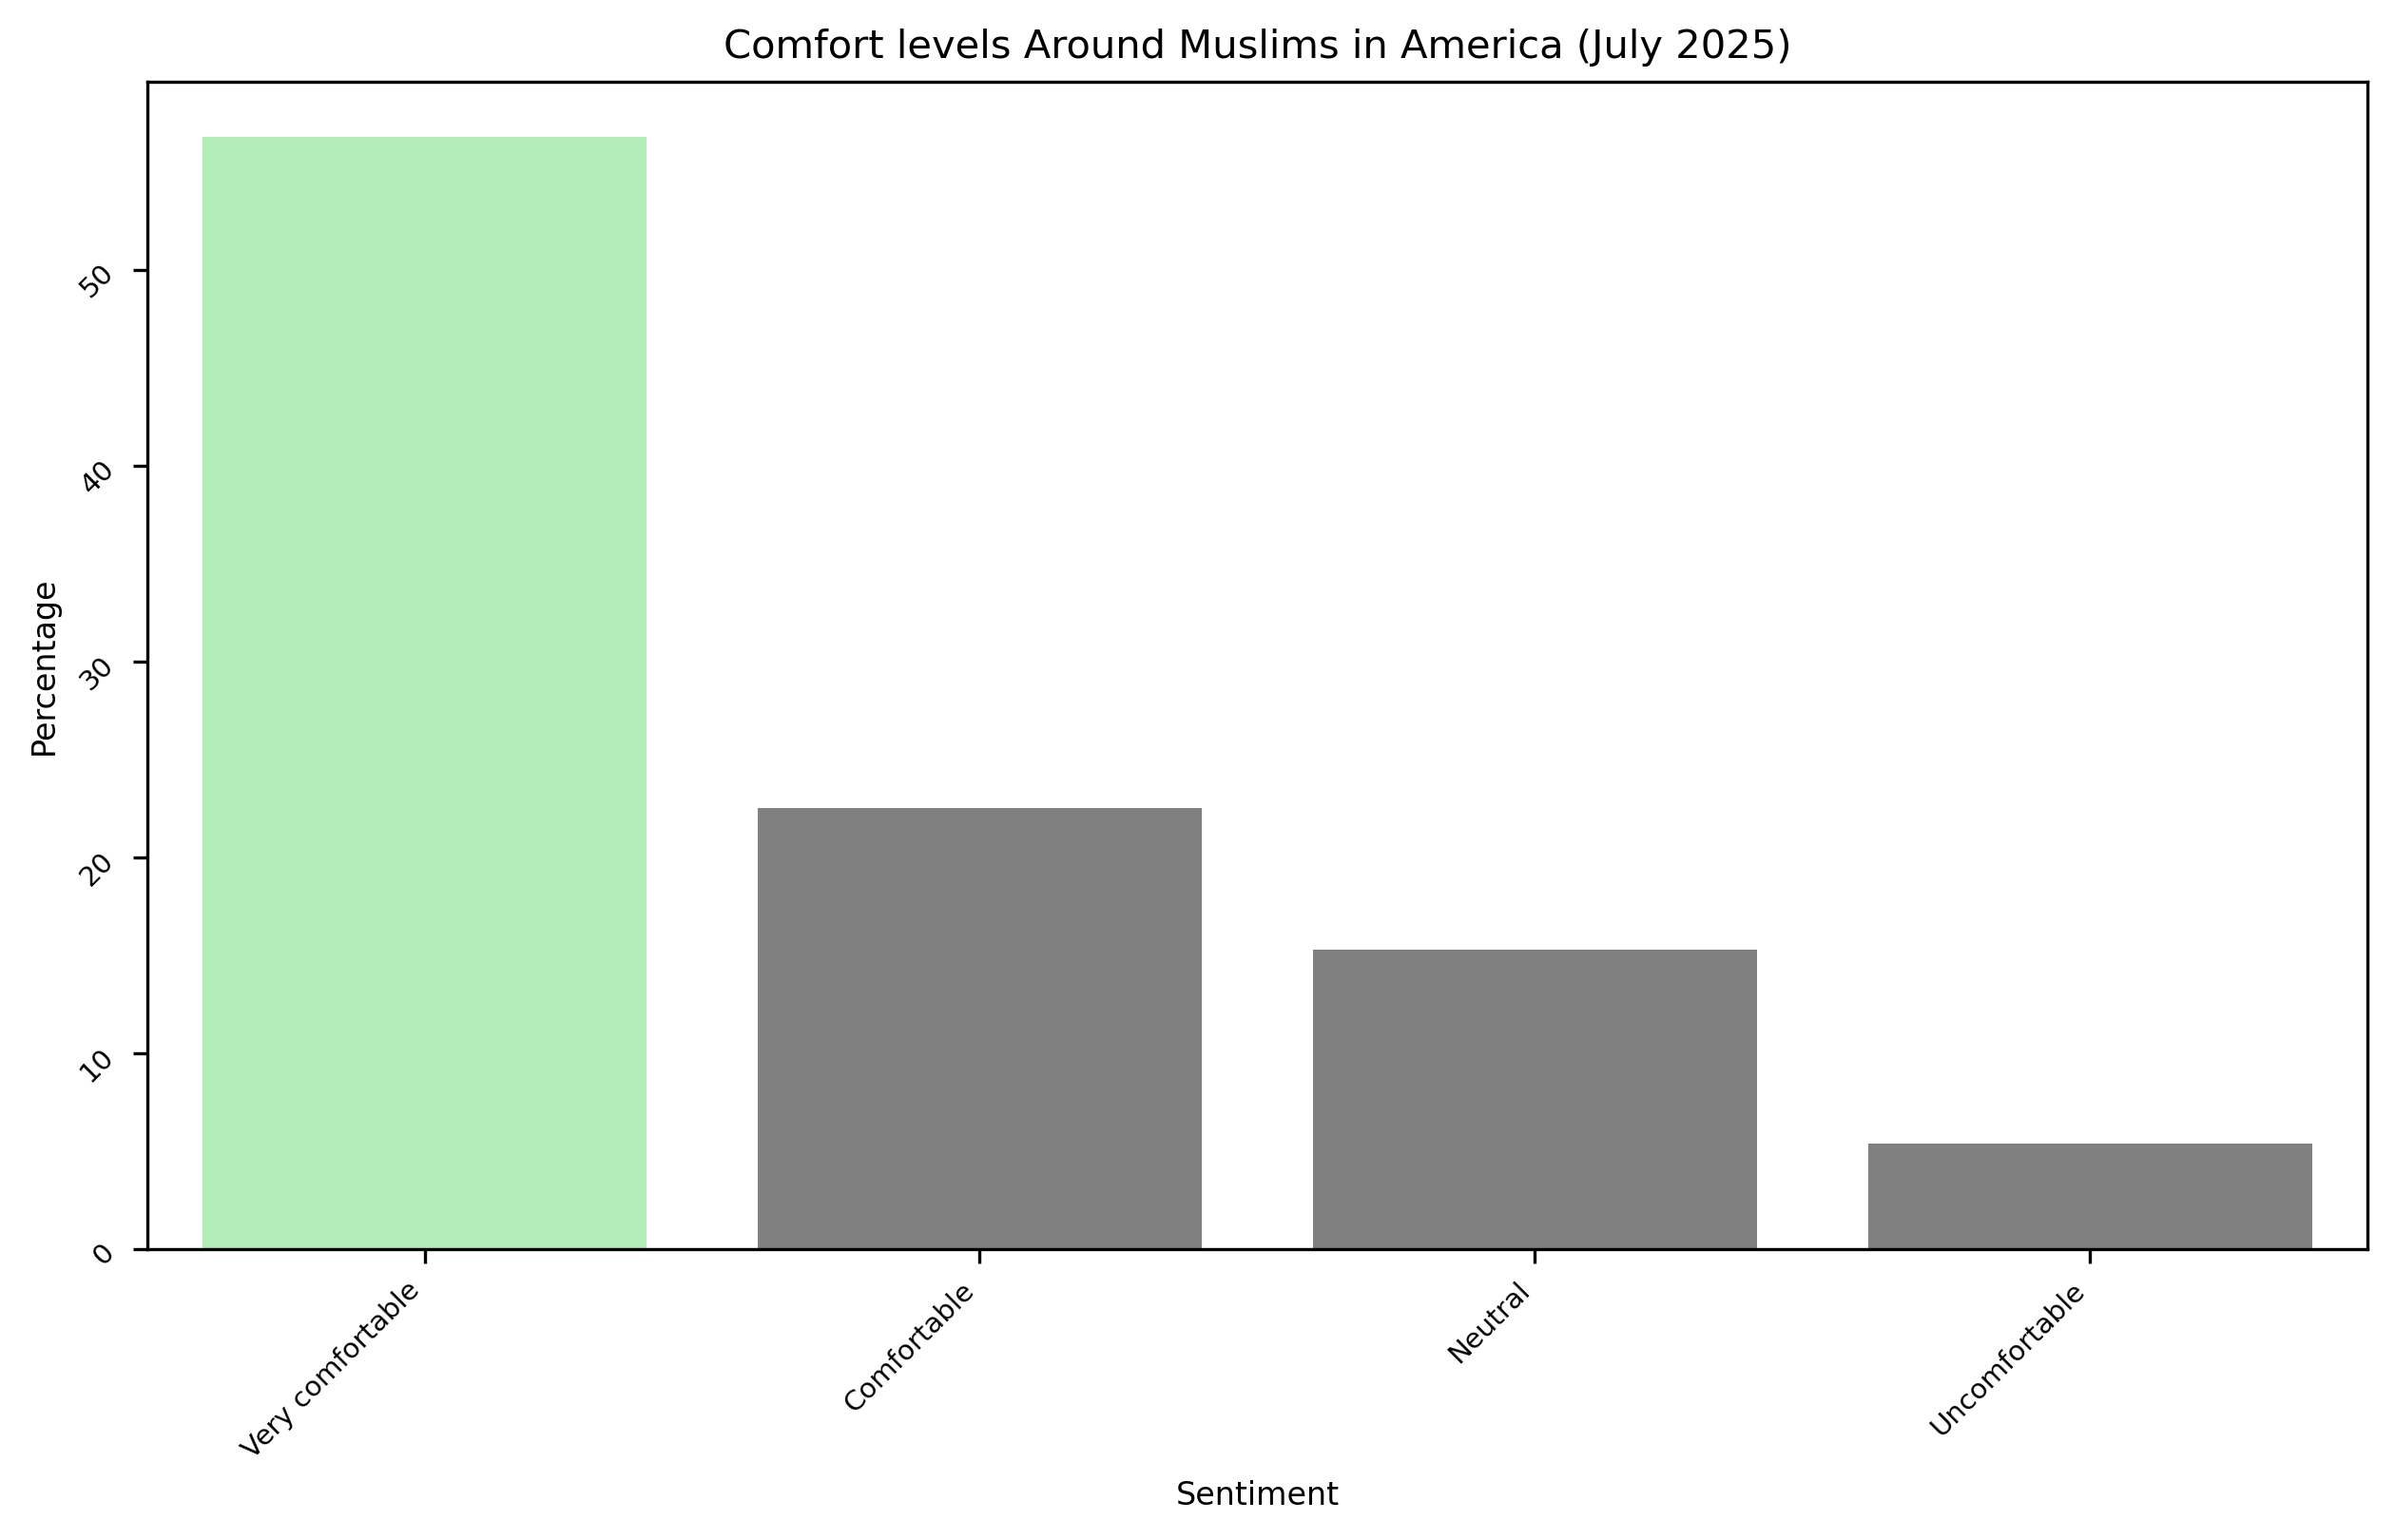

In [7]:
plot_percentages(july25,
                 column_name='How comfortable do you feel interacting with Muslims in your community?',
                 x_label='Sentiment',
                 title='Comfort levels Around Muslims in America (July 2025)')

## Religion Vs. Sentiment

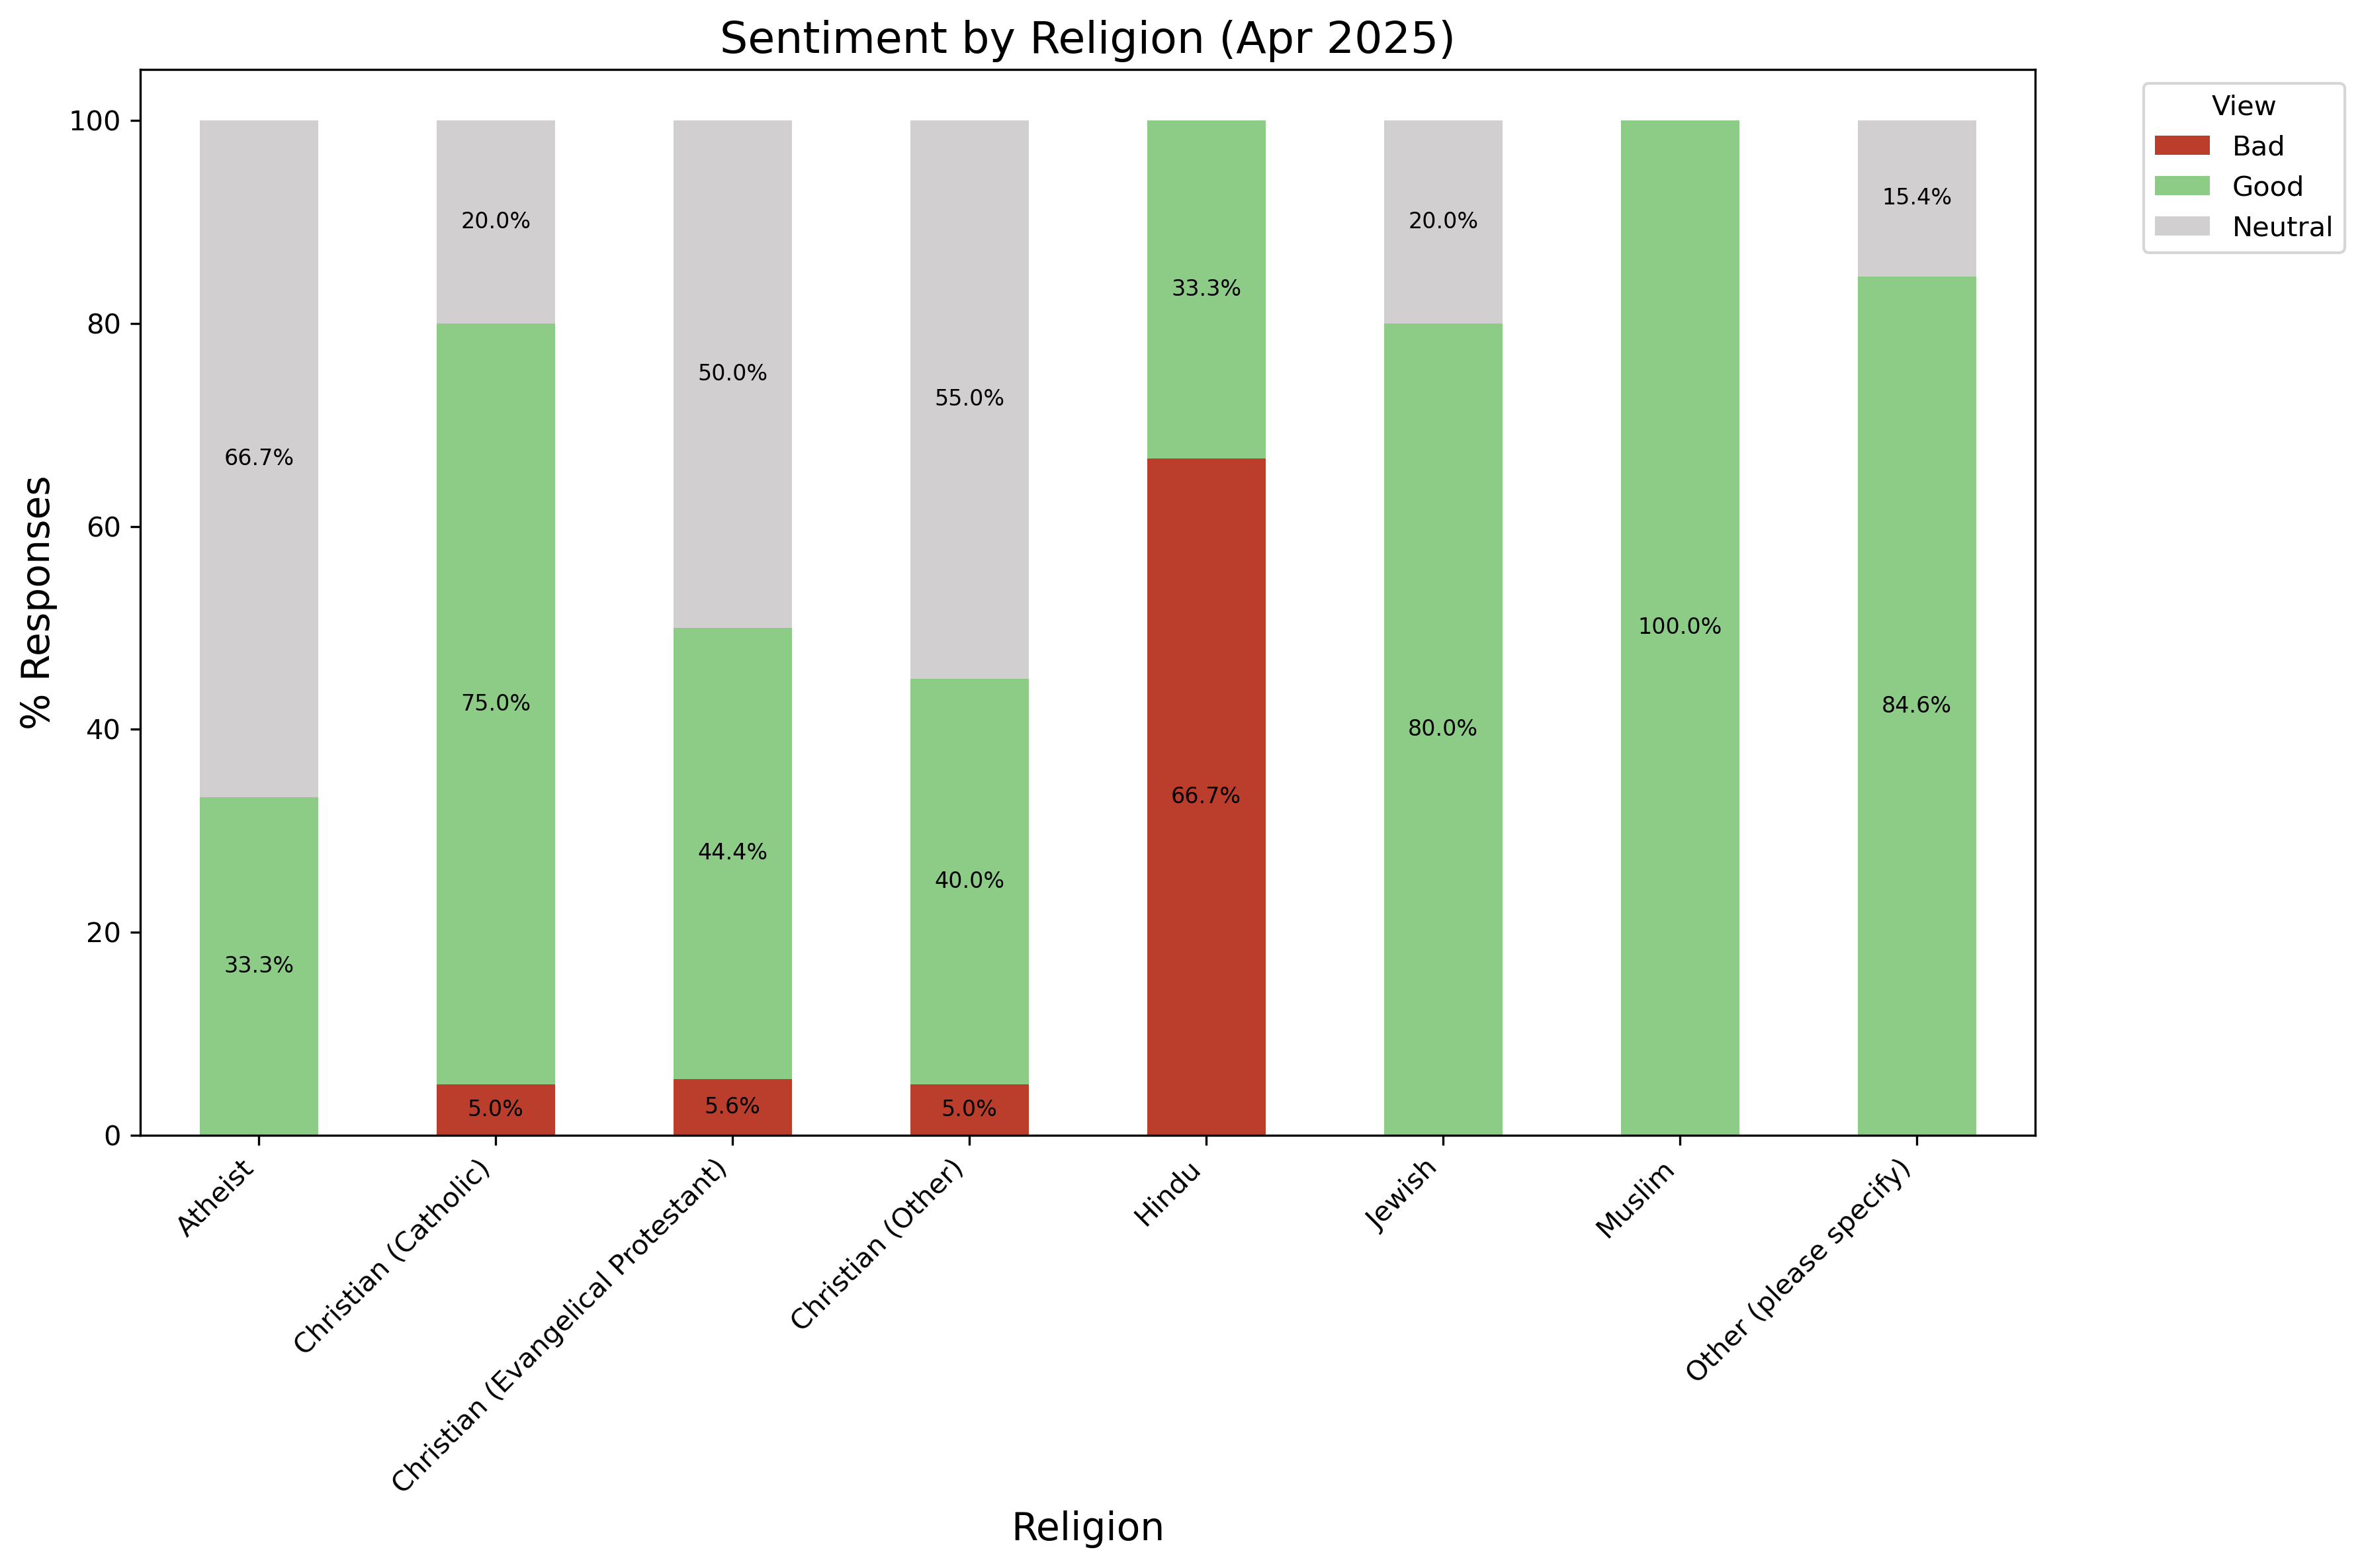

In [8]:
plot_stacked_bar_chart(july25,
                       title='Sentiment by Religion (Apr 2025)',
                       xlabel='Religion',
                       ylabel='% Responses',
                       cat_col='What is your religion?',
                       sent_col='How do you feel about Muslim people in America?')


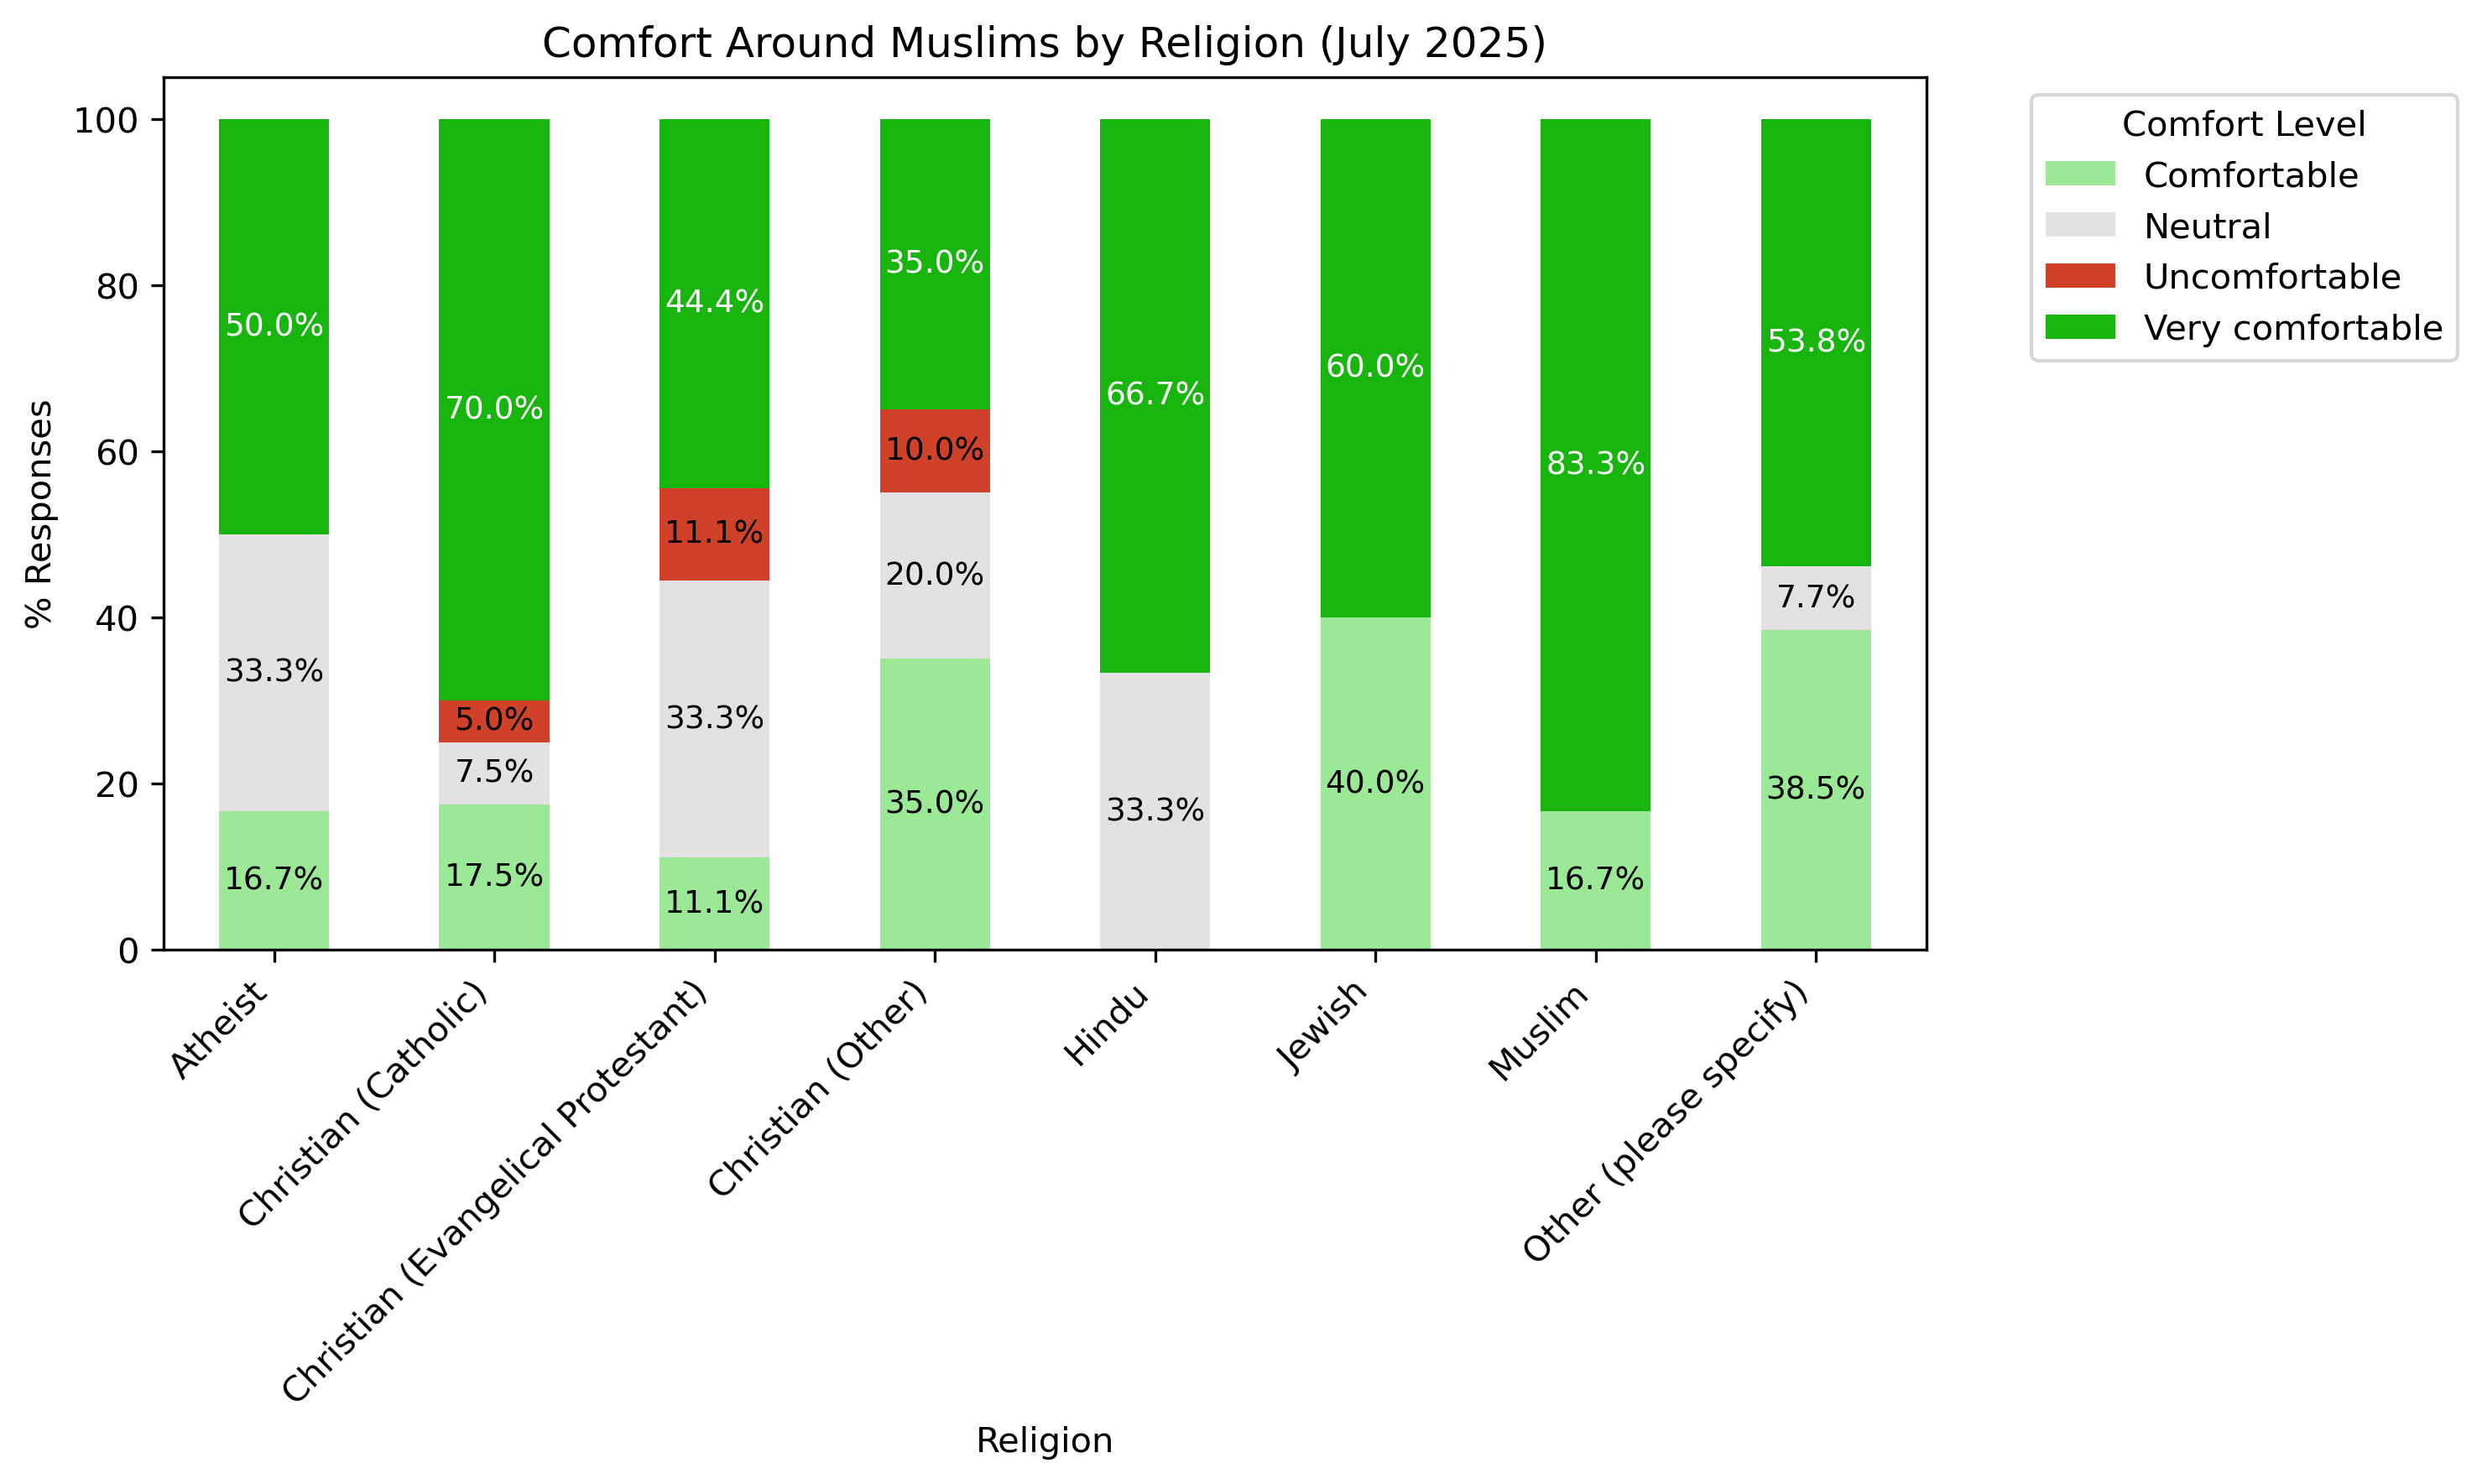

In [9]:
plot_comfort(july25,
             category_col='What is your religion?',
             comfort_level='How comfortable do you feel interacting with Muslims in your community?',
             title='Comfort Around Muslims by Religion (July 2025)',
             xlabel='Religion',
             ylabel='% Responses')


## Sentiment Vs. Gender

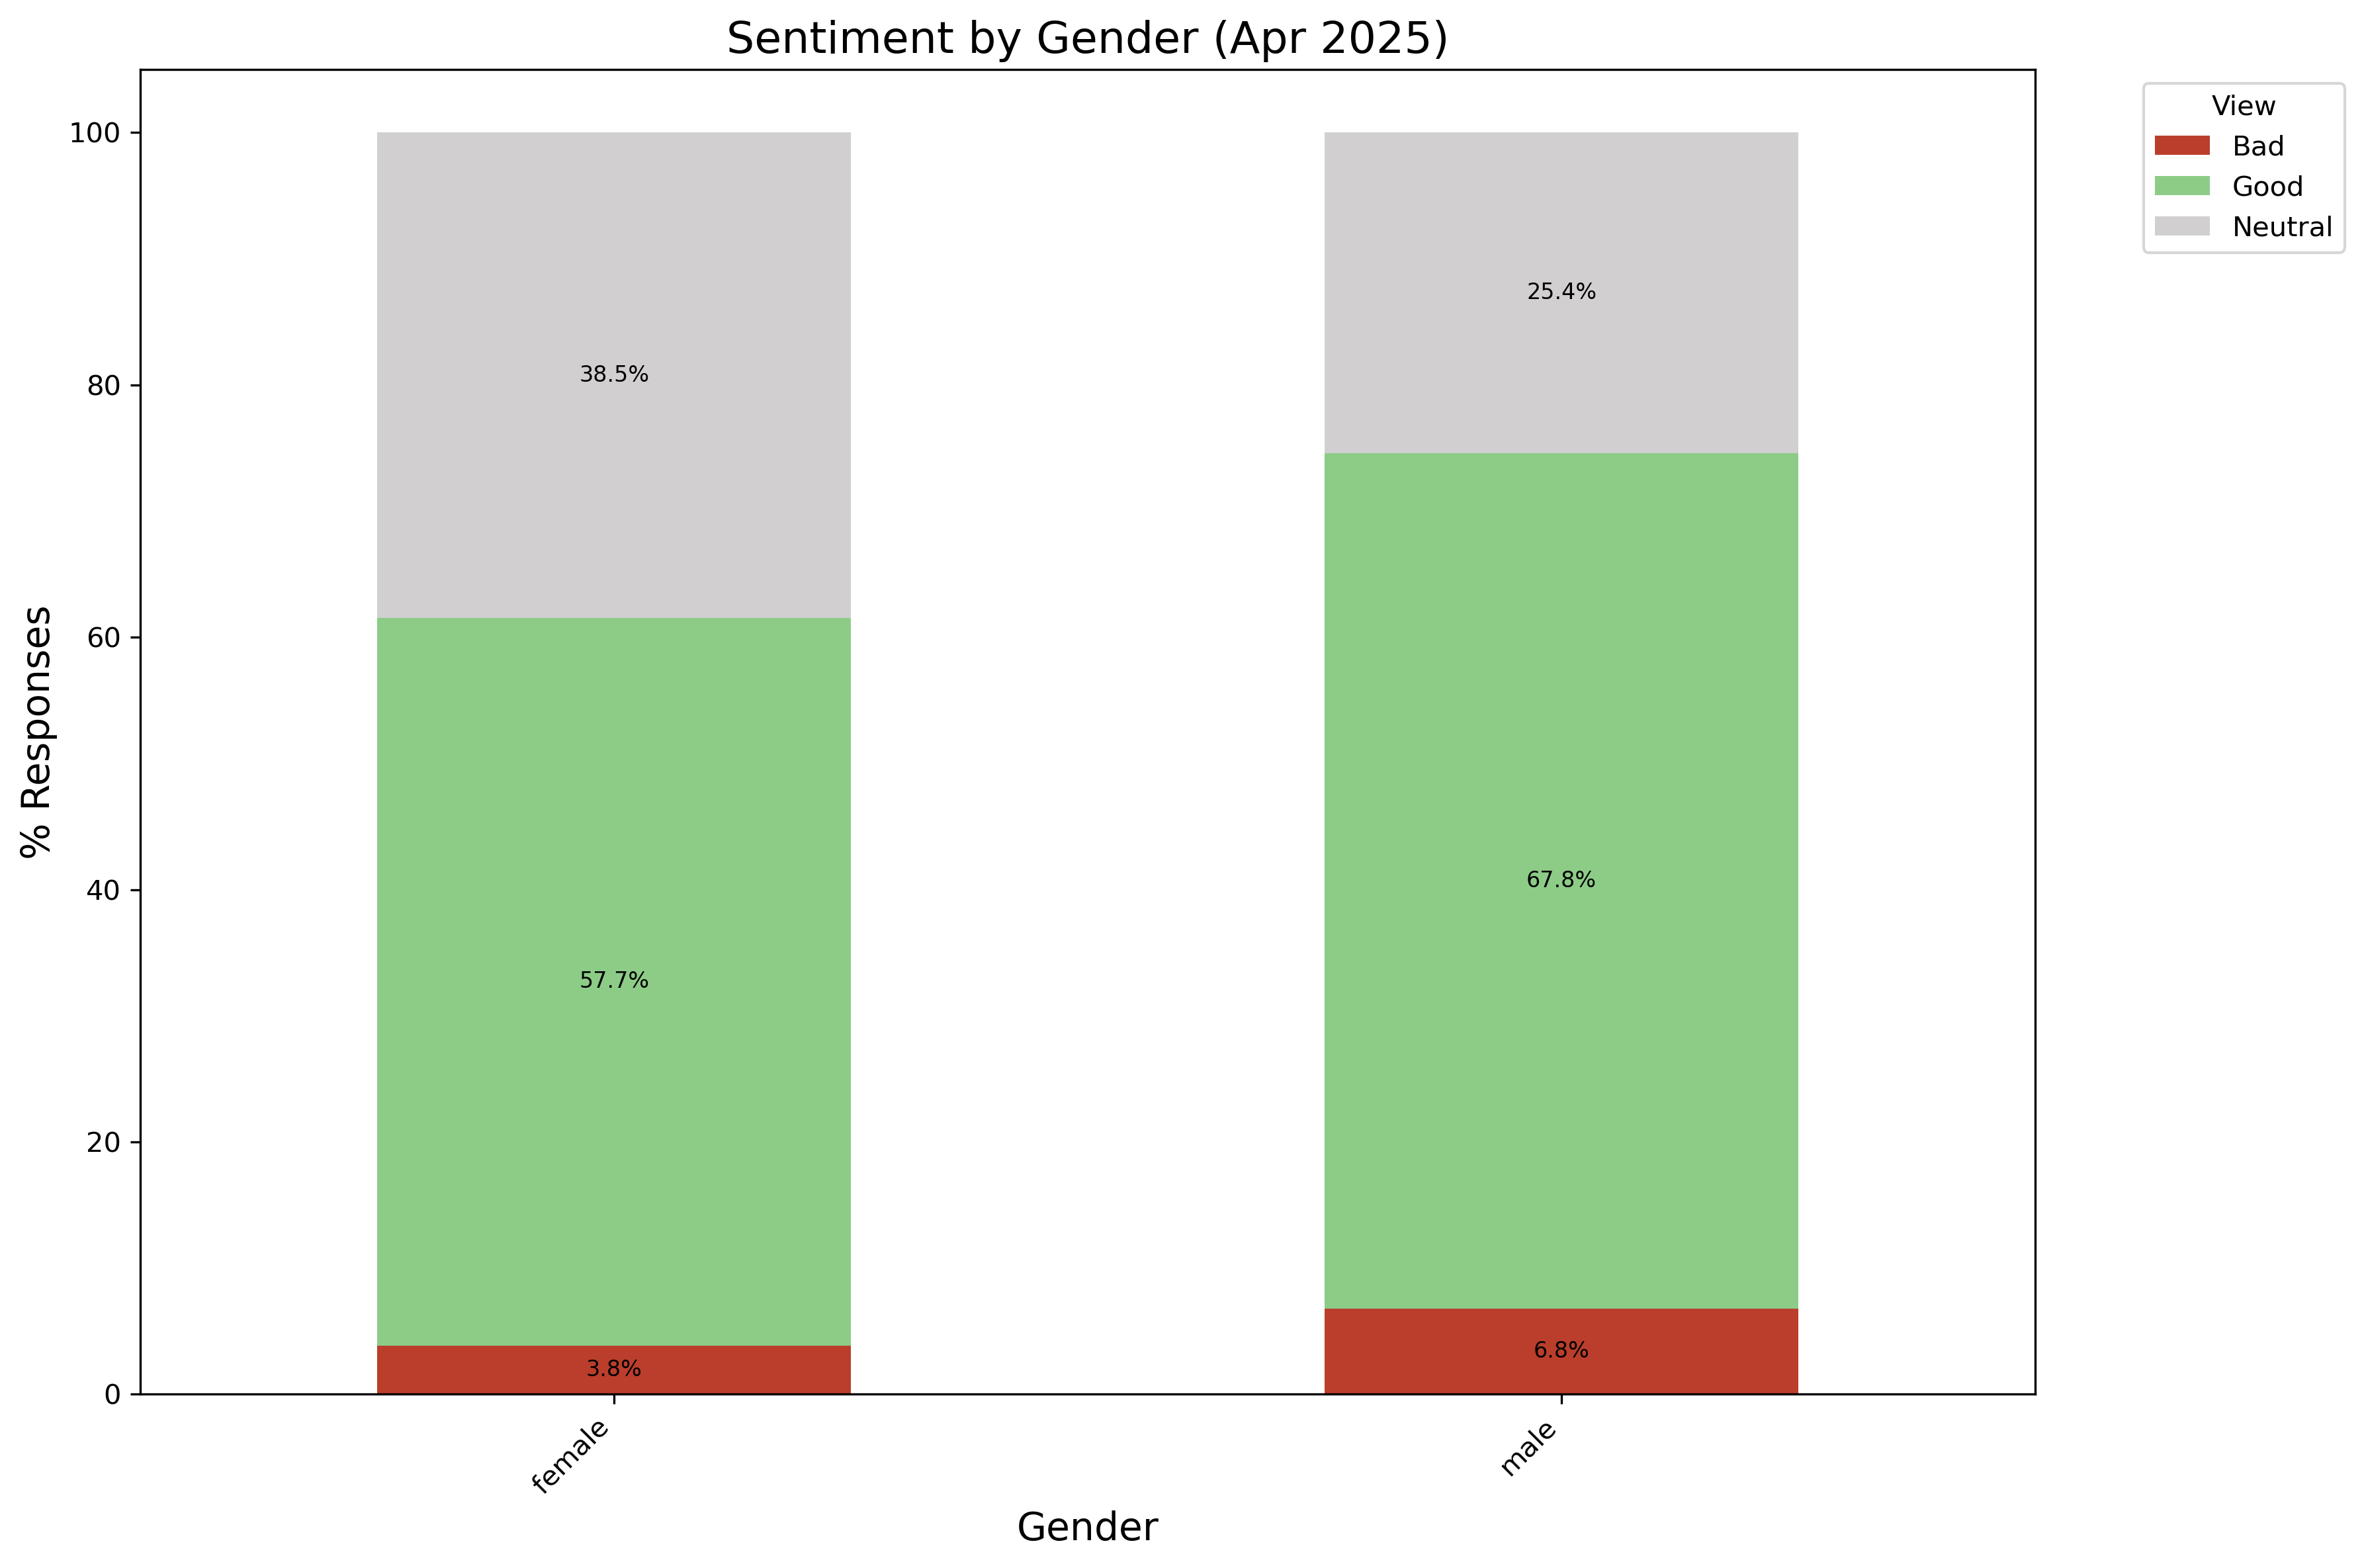

In [10]:
plot_stacked_bar_chart(july25,
                       title='Sentiment by Gender (Apr 2025)',
                       xlabel='Gender',
                       ylabel='% Responses',
                       cat_col='Gender',
                       sent_col='How do you feel about Muslim people in America?')

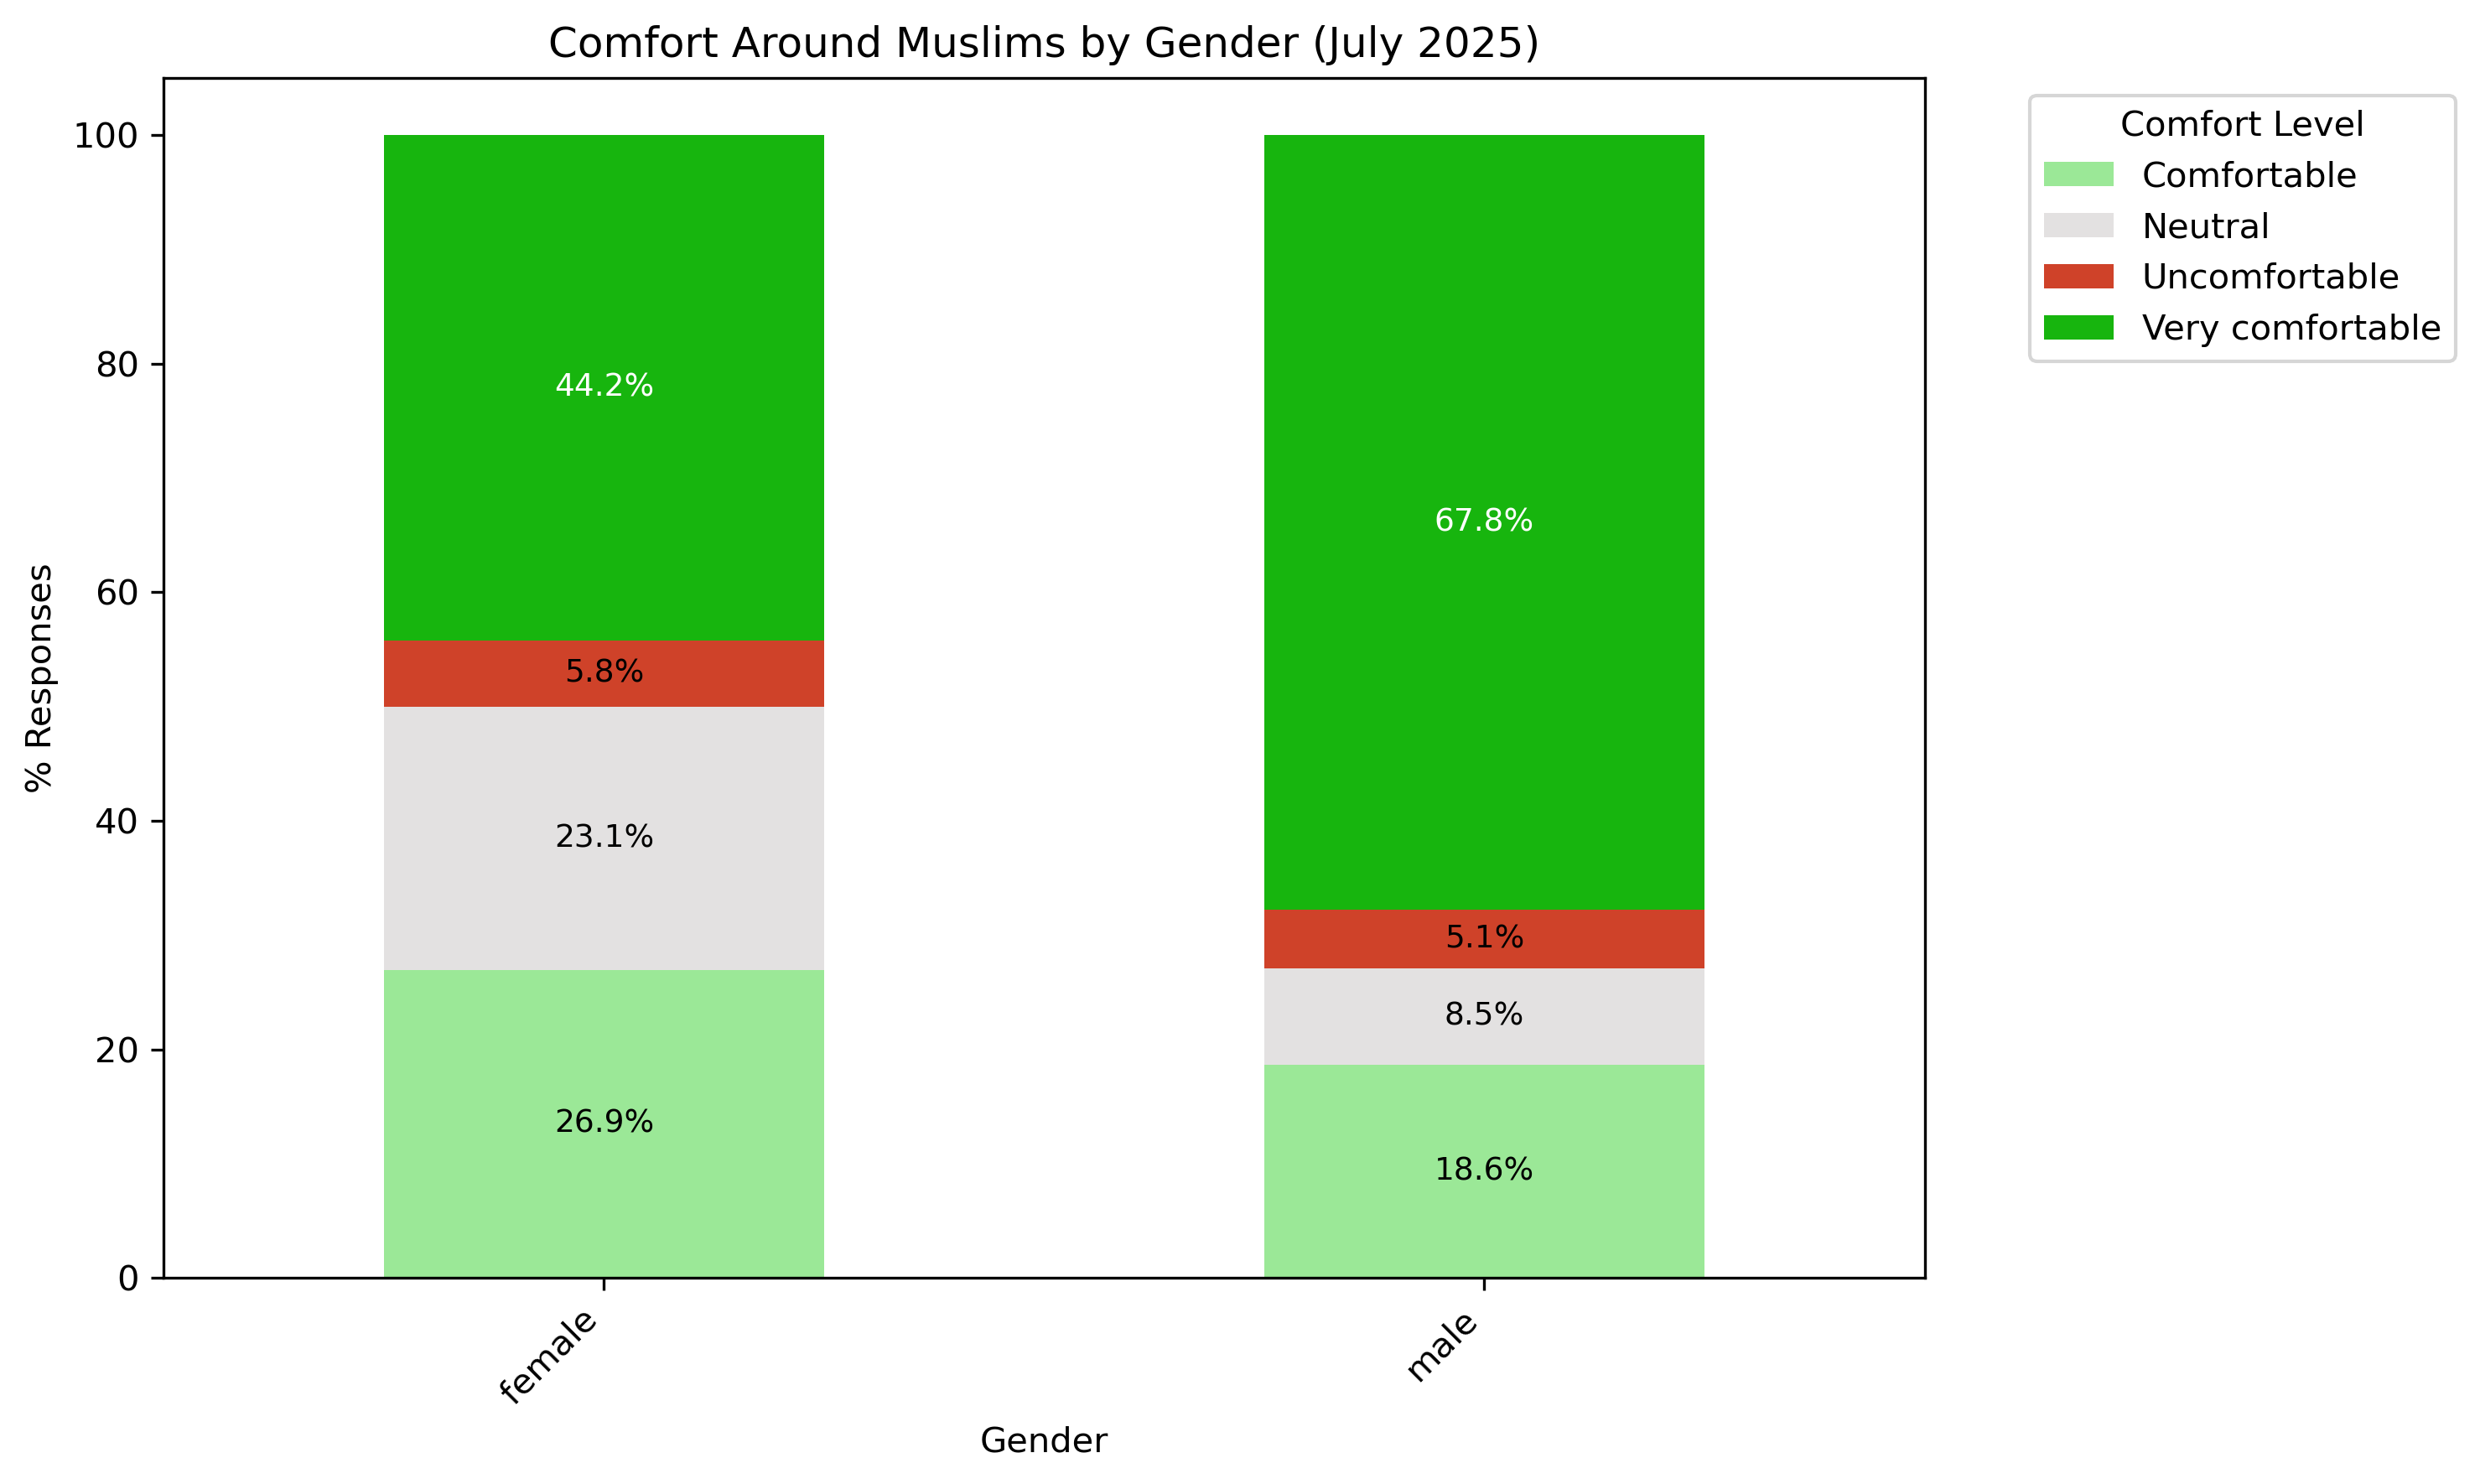

In [11]:
plot_comfort(july25,
             category_col= 'Gender',
             comfort_level='How comfortable do you feel interacting with Muslims in your community?',
             title='Comfort Around Muslims by Gender (July 2025)',
             xlabel='Gender',
             ylabel='% Responses')

## Education Vs. Sentiment

Saving plot to: /Users/manelmahroug/Desktop/Muslim-Brand-Sentiment/scripts/../images/The_Majority_of_Those_Surveyed_Hold_Degrees_In_Higher_Education.png


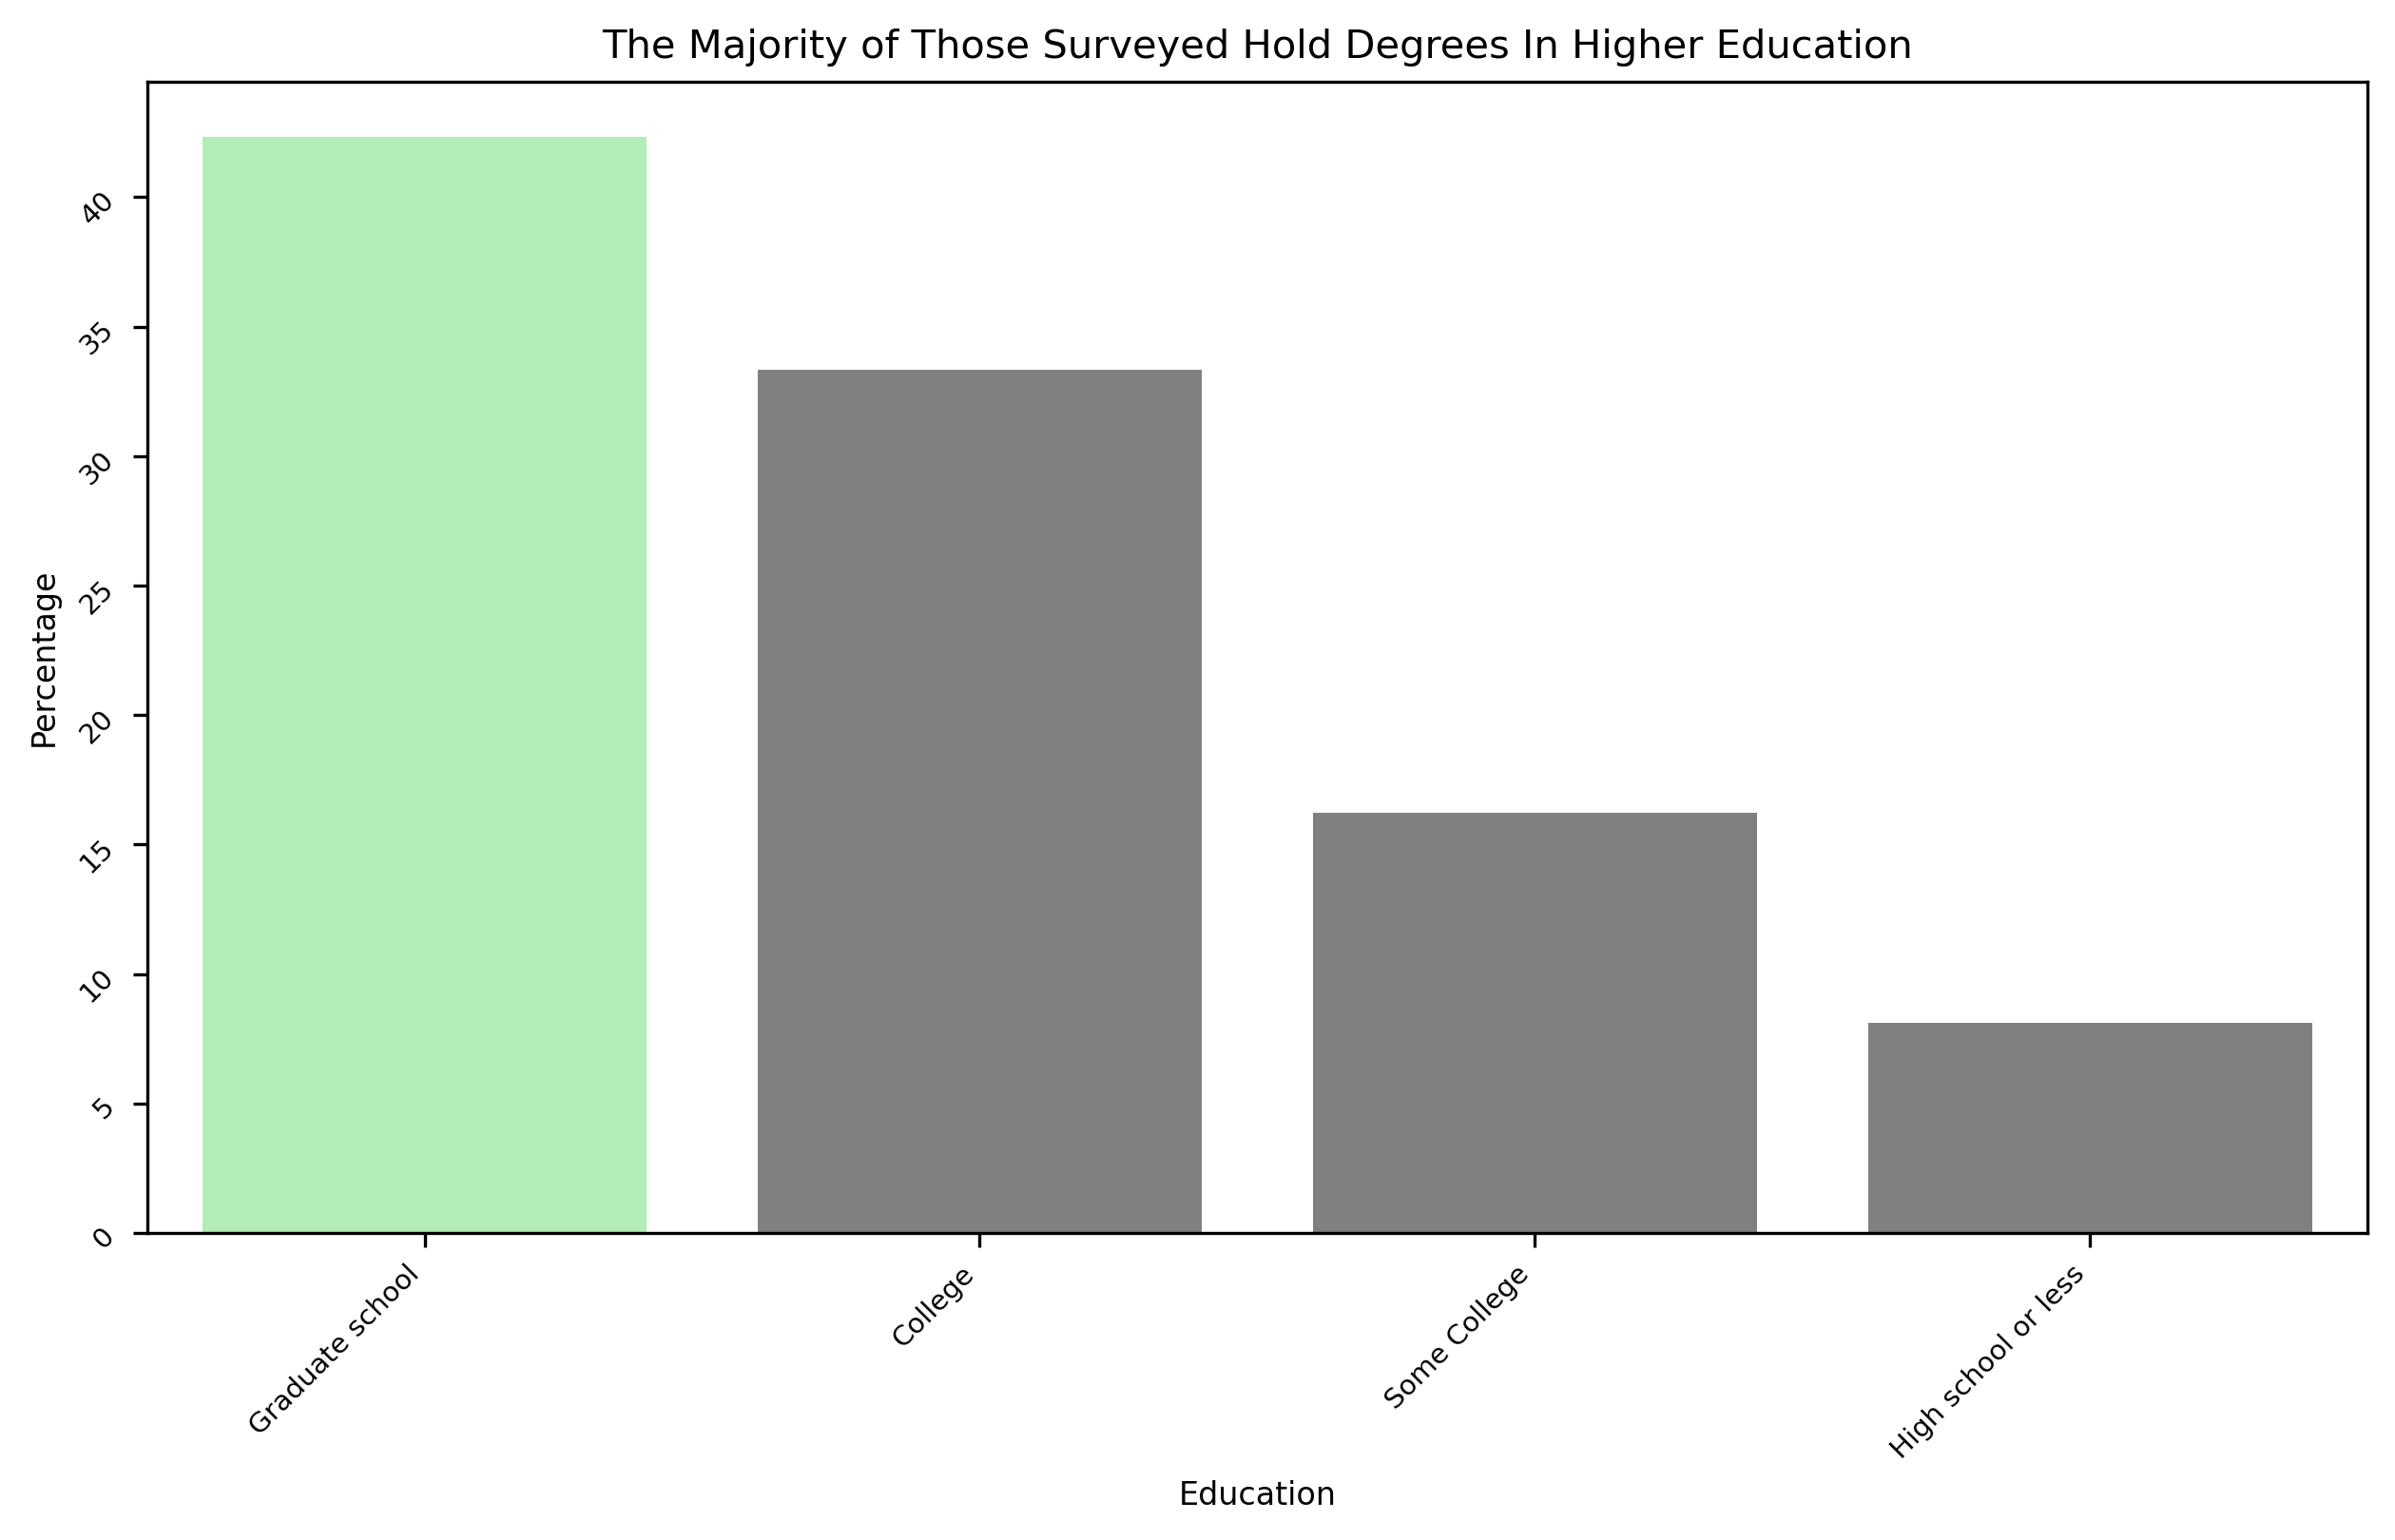

In [12]:
plot_percentages(july25,'What is your level of education?', 'Education',
           'The Majority of Those Surveyed Hold Degrees In Higher Education')

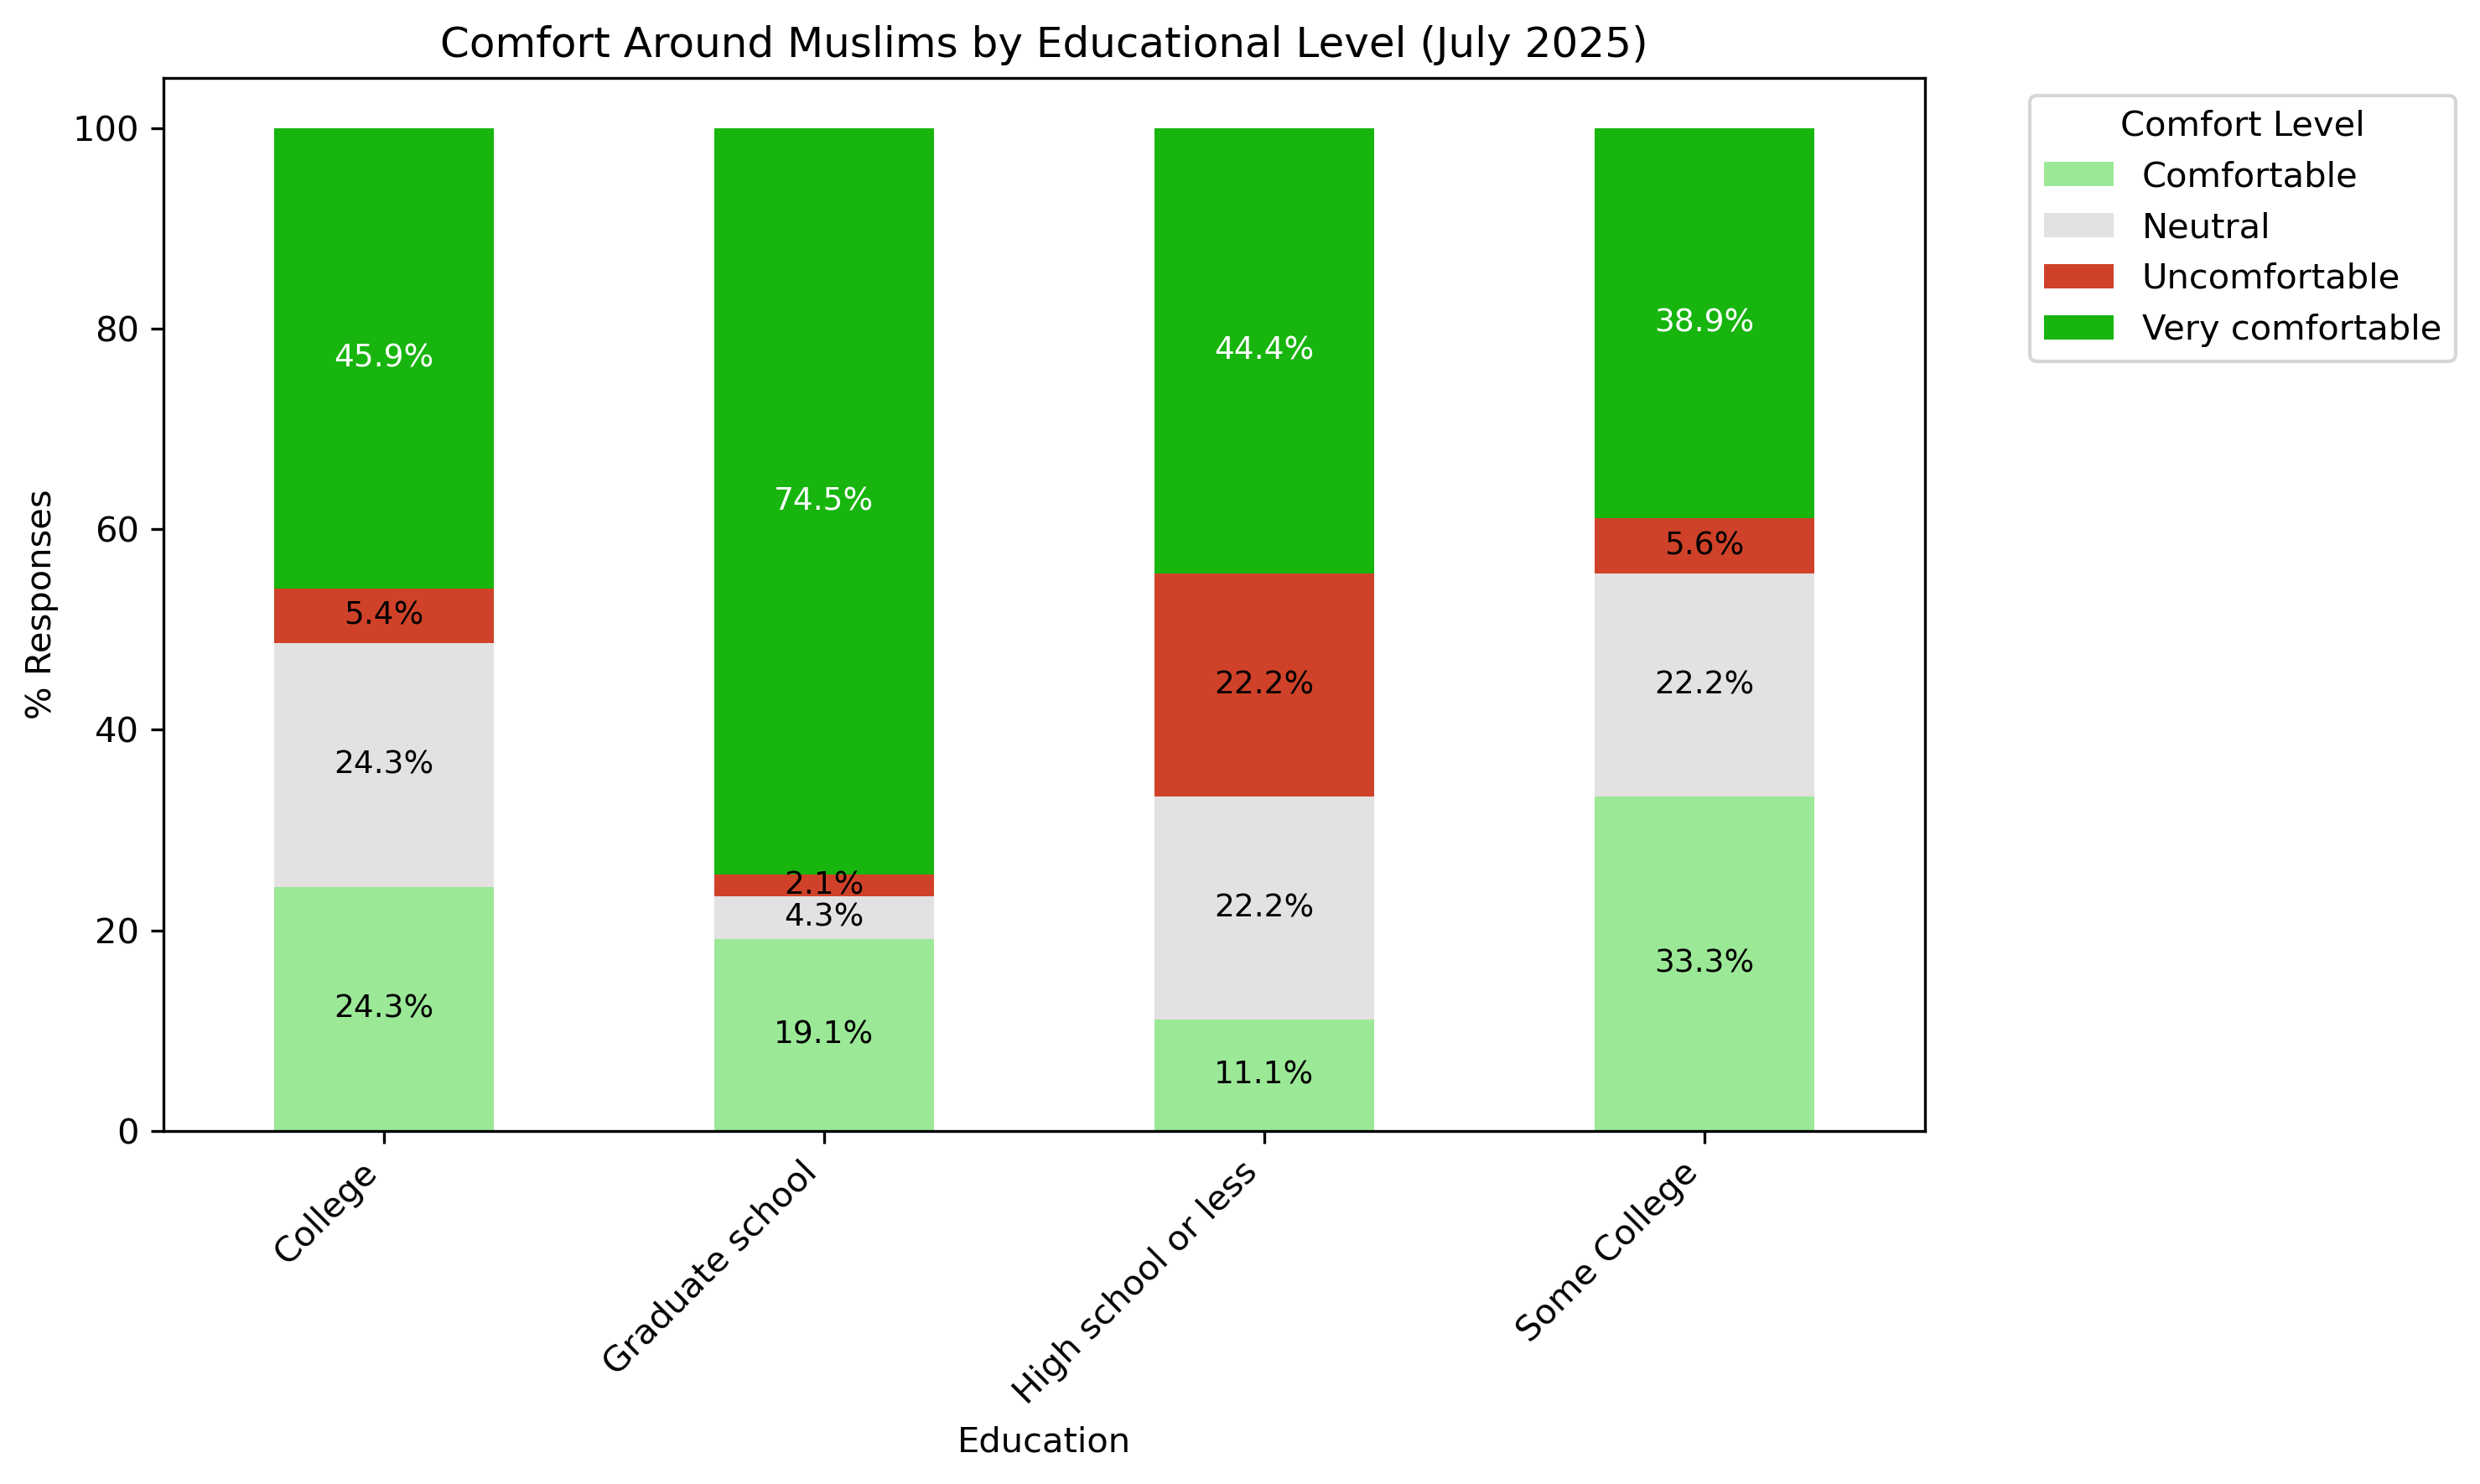

In [13]:
plot_comfort(july25,
             category_col= 'What is your level of education?',
             comfort_level='How comfortable do you feel interacting with Muslims in your community?',
             title='Comfort Around Muslims by Educational Level (July 2025)',
             xlabel='Education',
             ylabel='% Responses')

# Age Vs. Sentiment

Saving plot to: /Users/manelmahroug/Desktop/Muslim-Brand-Sentiment/scripts/../images/More_than_75%_Of_Survey_Partipants_are_aged_30-60_July_25.png


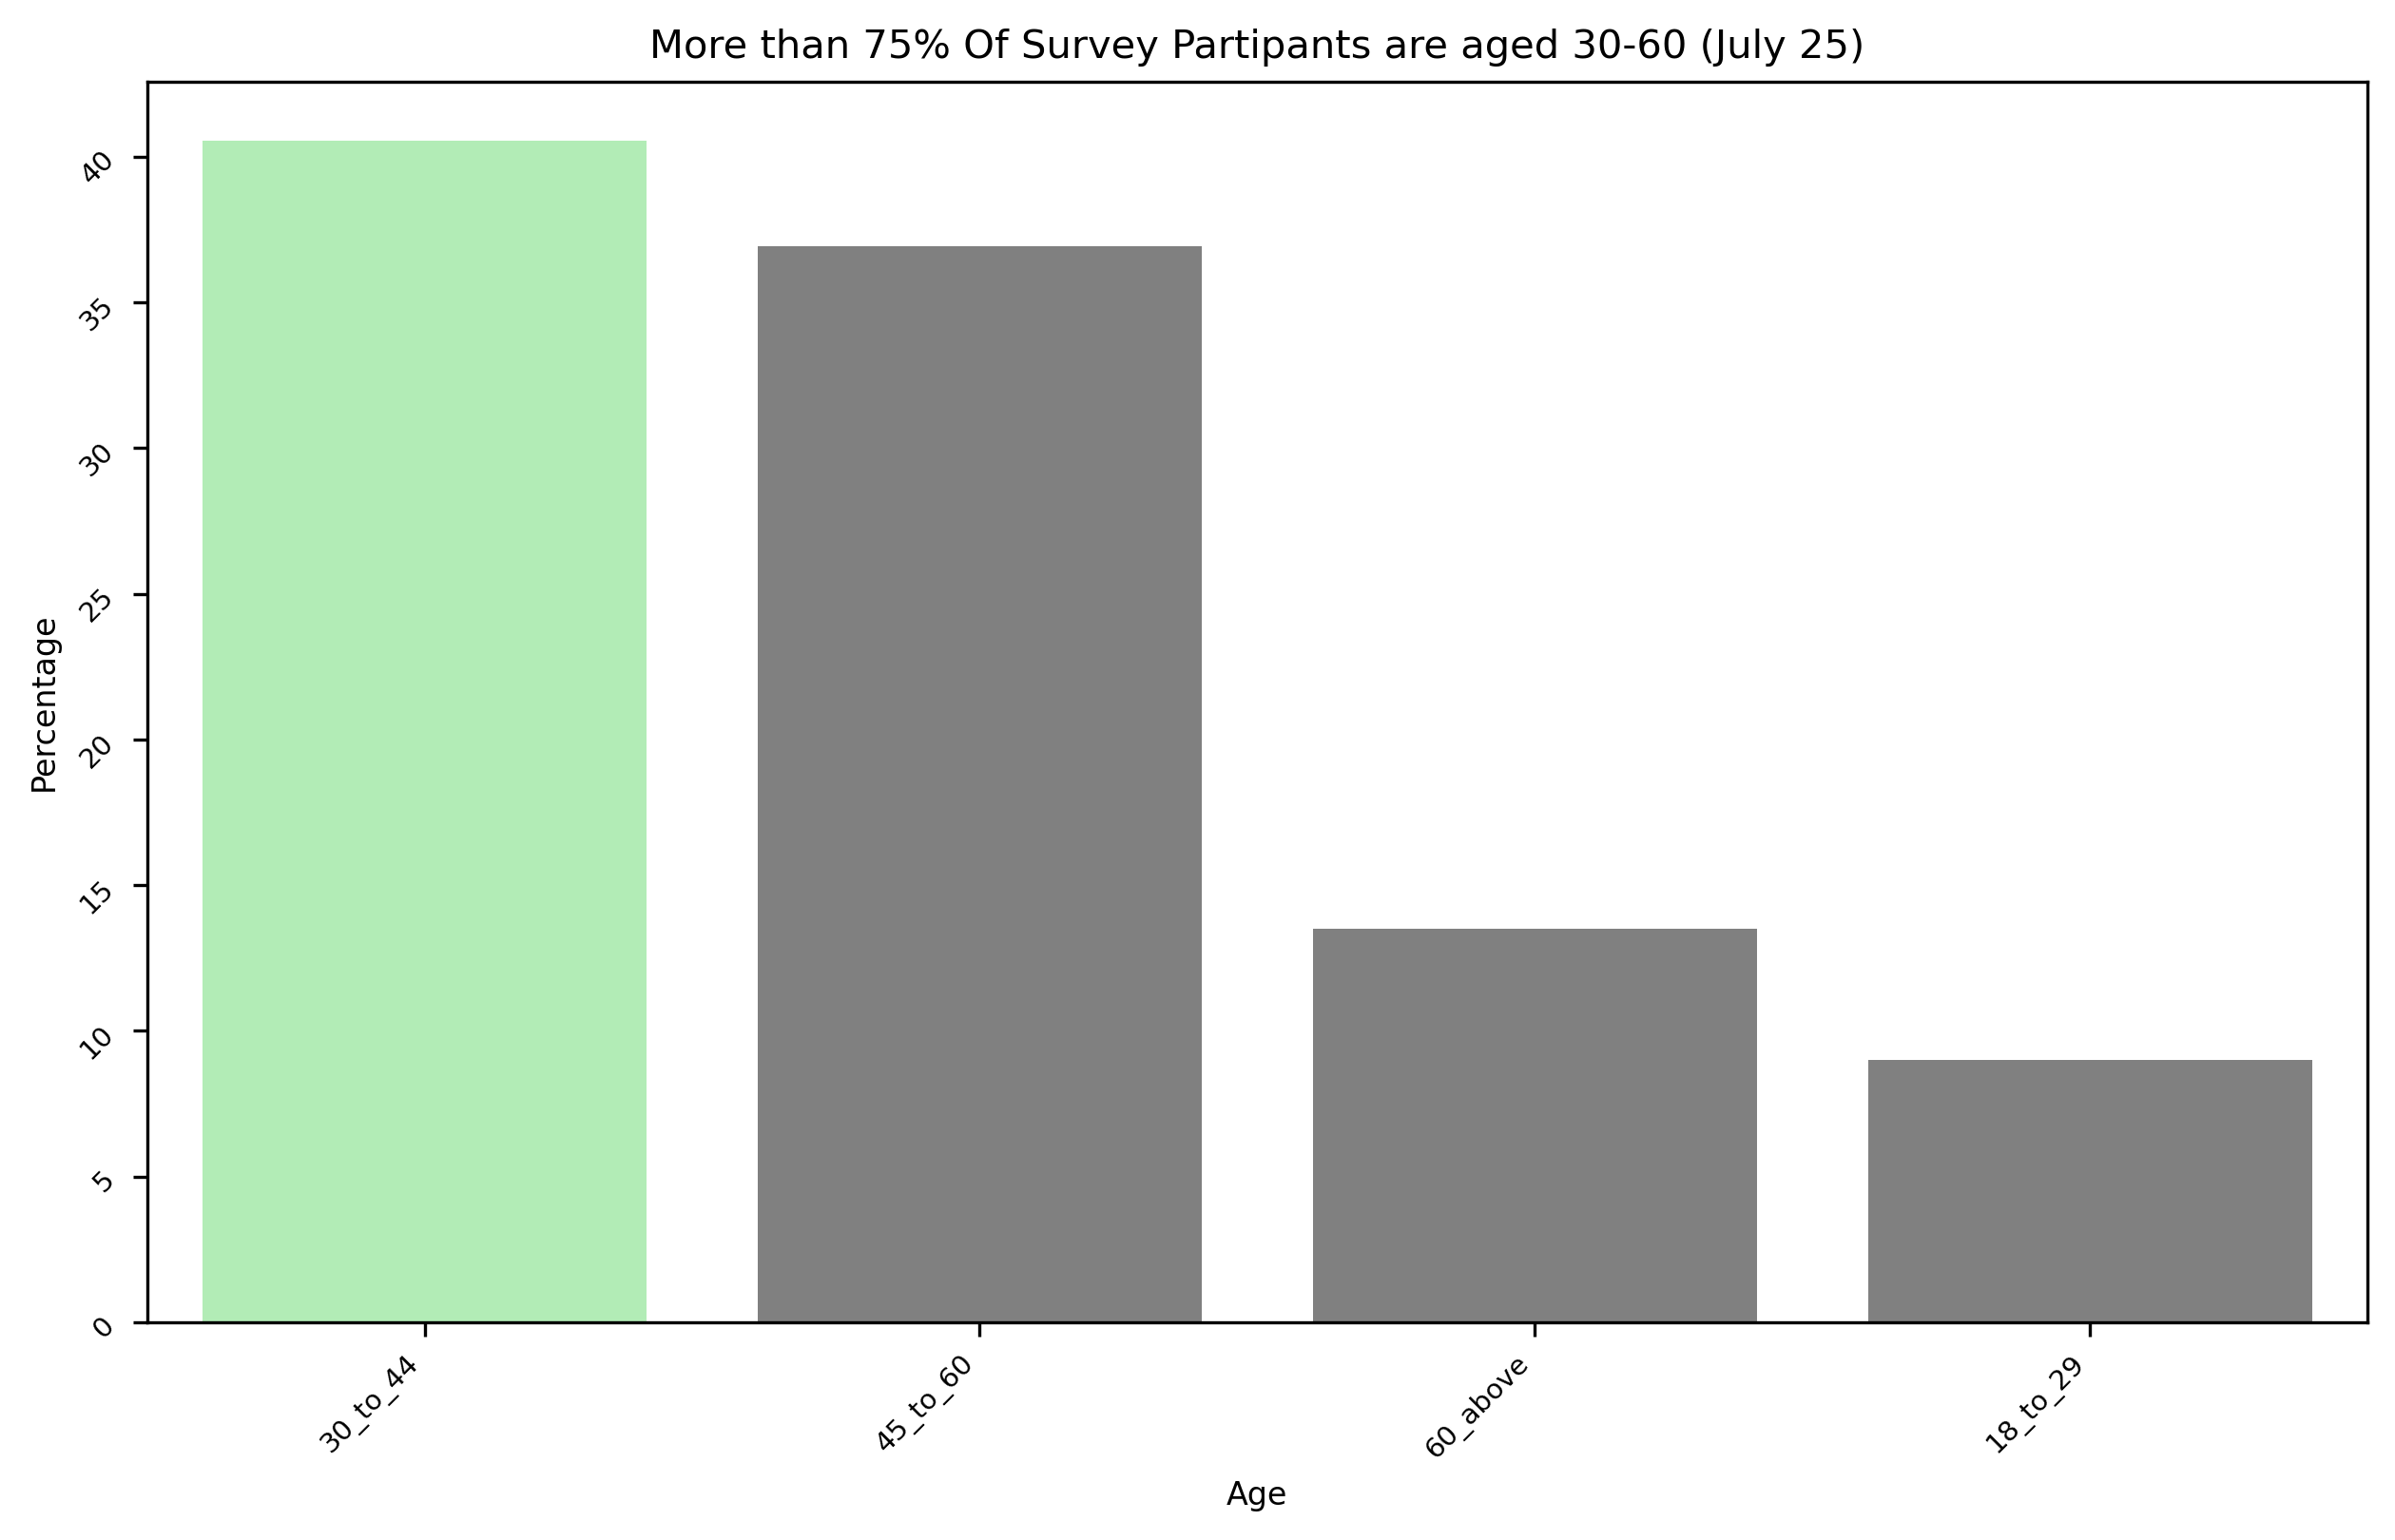

In [14]:
plot_percentages(july25,'Age', 'Age',
           'More than 75% Of Survey Partipants are aged 30-60 (July 25)')

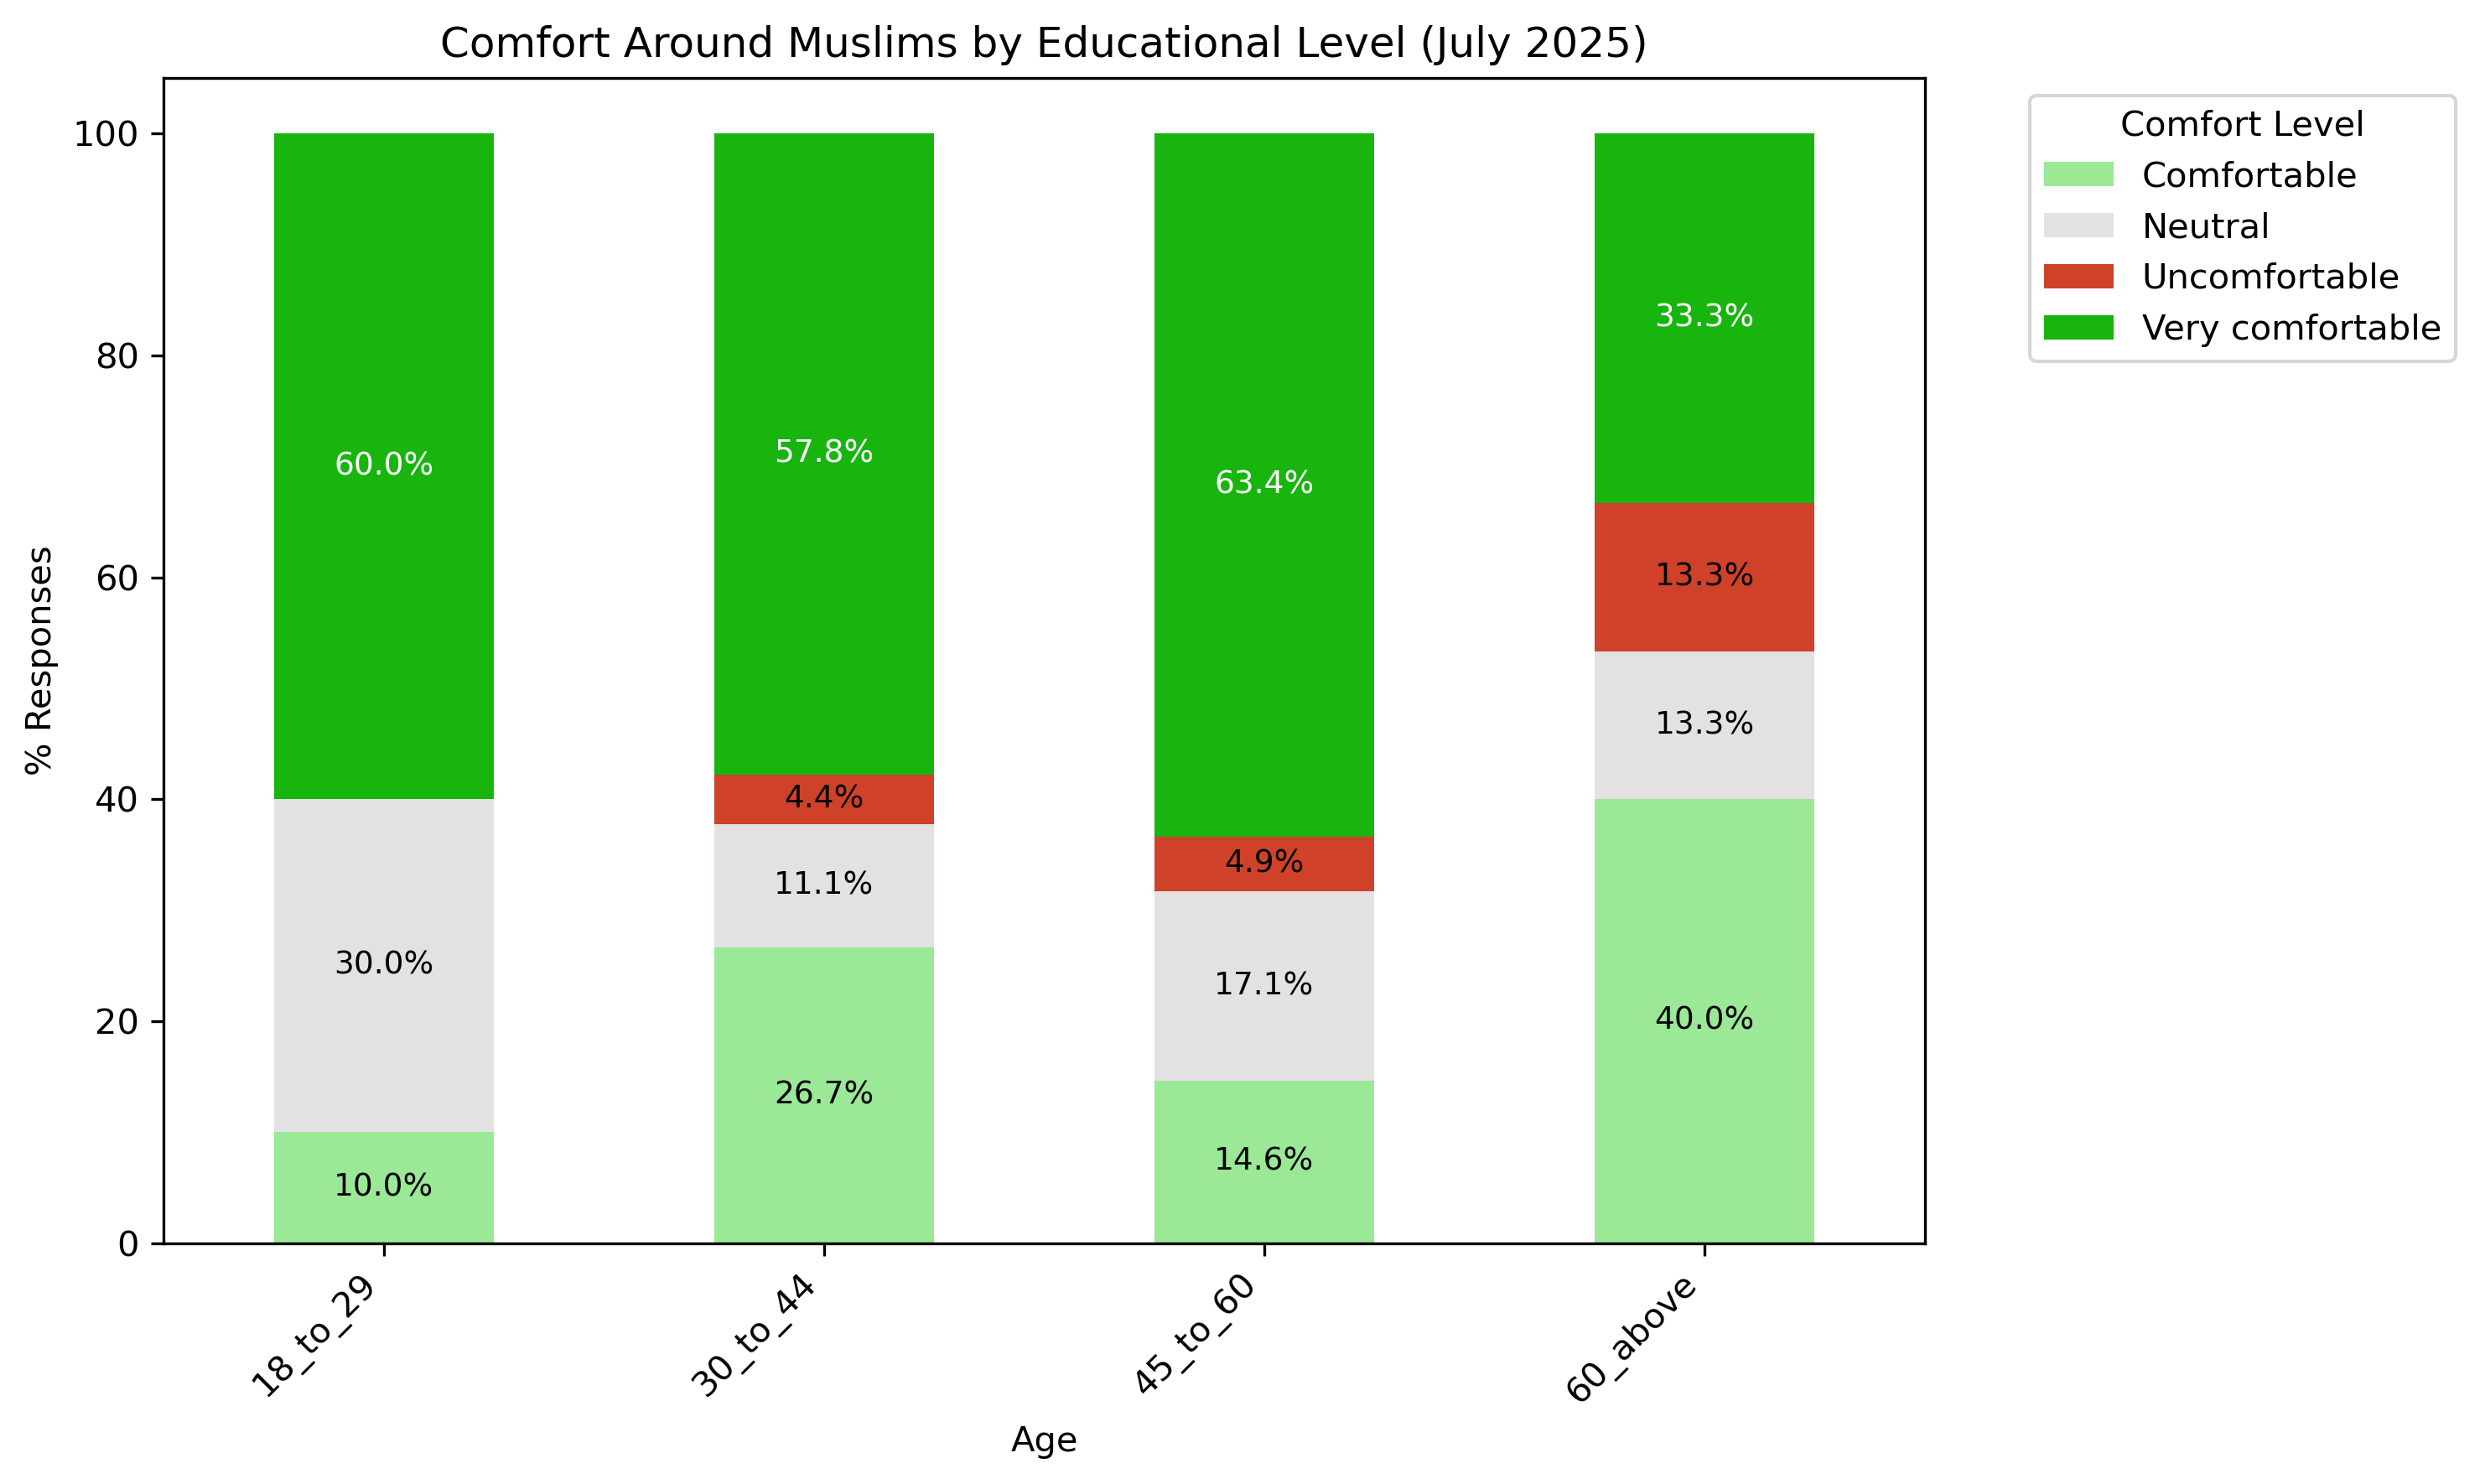

In [15]:
plot_comfort(july25,
             category_col= 'Age',
             comfort_level='How comfortable do you feel interacting with Muslims in your community?',
             title='Comfort Around Muslims by Educational Level (July 2025)',
             xlabel='Age',
             ylabel='% Responses')

## Income Vs Sentiment

In [16]:
income_mapping = {"25000_to_49999": "25k-49k",
"50000_to_74999":"50k-74k",
"75000_to_99999": "75k-99k",
"125000_to_149999": "125k-149k",
"100000_to_124999" :"100k-124k",
"0_to_9999"        : "0-9k",
"no_answer":    "undisclosed",
"150000_to_174999":"150k-174k",
"10000_to_24999" : "10k-24k",
"200000_and_up":   "200k_up",
"175000_to_199999": "175k-199k"}

july25['Household Income'] = july25['Household Income'].replace(income_mapping)

Saving plot to: /Users/manelmahroug/Desktop/Muslim-Brand-Sentiment/scripts/../images/Most_Survey_Respondents_Are_Upper_Middle_Class_Earners.png


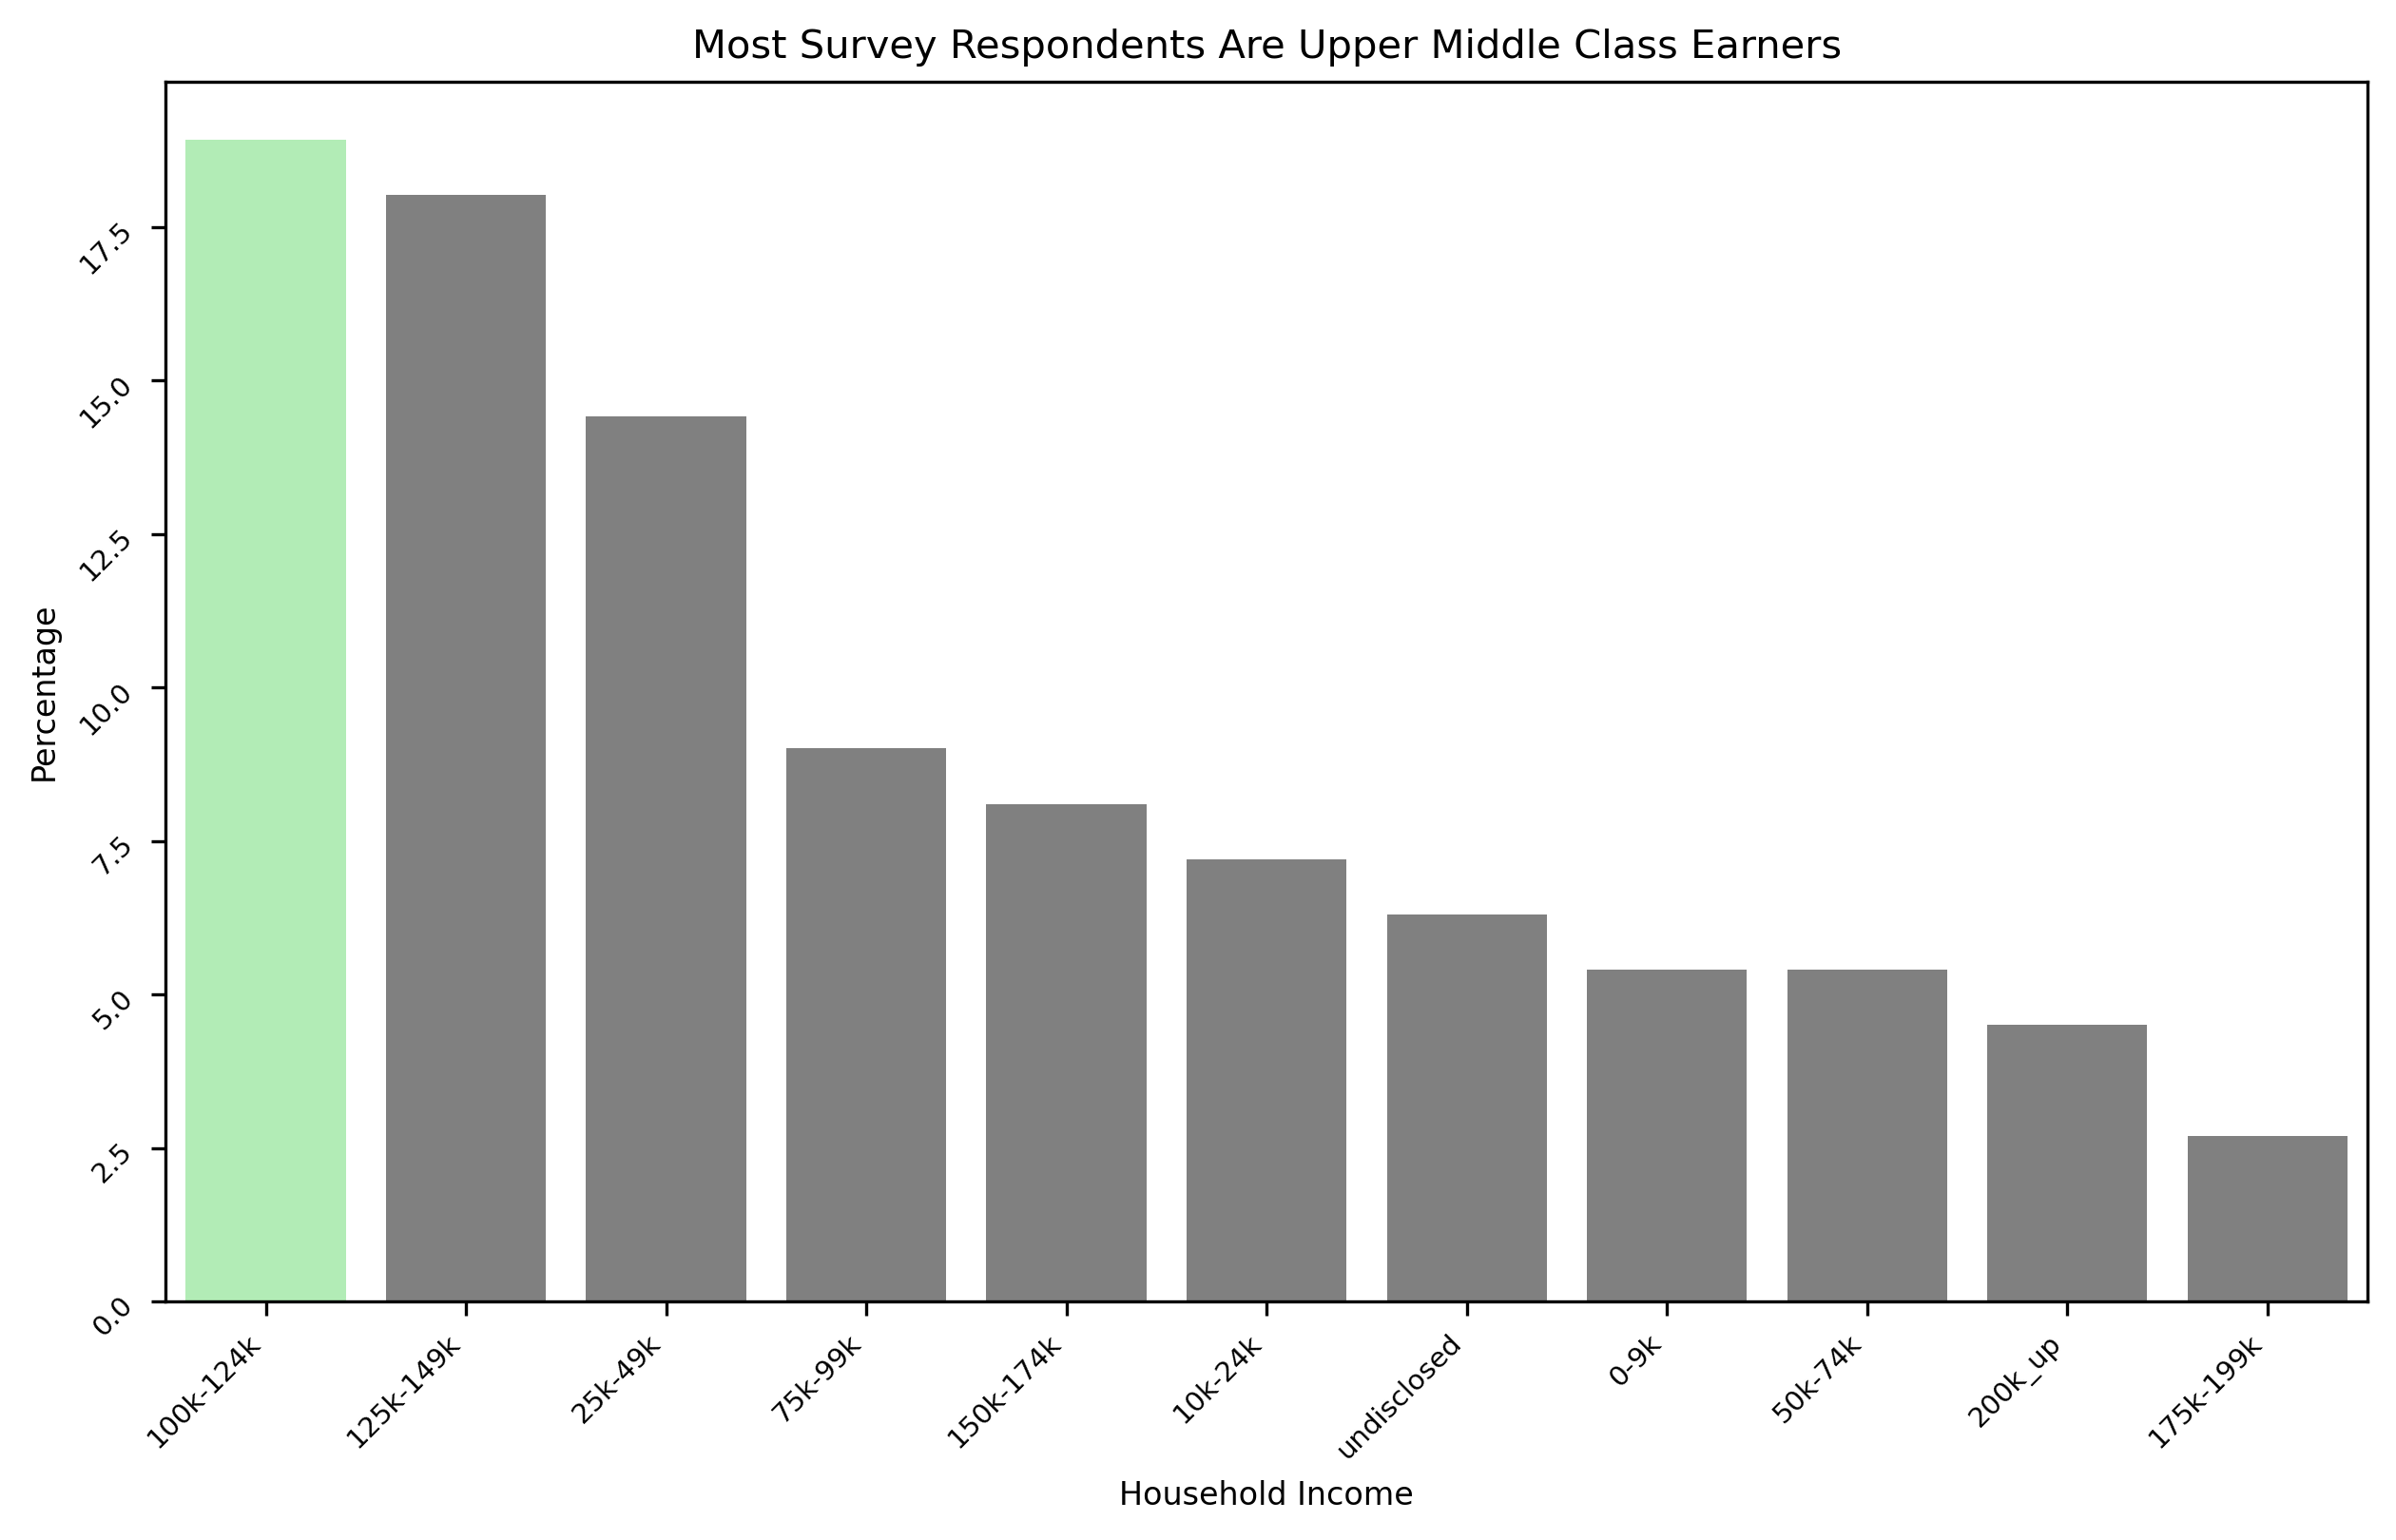

In [17]:
plot_percentages(july25,'Household Income', 'Household Income',
           'Most Survey Respondents Are Upper Middle Class Earners')

In [18]:
income_brackets = { "25k-49k":'low',
"50k-74k":"mid",
"75k-99k":"mid",
"125k-149k":"mid",
"100k-124k":"mid",
 "0-9k":"low",
"undisclosed":"undisclosed",
"150k-174k":"high",
"10k-24k":"low",
 "200k_up":"high",
"175k-199k":"high"}

In [19]:
july25['Household_Income'] = july25['Household Income'].replace(income_brackets)

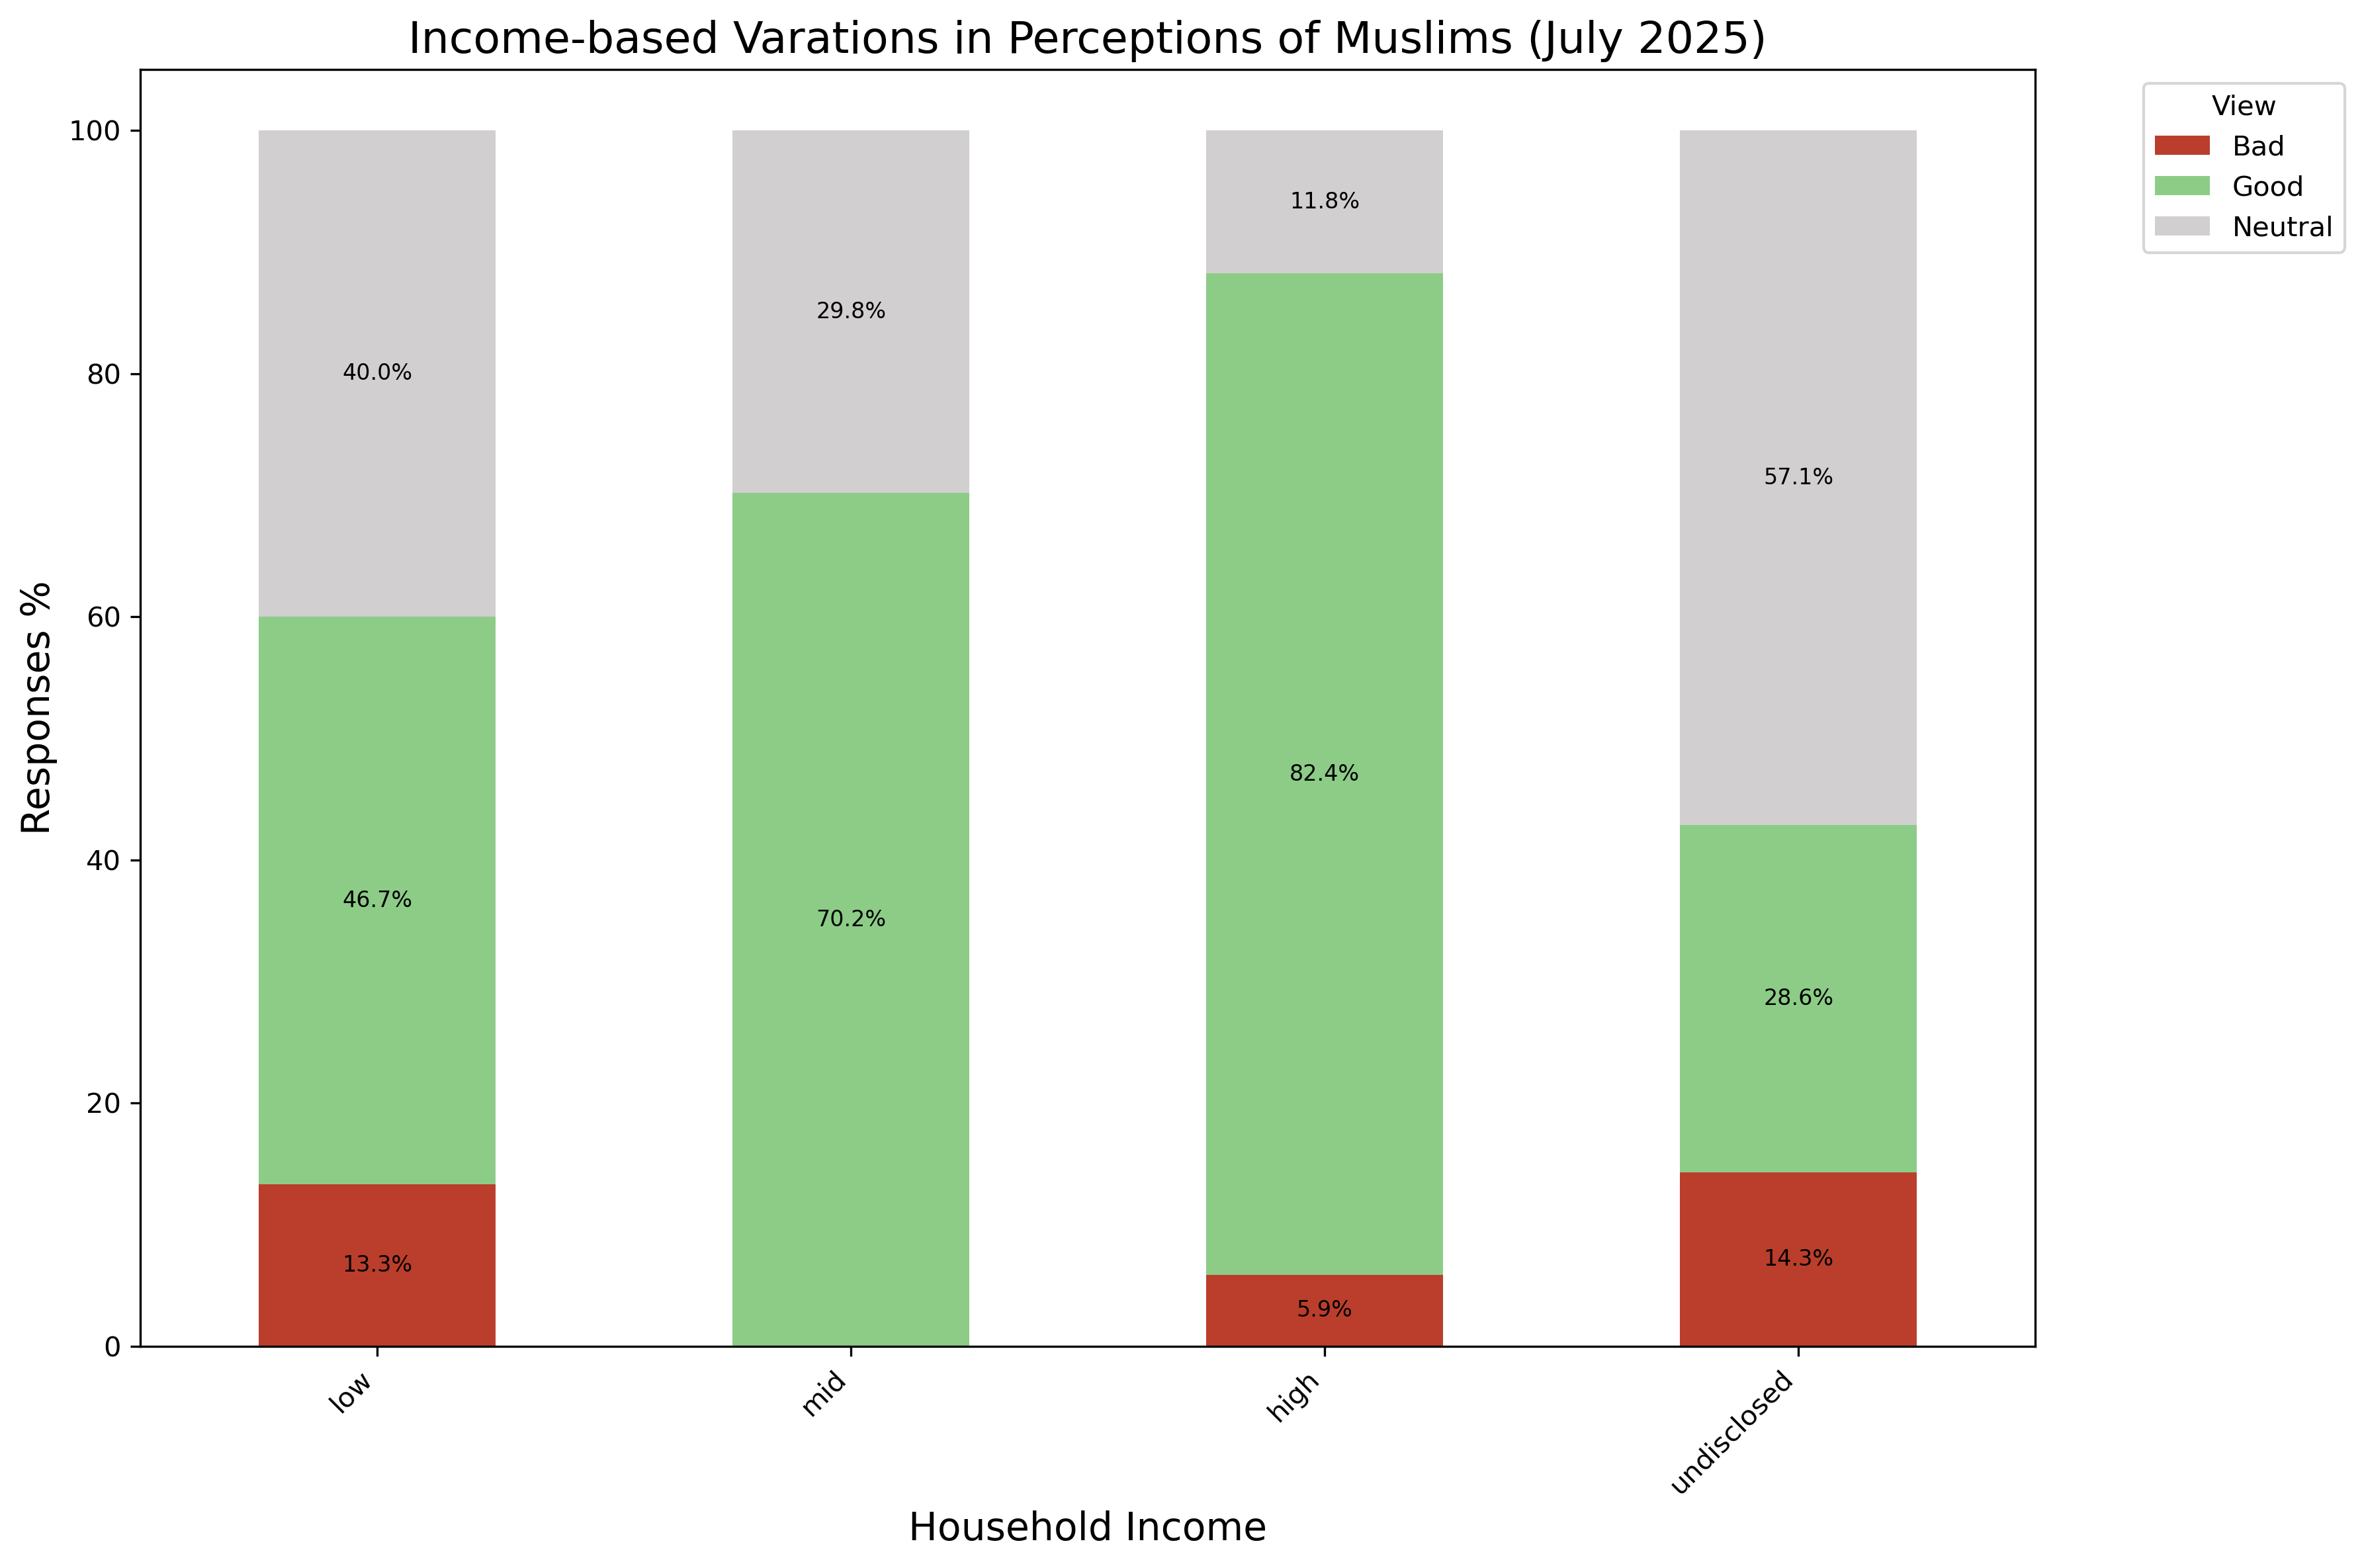

In [20]:
order = ['low','mid','high', 'undisclosed']

plot_income(
    df=july25, 
    title='Income-based Varations in Perceptions of Muslims (July 2025)',
    xlabel='Household Income',
    ylabel='Responses %',
    cat_col='Household_Income',
    sent_col='How do you feel about Muslim people in America?',
    cat_order=order
)

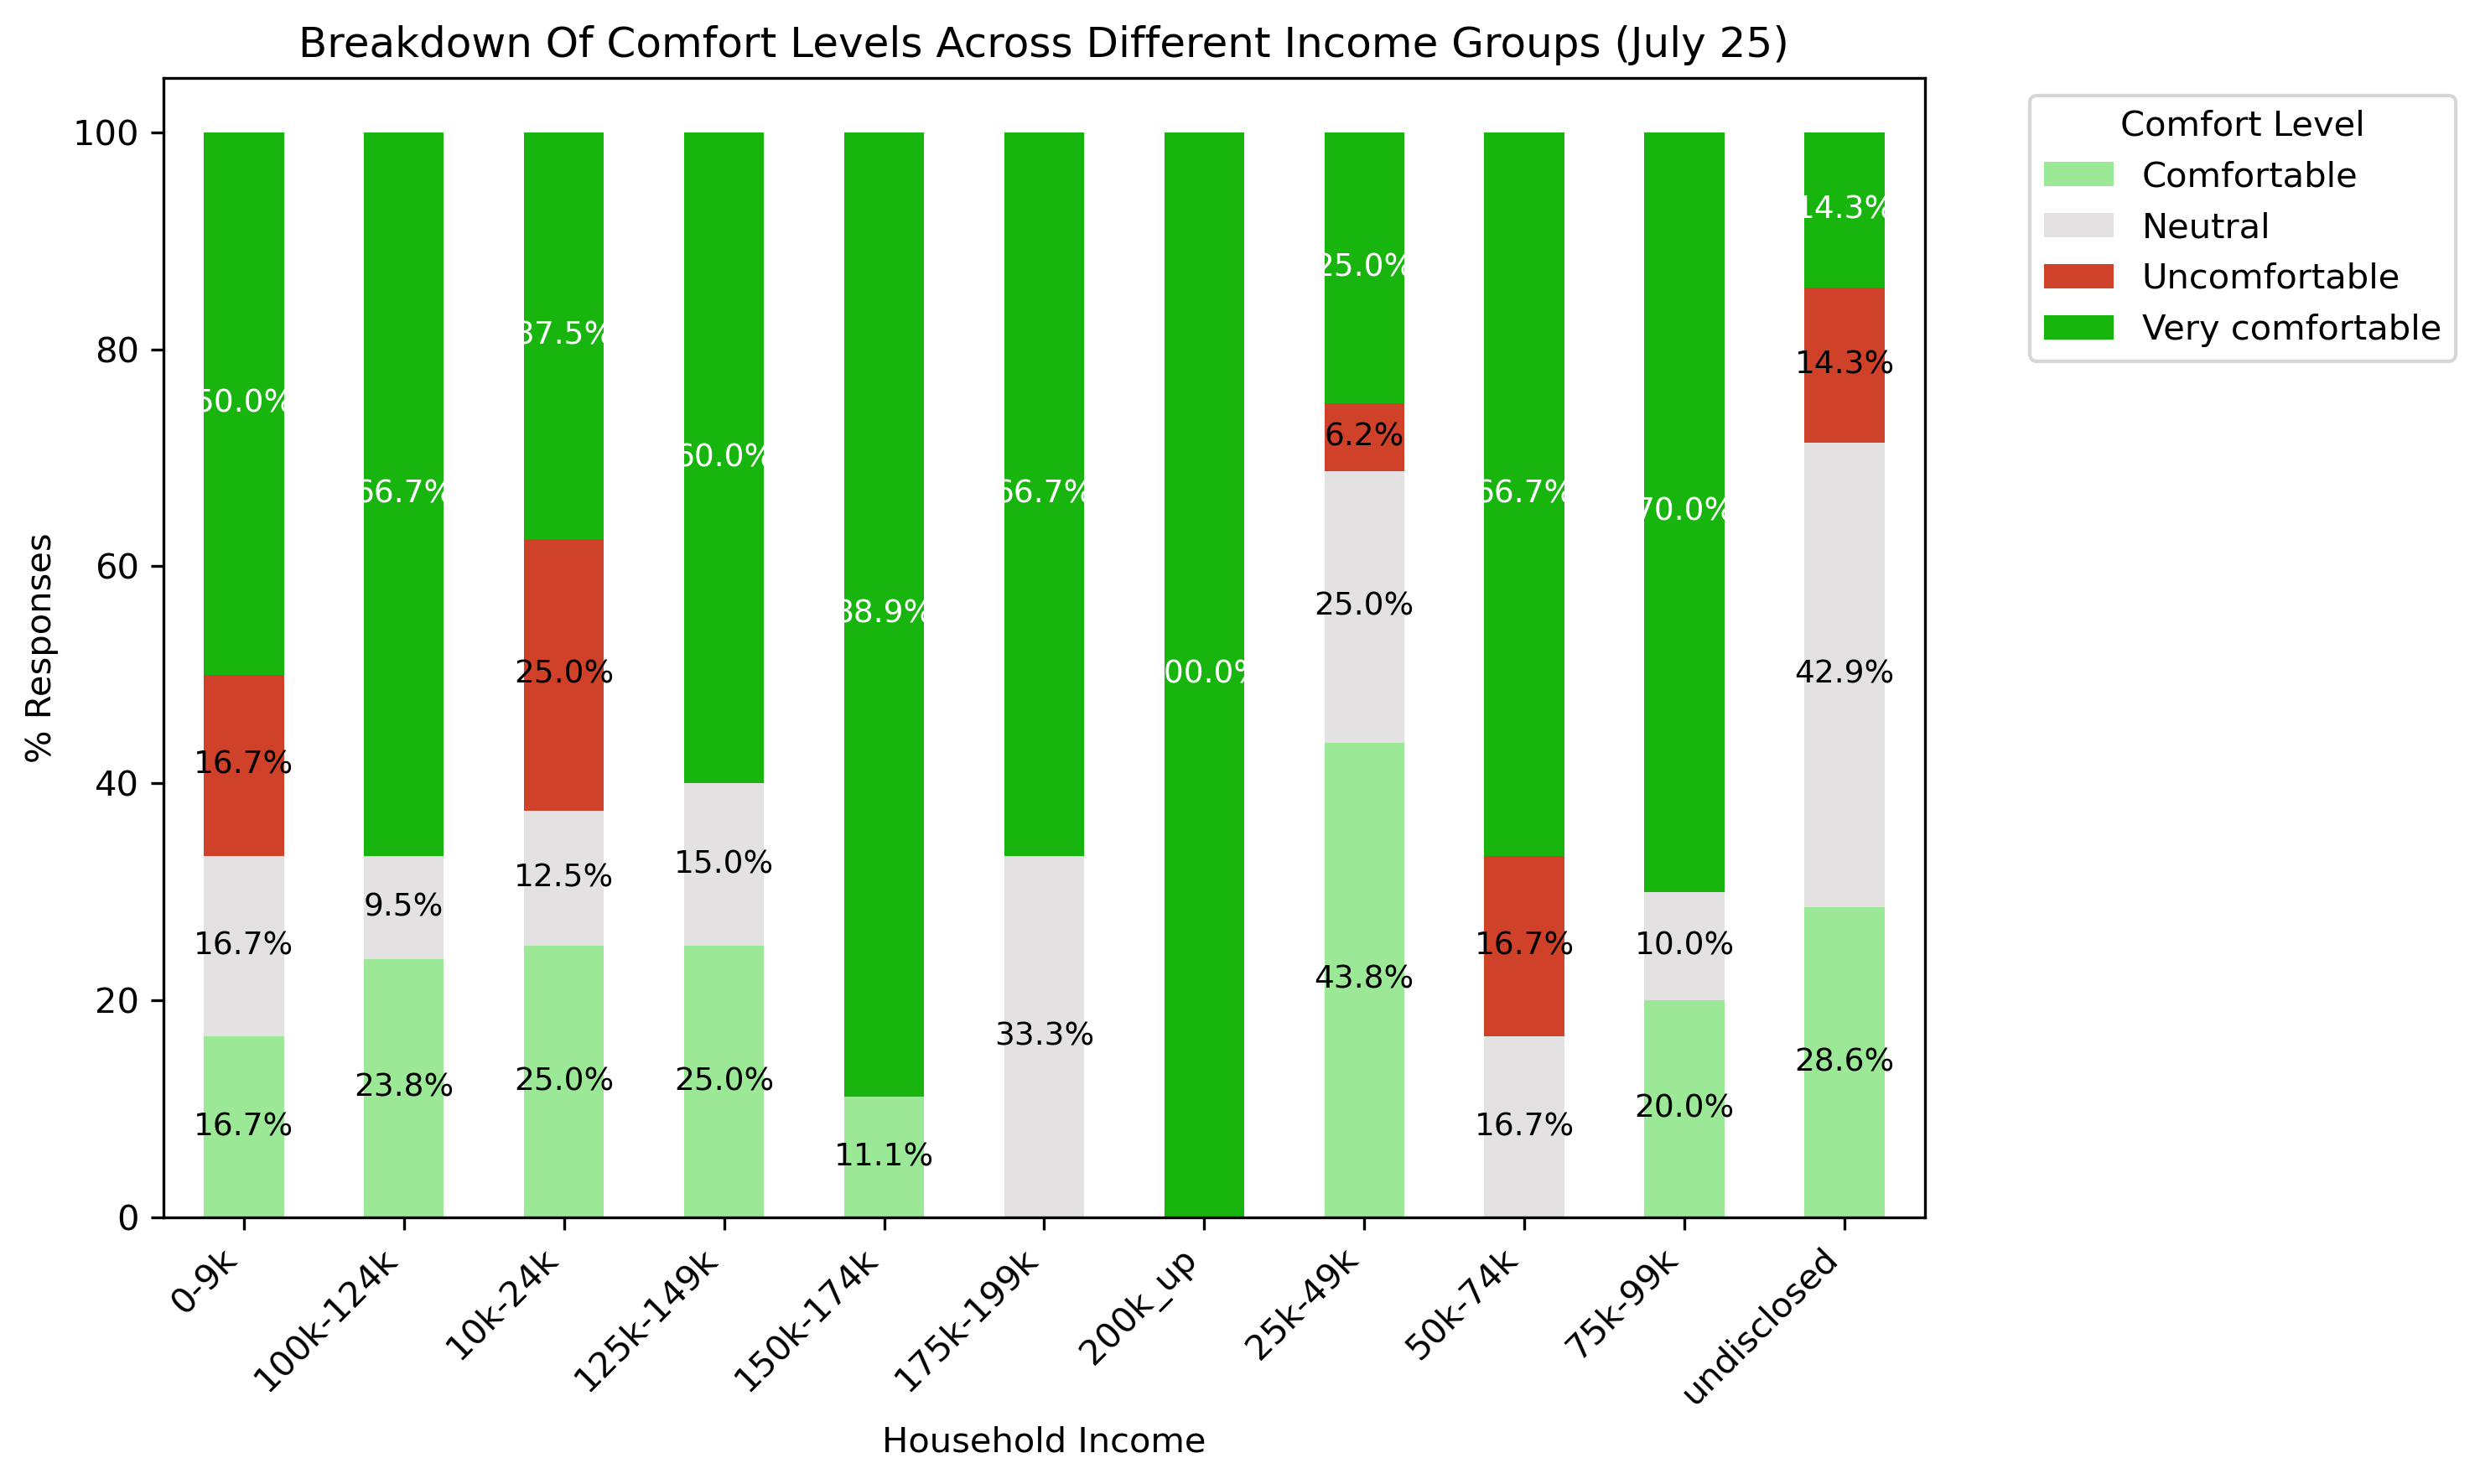

In [21]:
plot_comfort(
    df= july25, 
    category_col= 'Household Income',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Income Groups (July 25)',
    xlabel='Household Income',
    ylabel='% Responses',
)

**Higher-income respondents expressed the most favorable views toward Muslims, while unfavorable sentiment was most concentrated among low-income and undisclosed-income groups.**

There is a clear income-based difference in perceptions of Muslims. 
Positive views are strongest among those with higher incomes, while negative sentiment is more prevalent among those with lower or undisclosed income levels. The mid-income group demonstrates high positivity and no hostility, while the undisclosed group leans heavily neutral, suggesting disengagement or uncertainty. 



# Region Vs Sentiment

Saving plot to: /Users/manelmahroug/Desktop/Muslim-Brand-Sentiment/scripts/../images/More_Than_Half_of_Survey_Participants_Come_From_Middle_Atlantic_and_Pacific_Regions.png


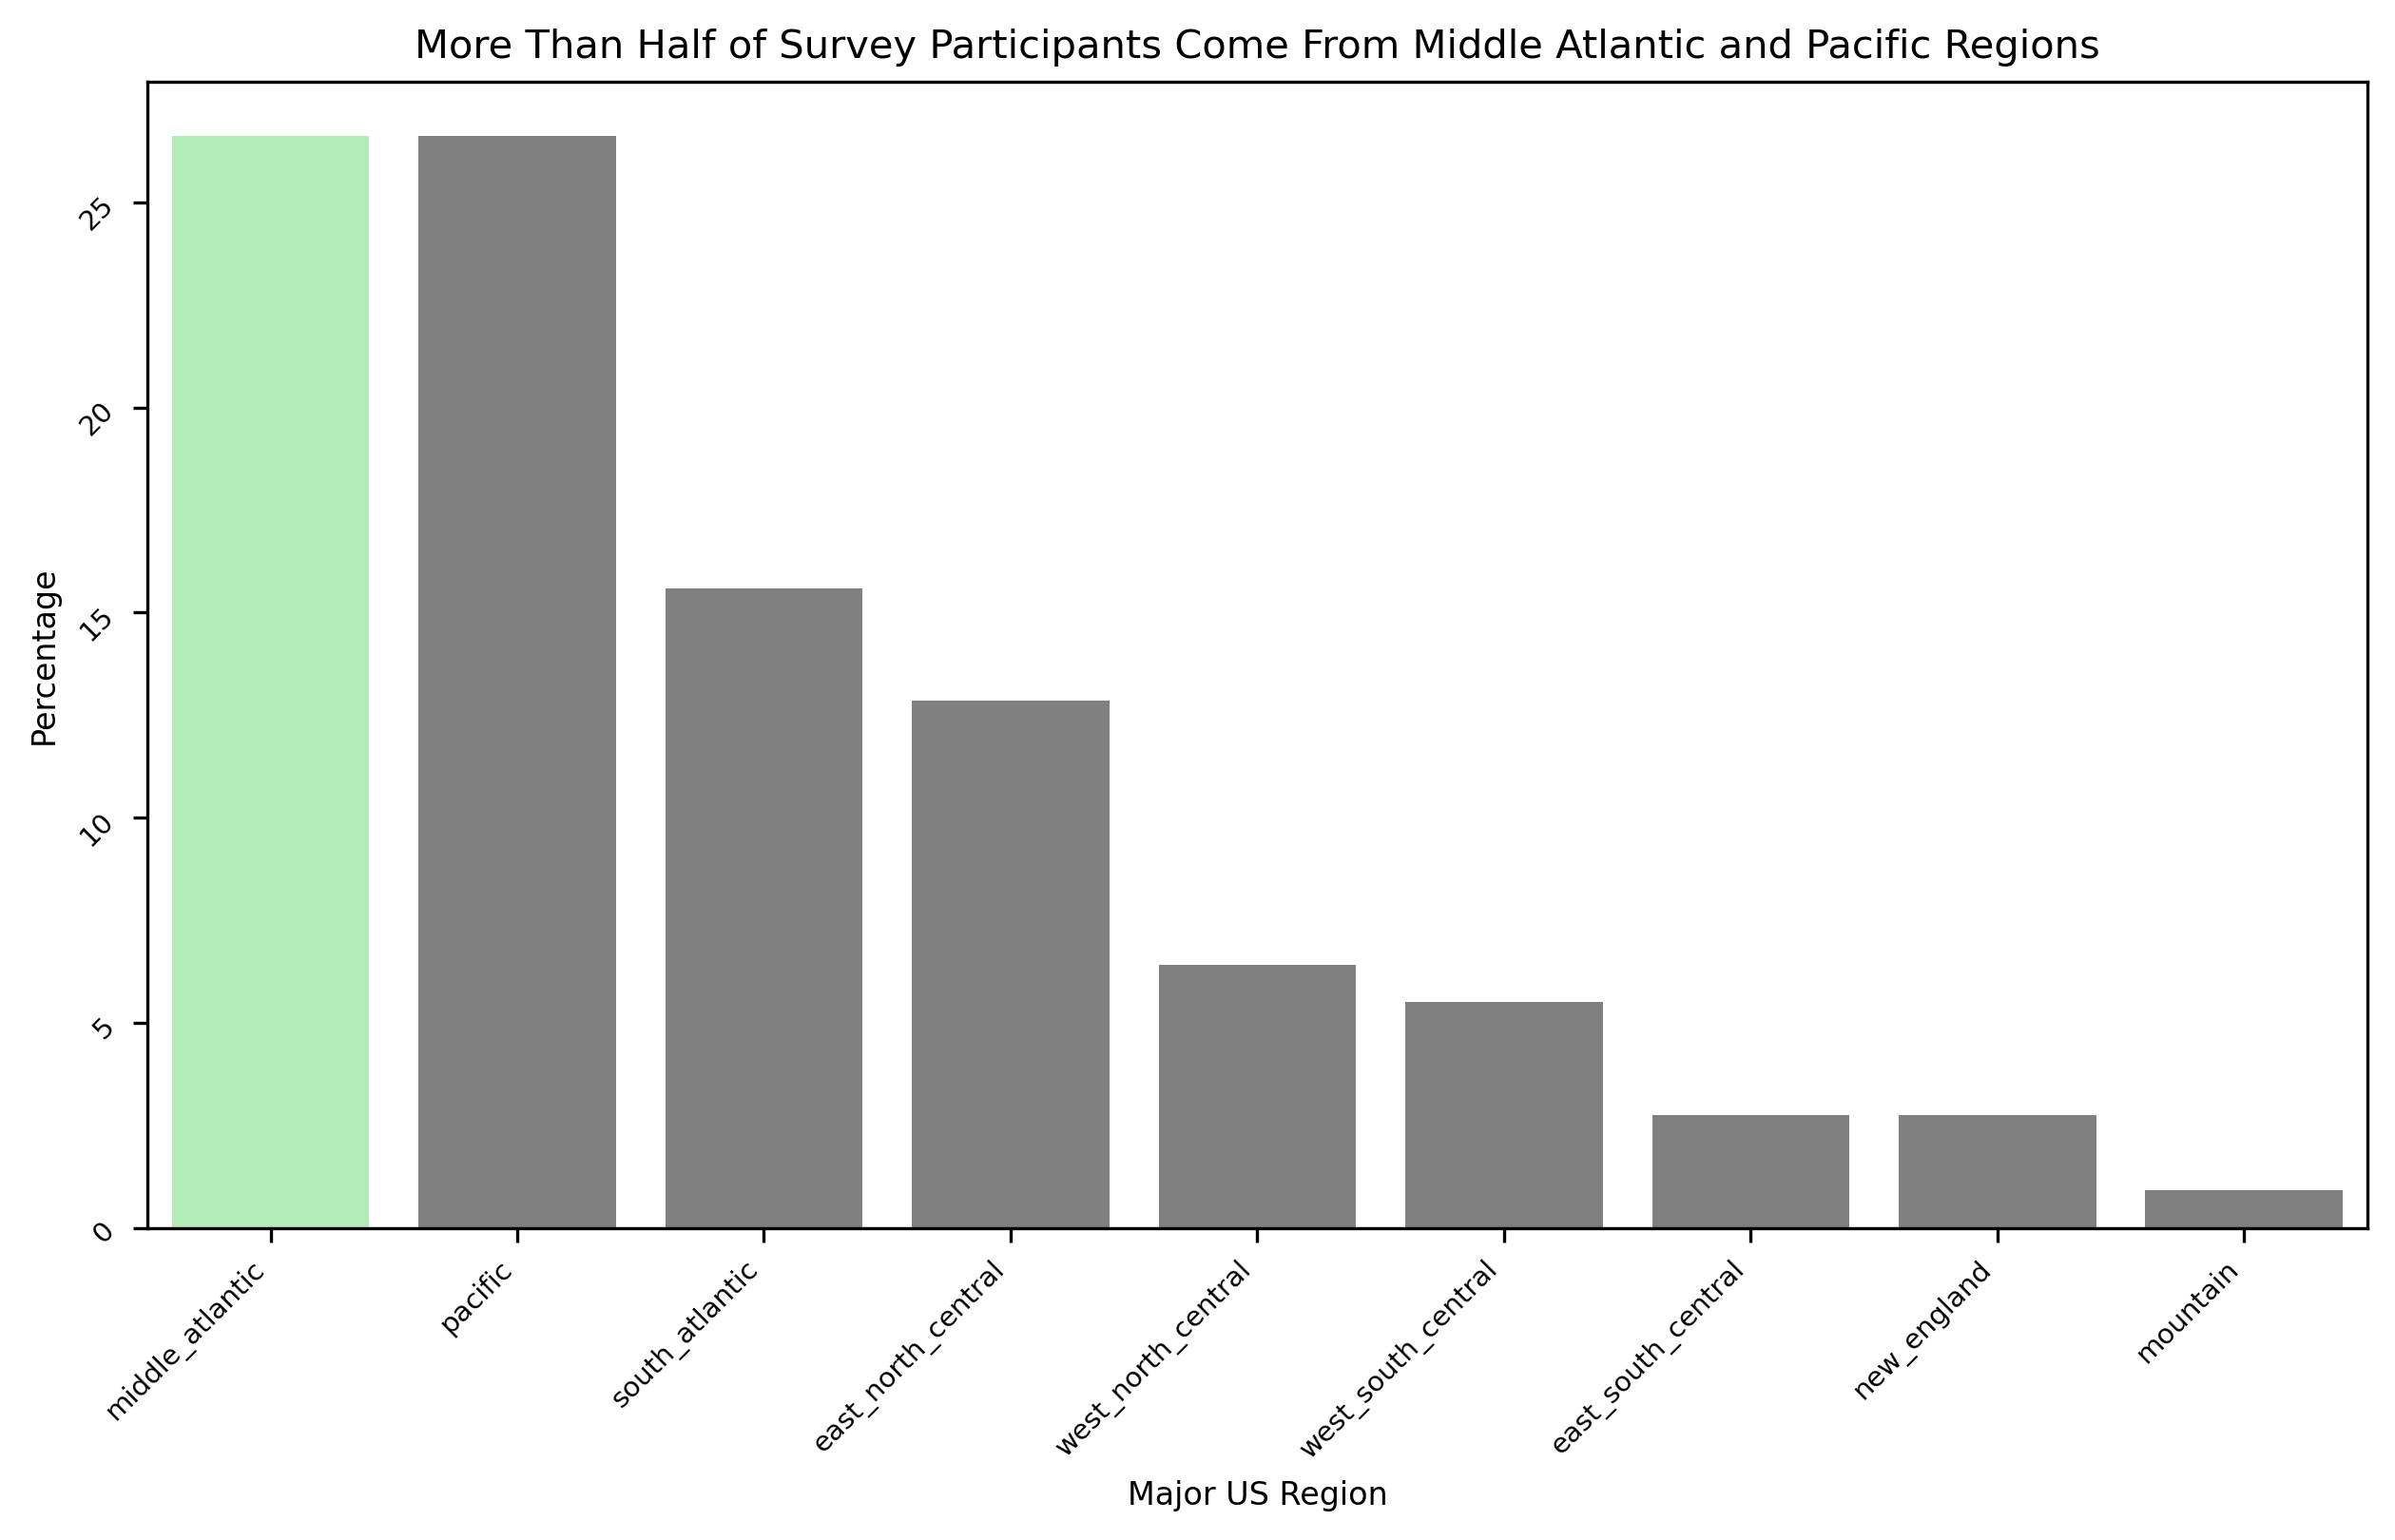

In [22]:
plot_percentages(july25,'Major US Region', 'Major US Region',
                 'More Than Half of Survey Participants Come From Middle Atlantic and Pacific Regions')

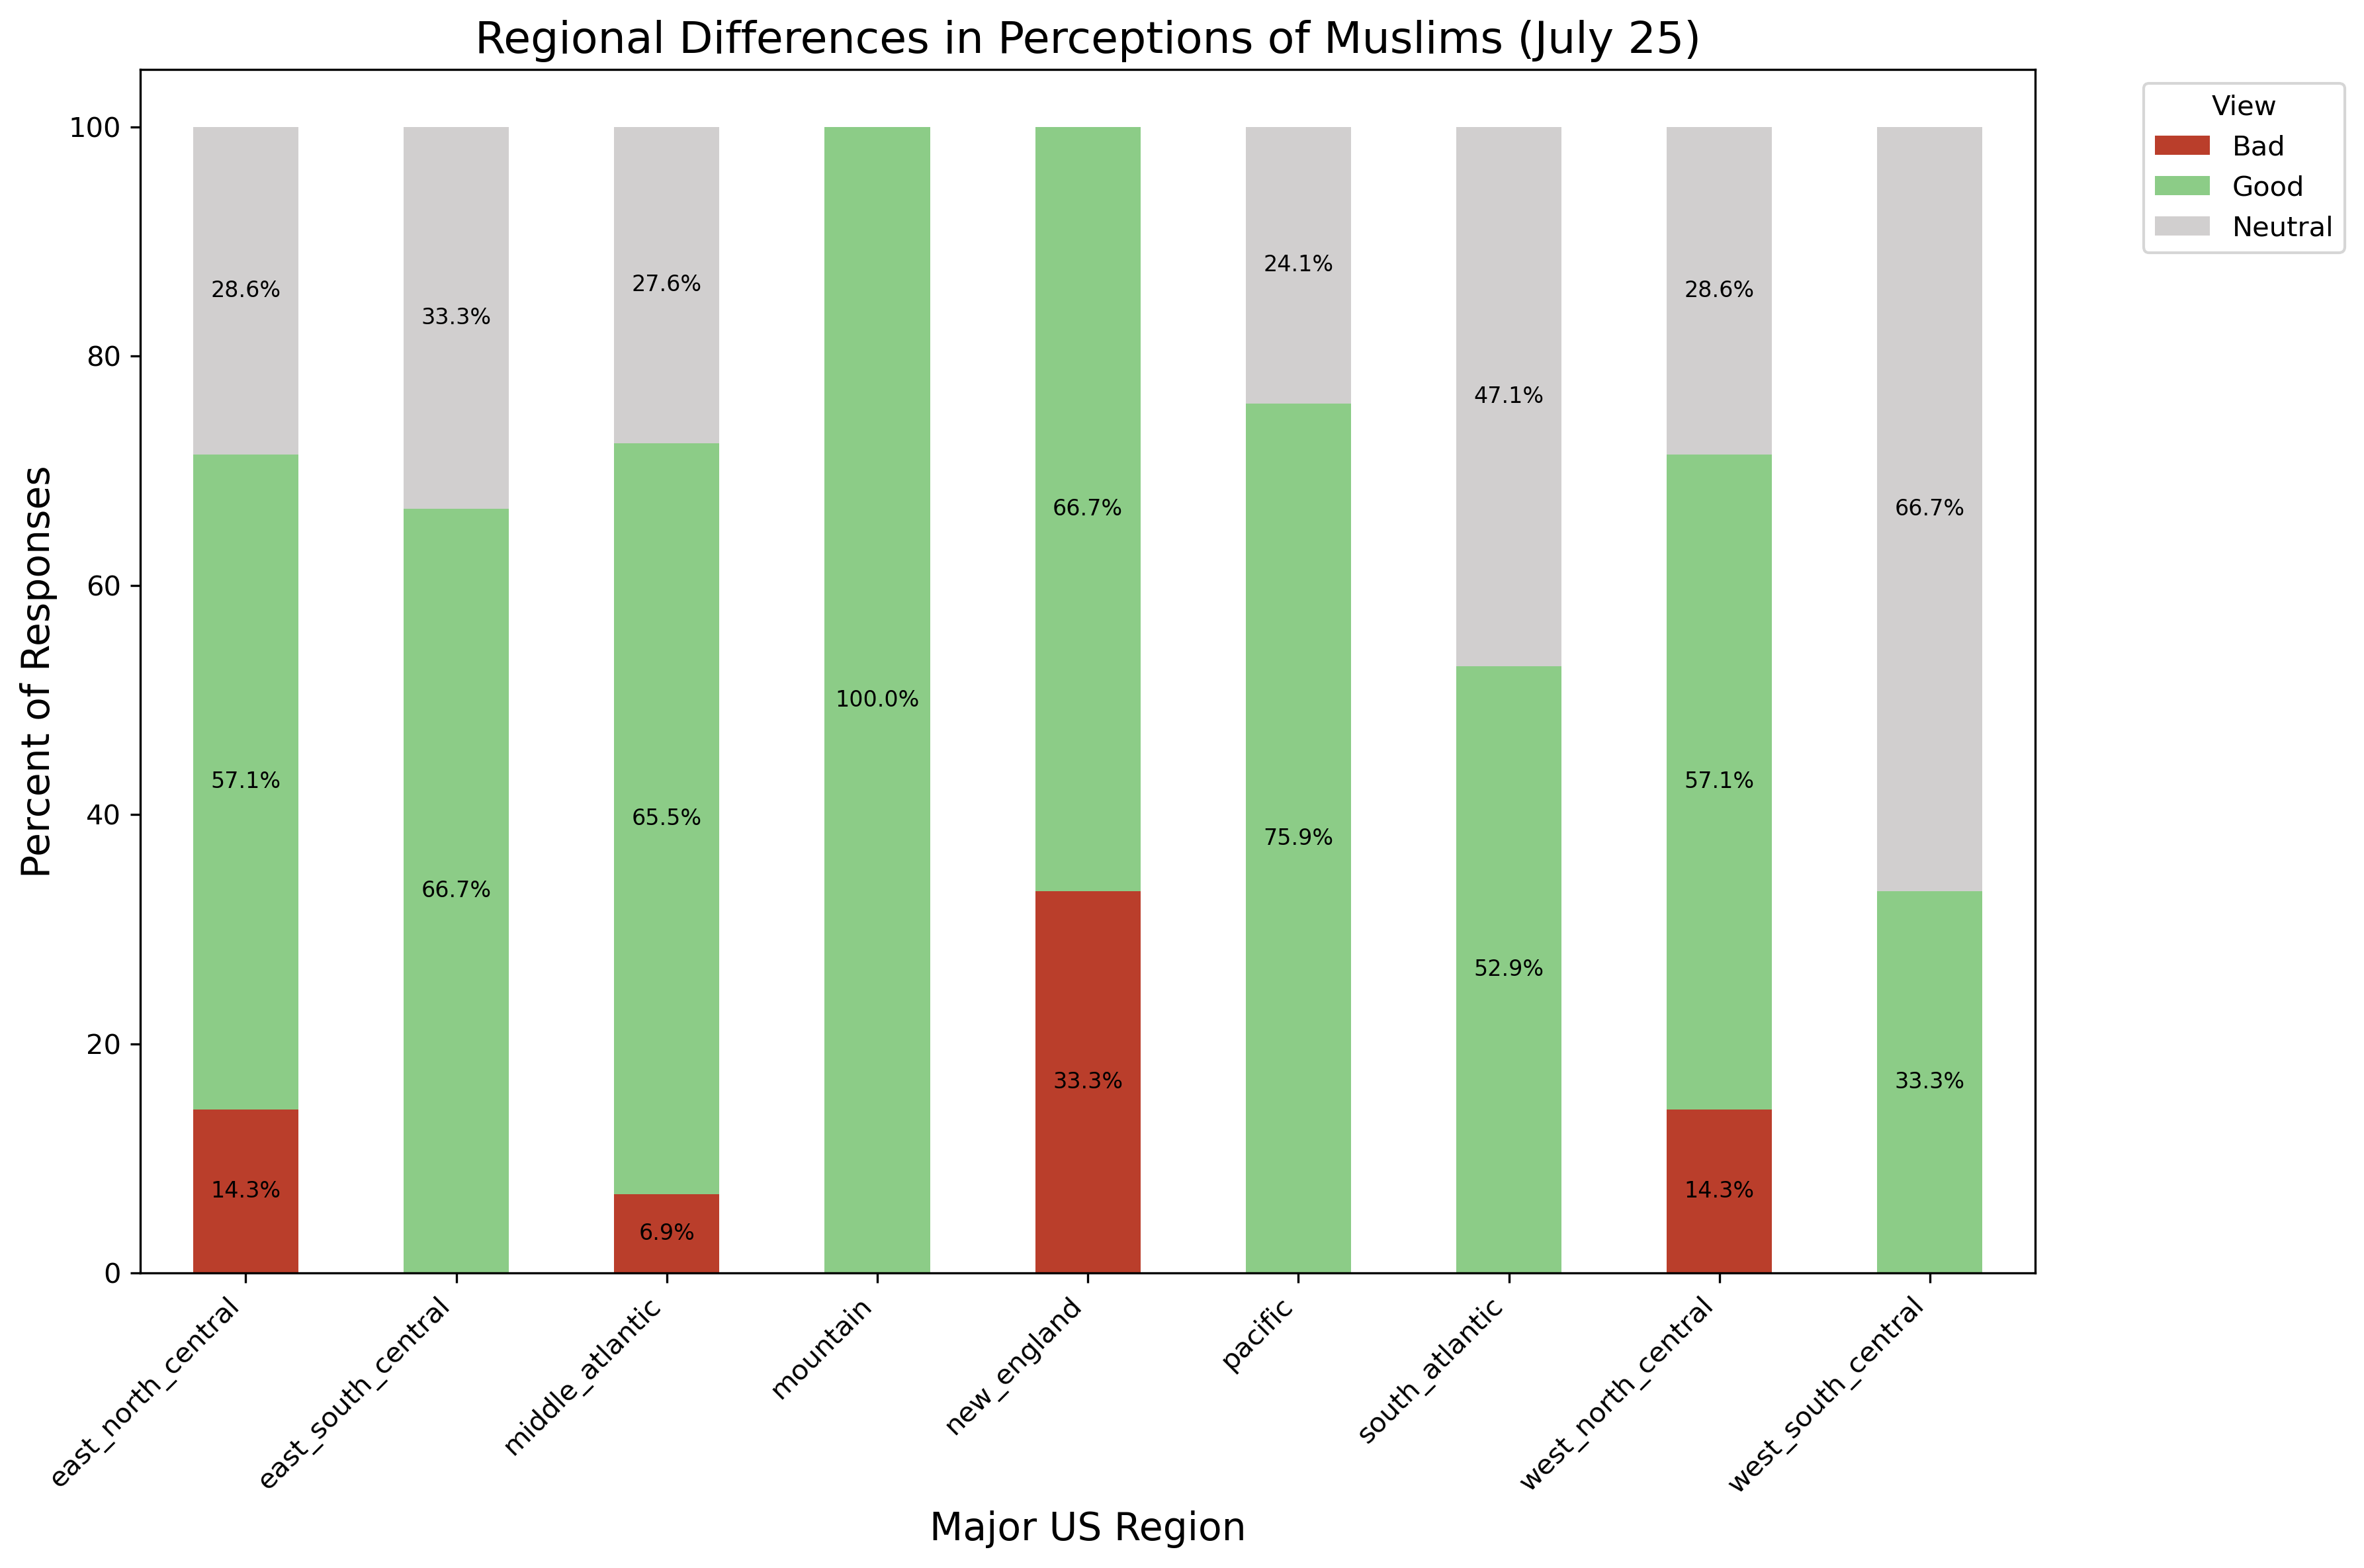

In [23]:
plot_stacked_bar_chart(
    df=july25, 
    title='Regional Differences in Perceptions of Muslims (July 25)',
    xlabel='Major US Region',
    ylabel='Percent of Responses',
    cat_col='Major US Region',
    sent_col='How do you feel about Muslim people in America?'
)

## Relationship Between Knowing a Muslim and Sentiment

Saving plot to: /Users/manelmahroug/Desktop/Muslim-Brand-Sentiment/scripts/../images/65%_Of_Respondents_Have_Spoken_to_at_least_one_Muslim_in_the_last_7_days_July_25.png


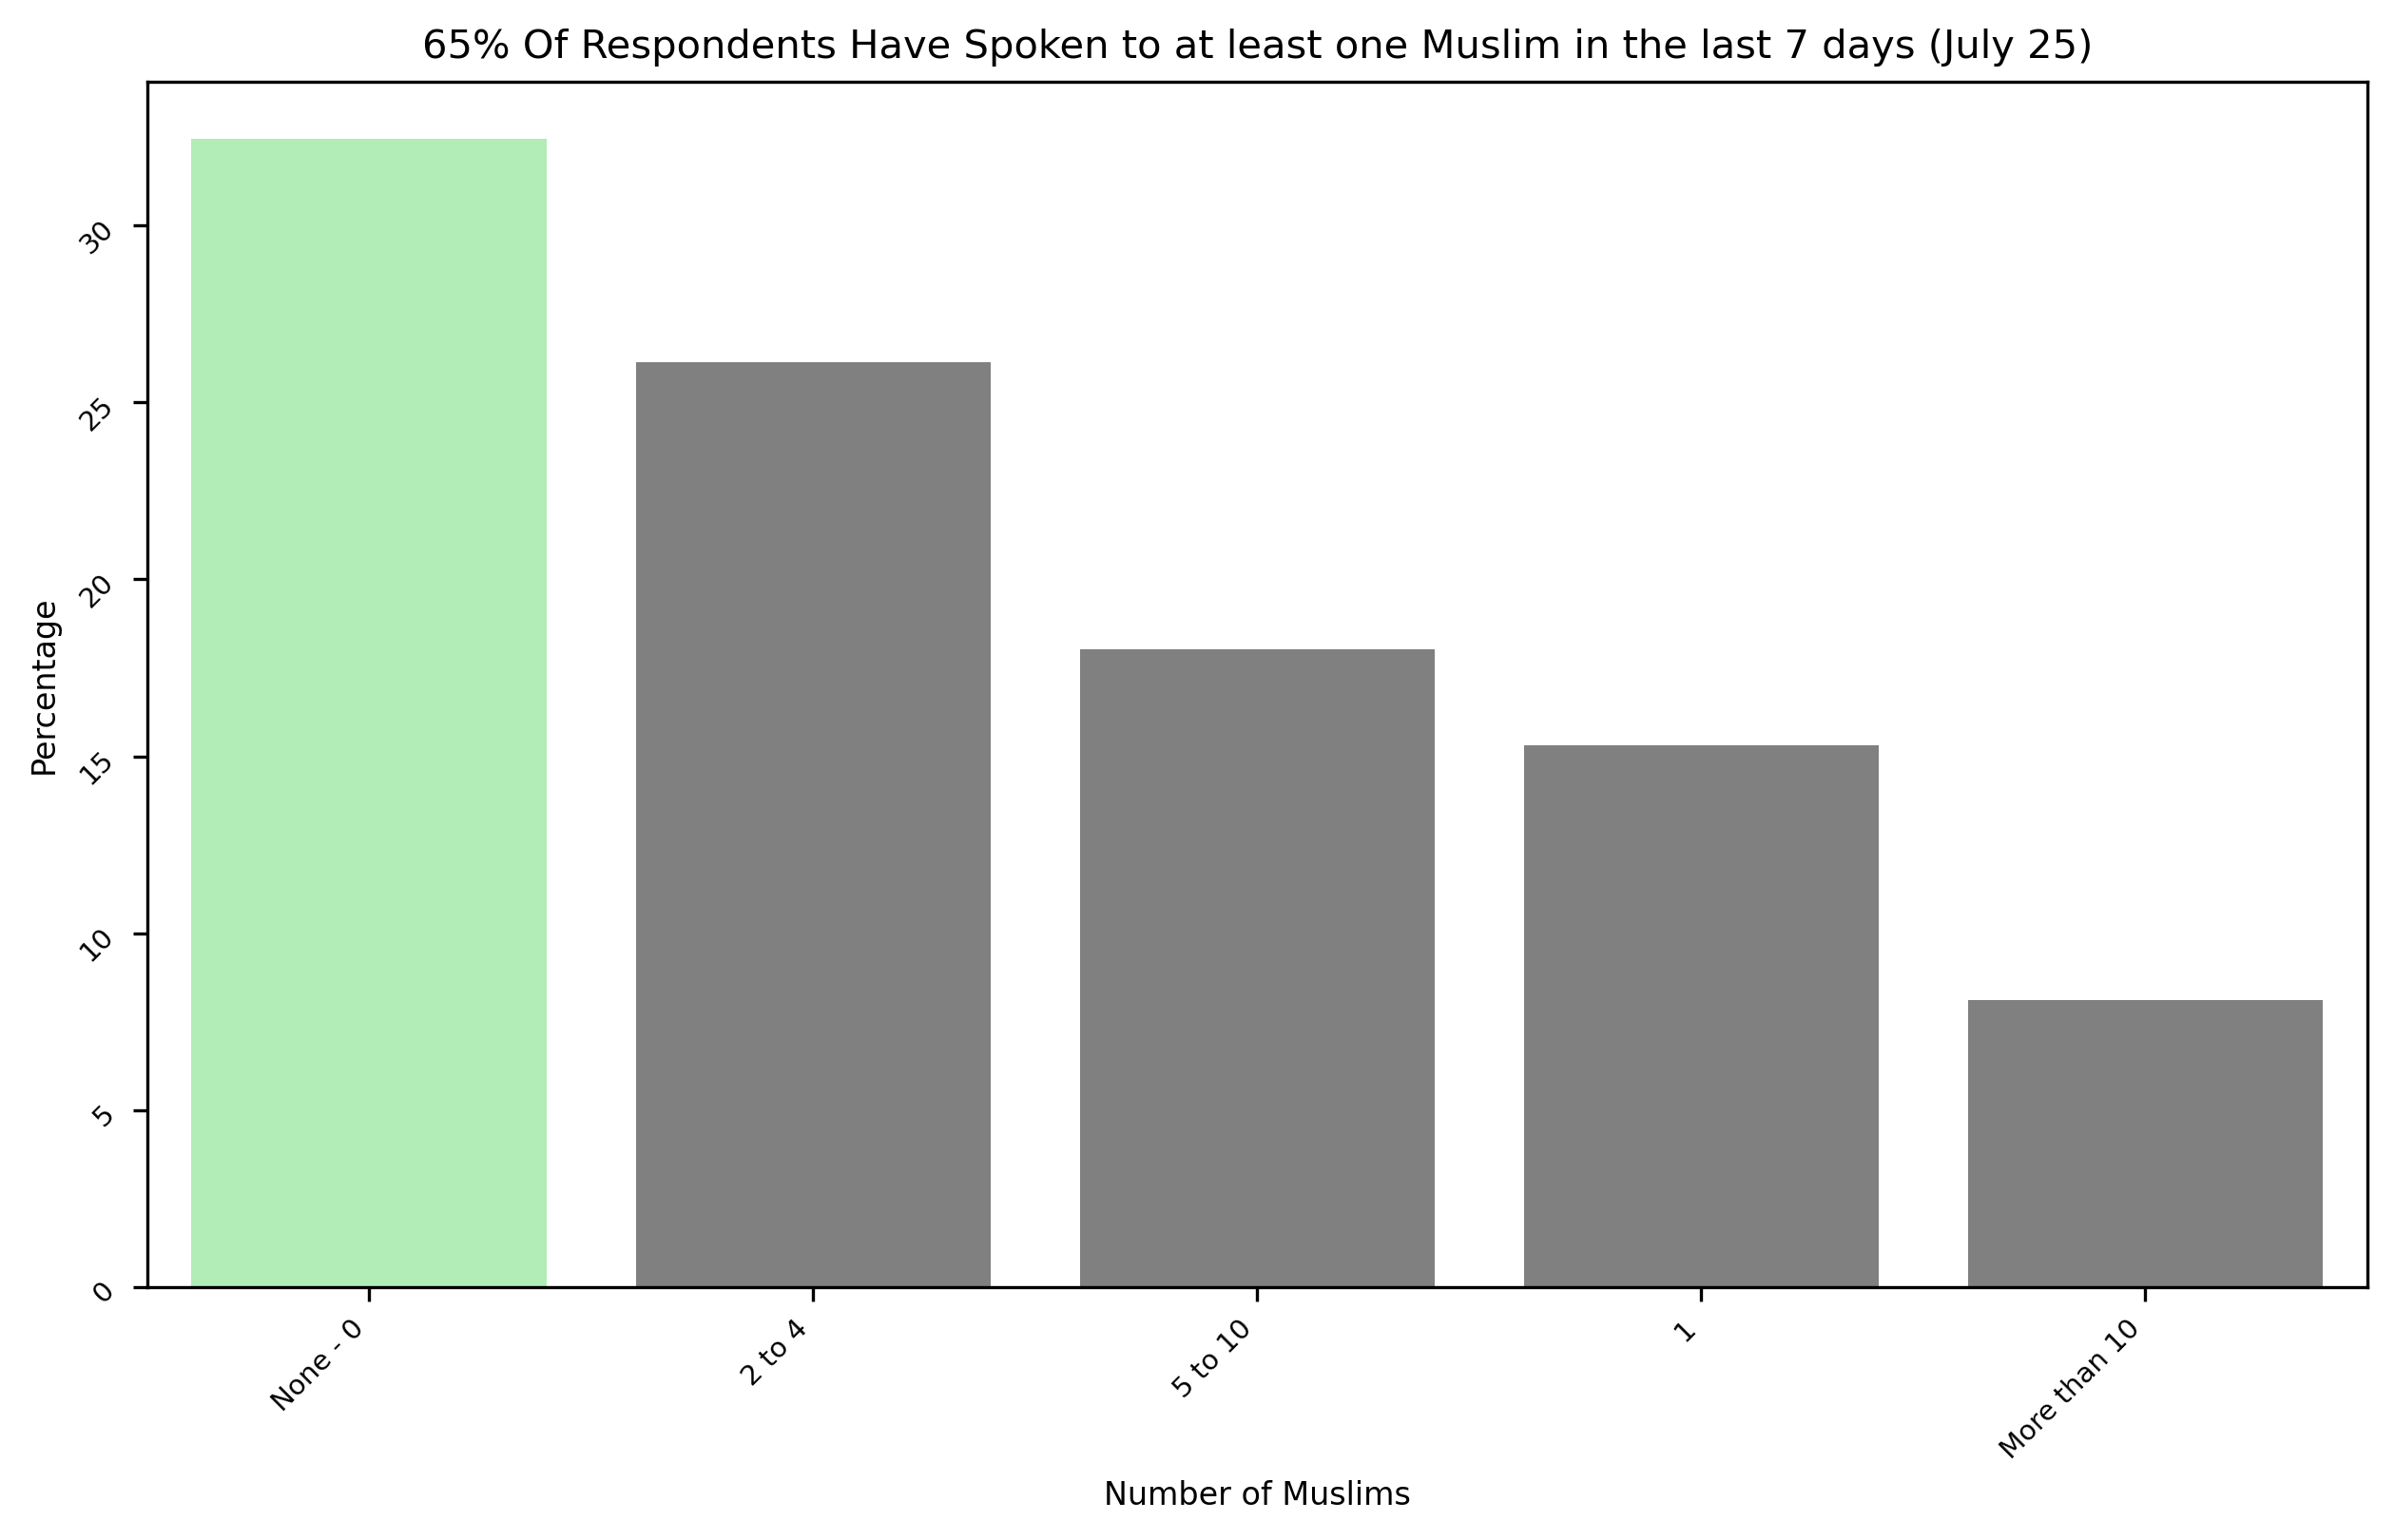

In [24]:
plot_percentages(july25,'How many Muslim people have you talked to in the last 7 days?', 'Number of Muslims',\
           '65% Of Respondents Have Spoken to at least one Muslim in the last 7 days (July 25)')

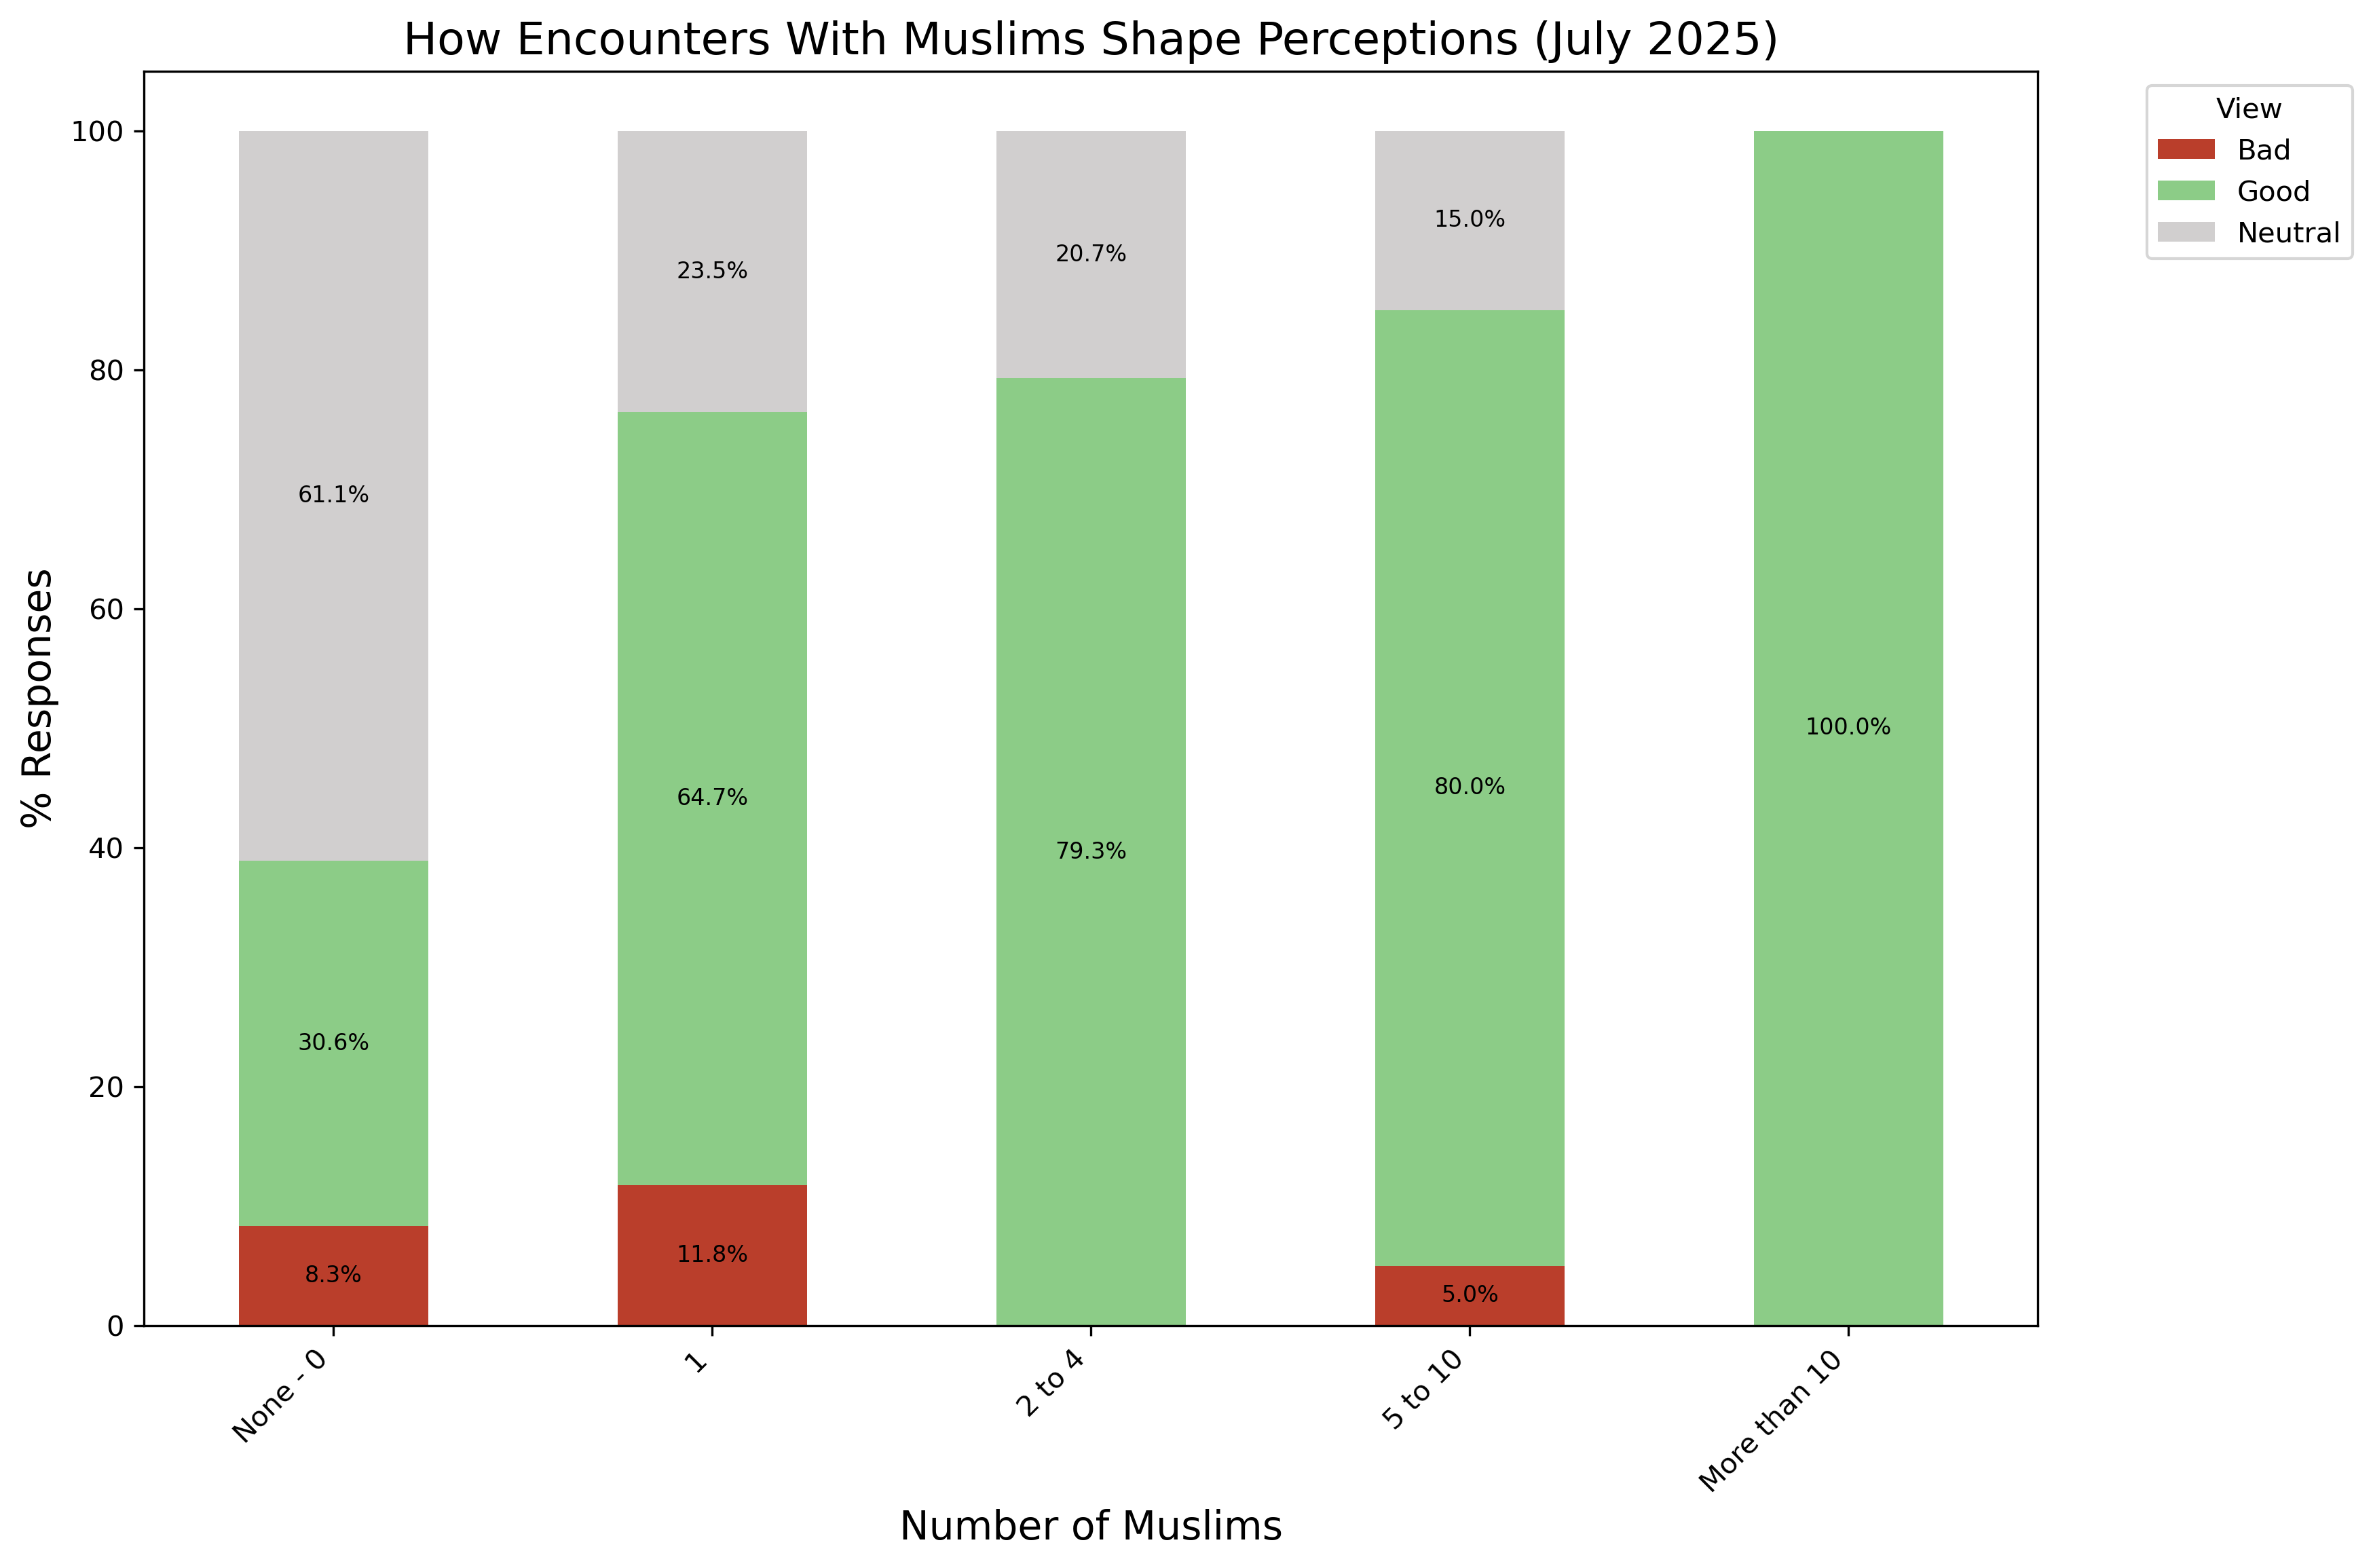

<Figure size 7200x4000 with 0 Axes>

In [28]:
plot_stacked_bar_chart_interaction(
    df=july25, 
    title='How Encounters With Muslims Shape Perceptions (July 2025)',
    xlabel='Number of Muslims',
    ylabel='% Responses',
    cat_col='How many Muslim people have you talked to in the last 7 days?',
    sent_col='How do you feel about Muslim people in America?'
)

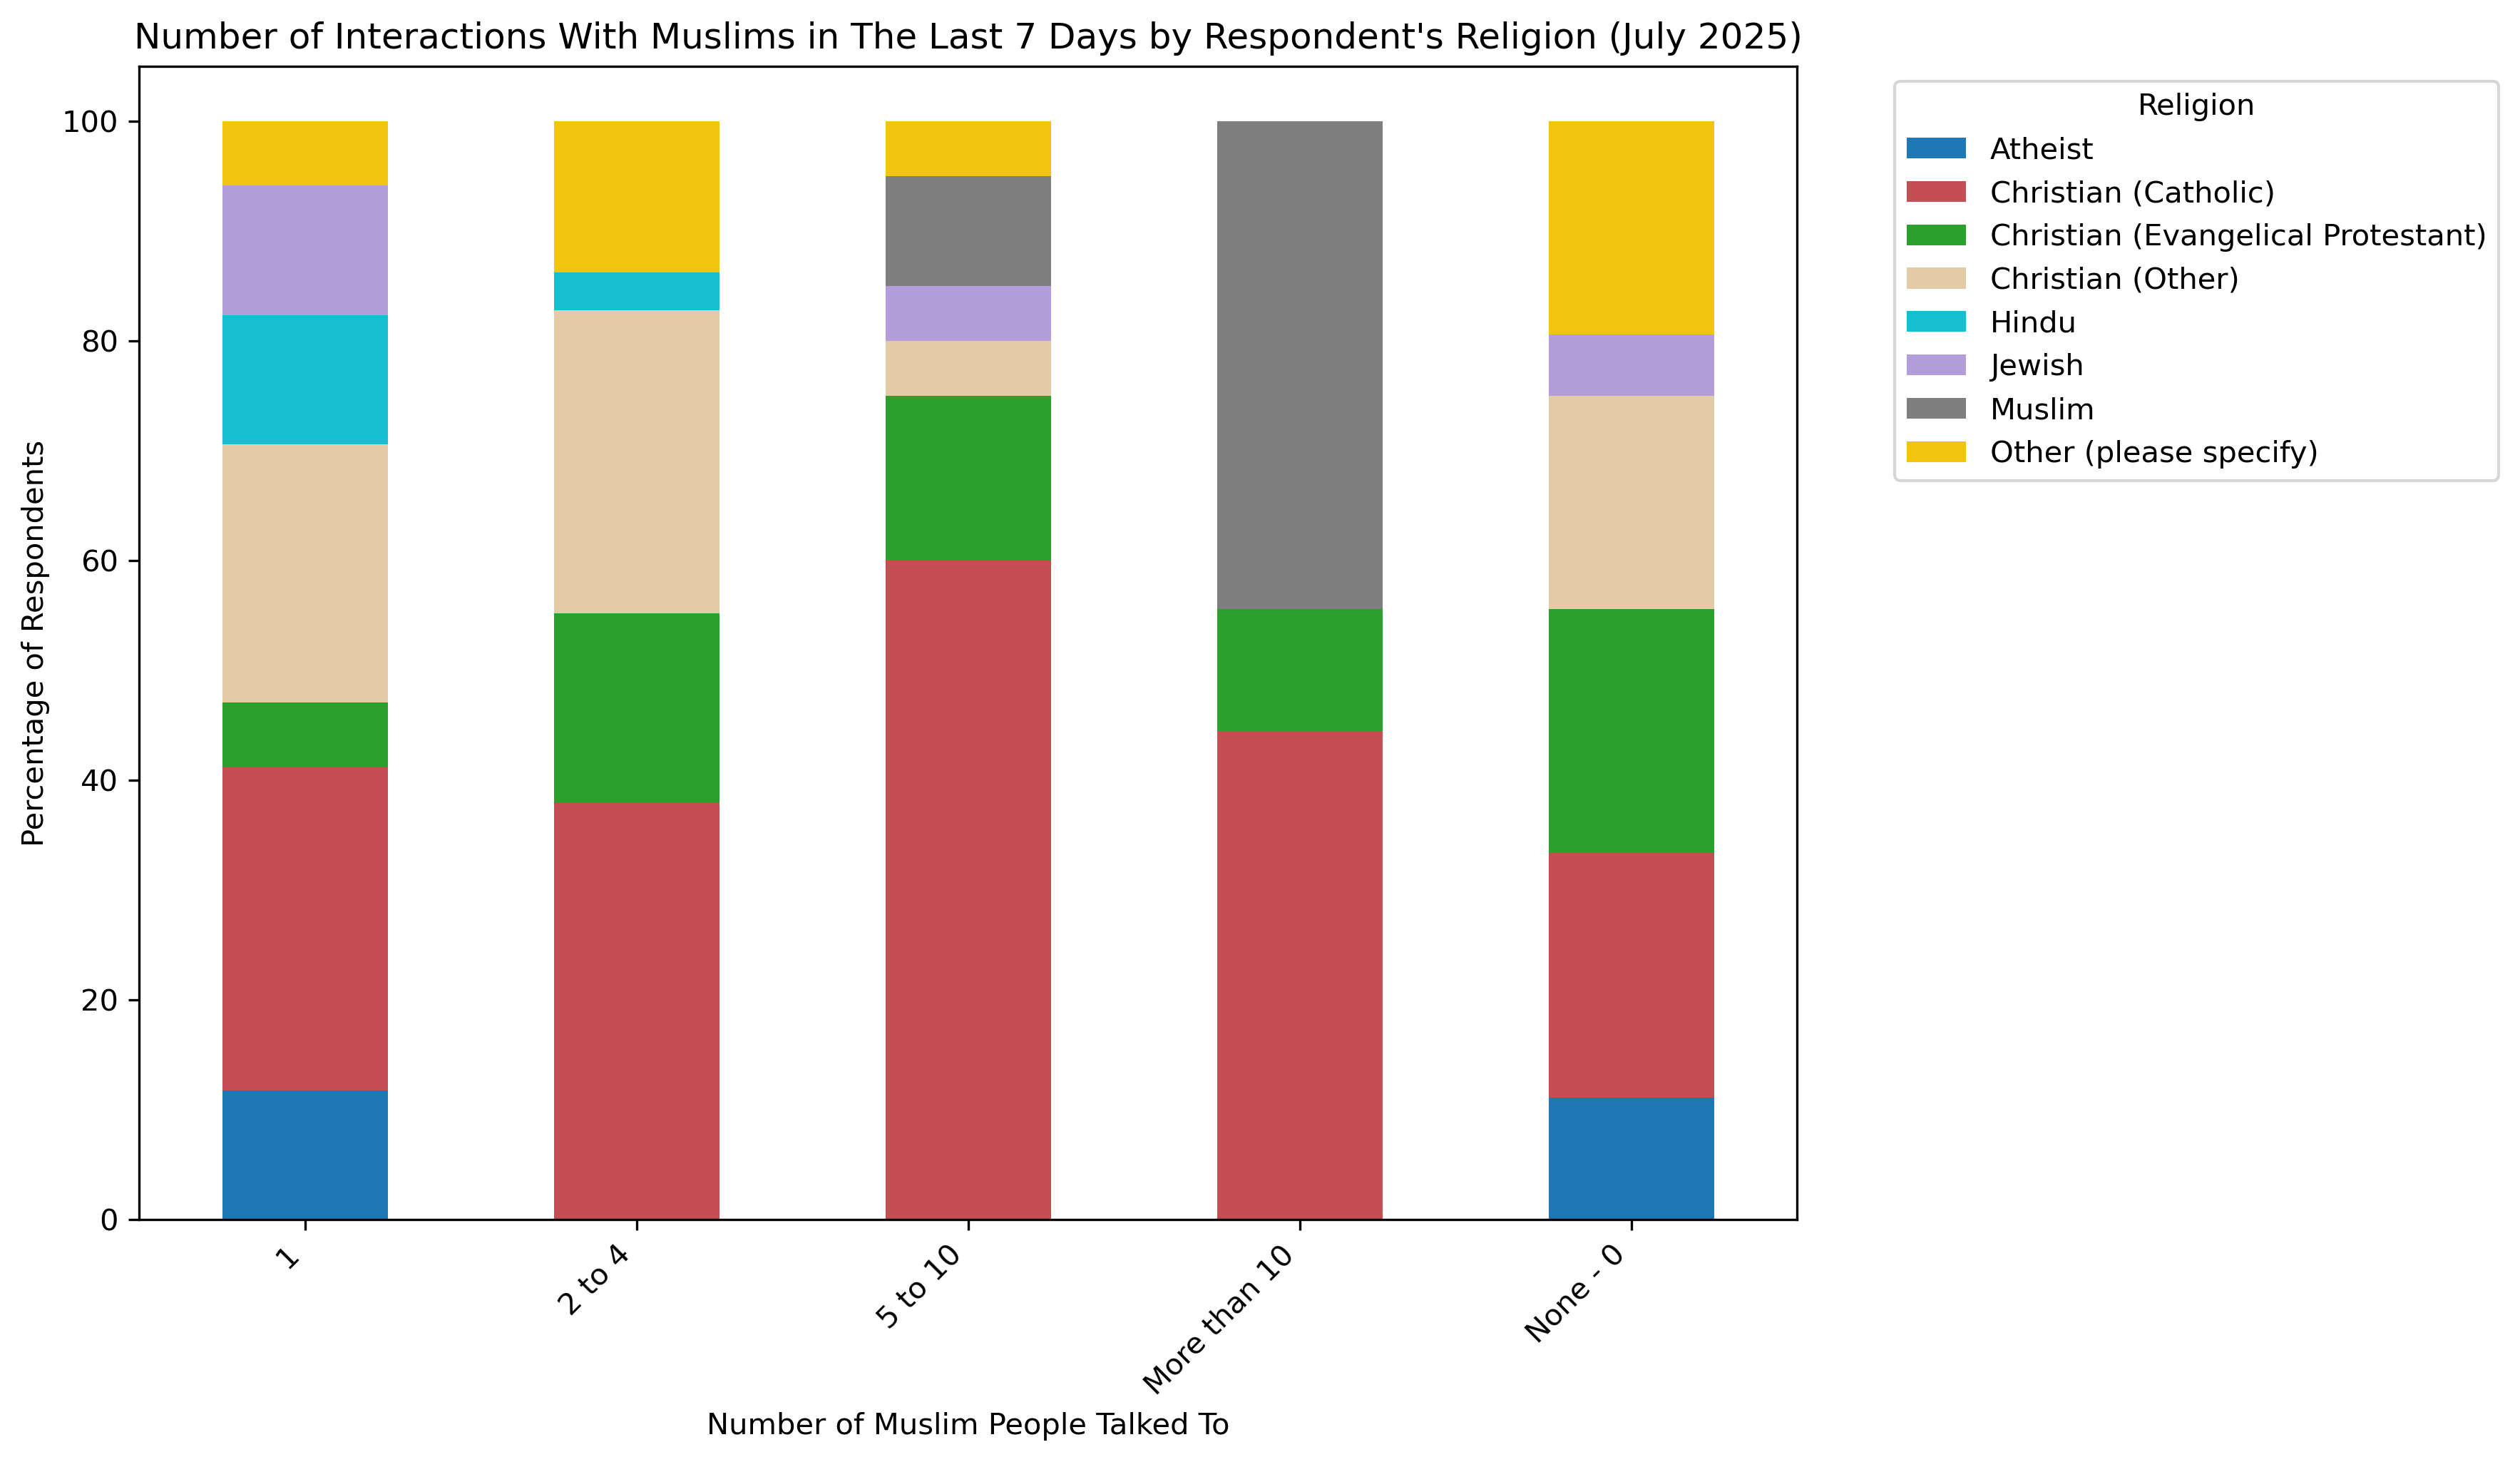

In [36]:
import matplotlib.pyplot as plt

counts = july25.groupby(['How many Muslim people have you talked to in the last 7 days?', 
                        'What is your religion?']).size().unstack()

# Convert counts to percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plotting
percentages.plot(kind='bar', stacked=True, figsize=(10, 7), \
                 color = ['#1f77b4', '#c44e52', '#2ca02c', '#e3cba5', '#17becf',
          '#b39ddb', '#7f7f7f', '#f1c40f', '#a6cee3', '#e7969c']

)

plt.title("Number of Interactions With Muslims in The Last 7 Days by Respondent's Religion (July 2025)")
plt.xlabel("Number of Muslim People Talked To")
plt.ylabel("Percentage of Respondents")
plt.xticks(rotation=45, ha='right') 

plt.legend(title="Religion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

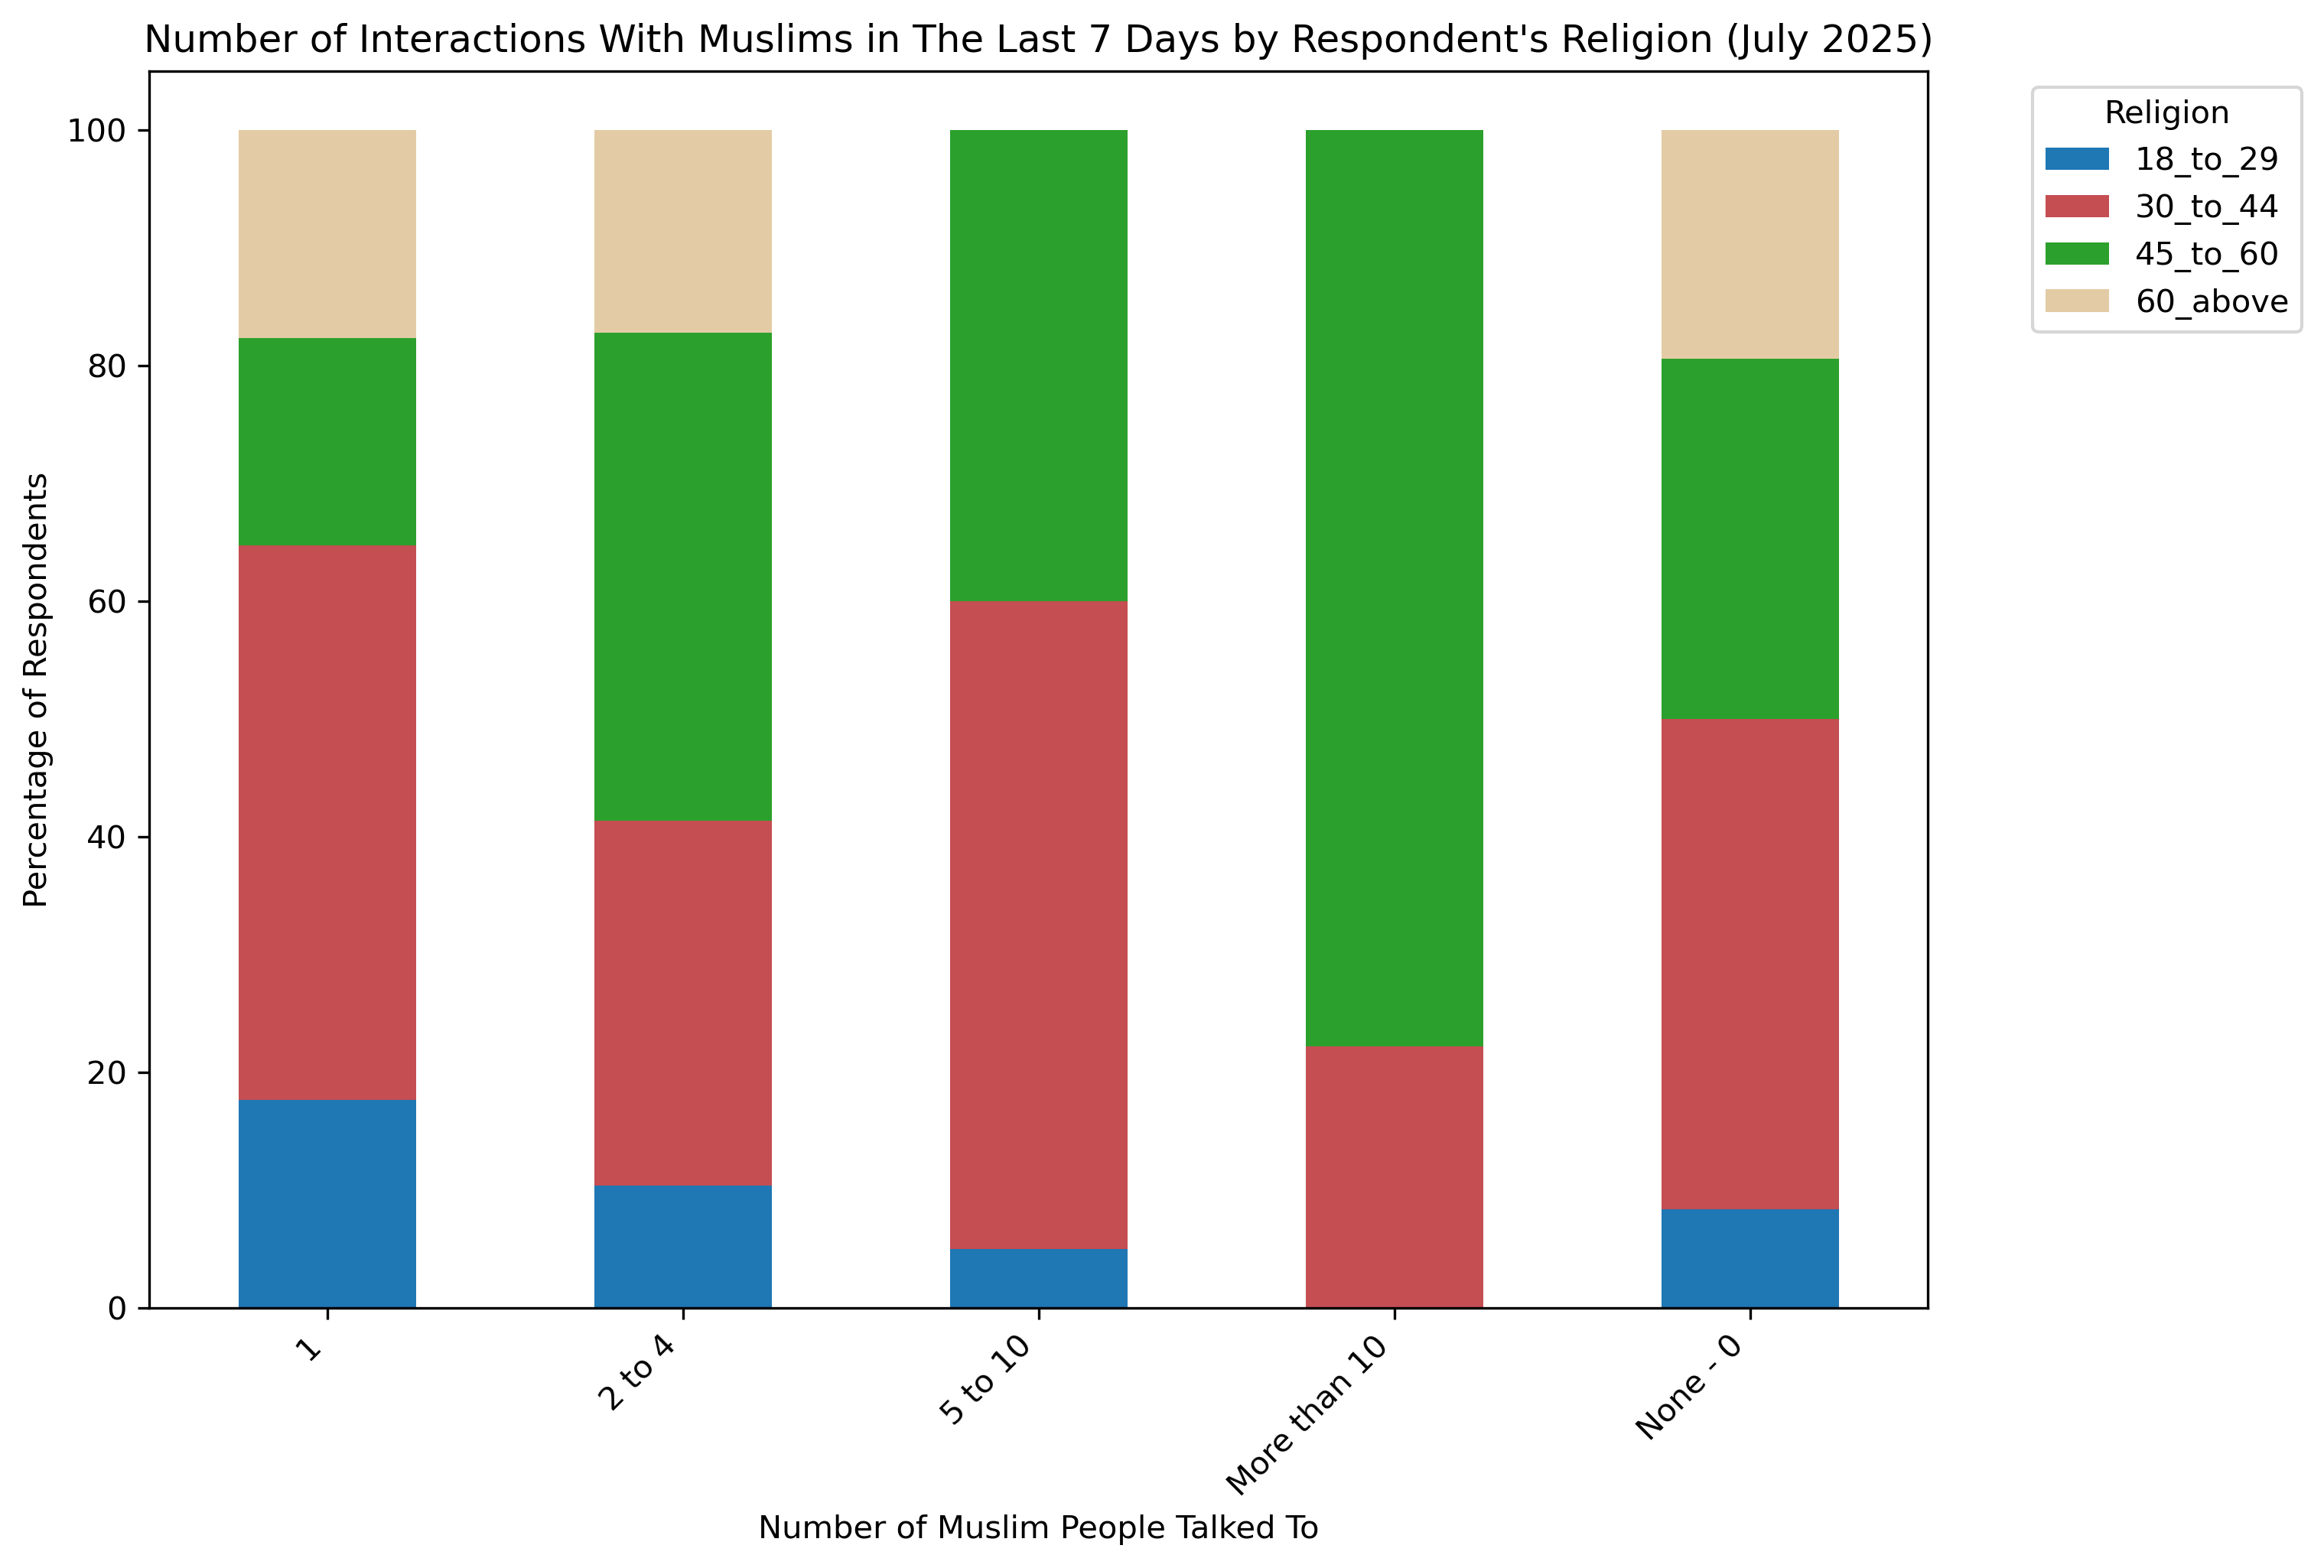

In [38]:
counts = july25.groupby(['How many Muslim people have you talked to in the last 7 days?', 
                        'Age']).size().unstack()

# Convert counts to percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plotting
percentages.plot(kind='bar', stacked=True, figsize=(10, 7), \
                 color = ['#1f77b4', '#c44e52', '#2ca02c', '#e3cba5', '#17becf',
          '#b39ddb', '#7f7f7f', '#f1c40f', '#a6cee3', '#e7969c']

)

plt.title("Number of Interactions With Muslims in The Last 7 Days by Respondent's Religion (July 2025)")
plt.xlabel("Number of Muslim People Talked To")
plt.ylabel("Percentage of Respondents")
plt.xticks(rotation=45, ha='right') 

plt.legend(title="Religion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## News Source and sentiment

Saving plot to: /Users/manelmahroug/Desktop/Muslim-Brand-Sentiment/scripts/../images/News_Source_Distribution_July_2025.png


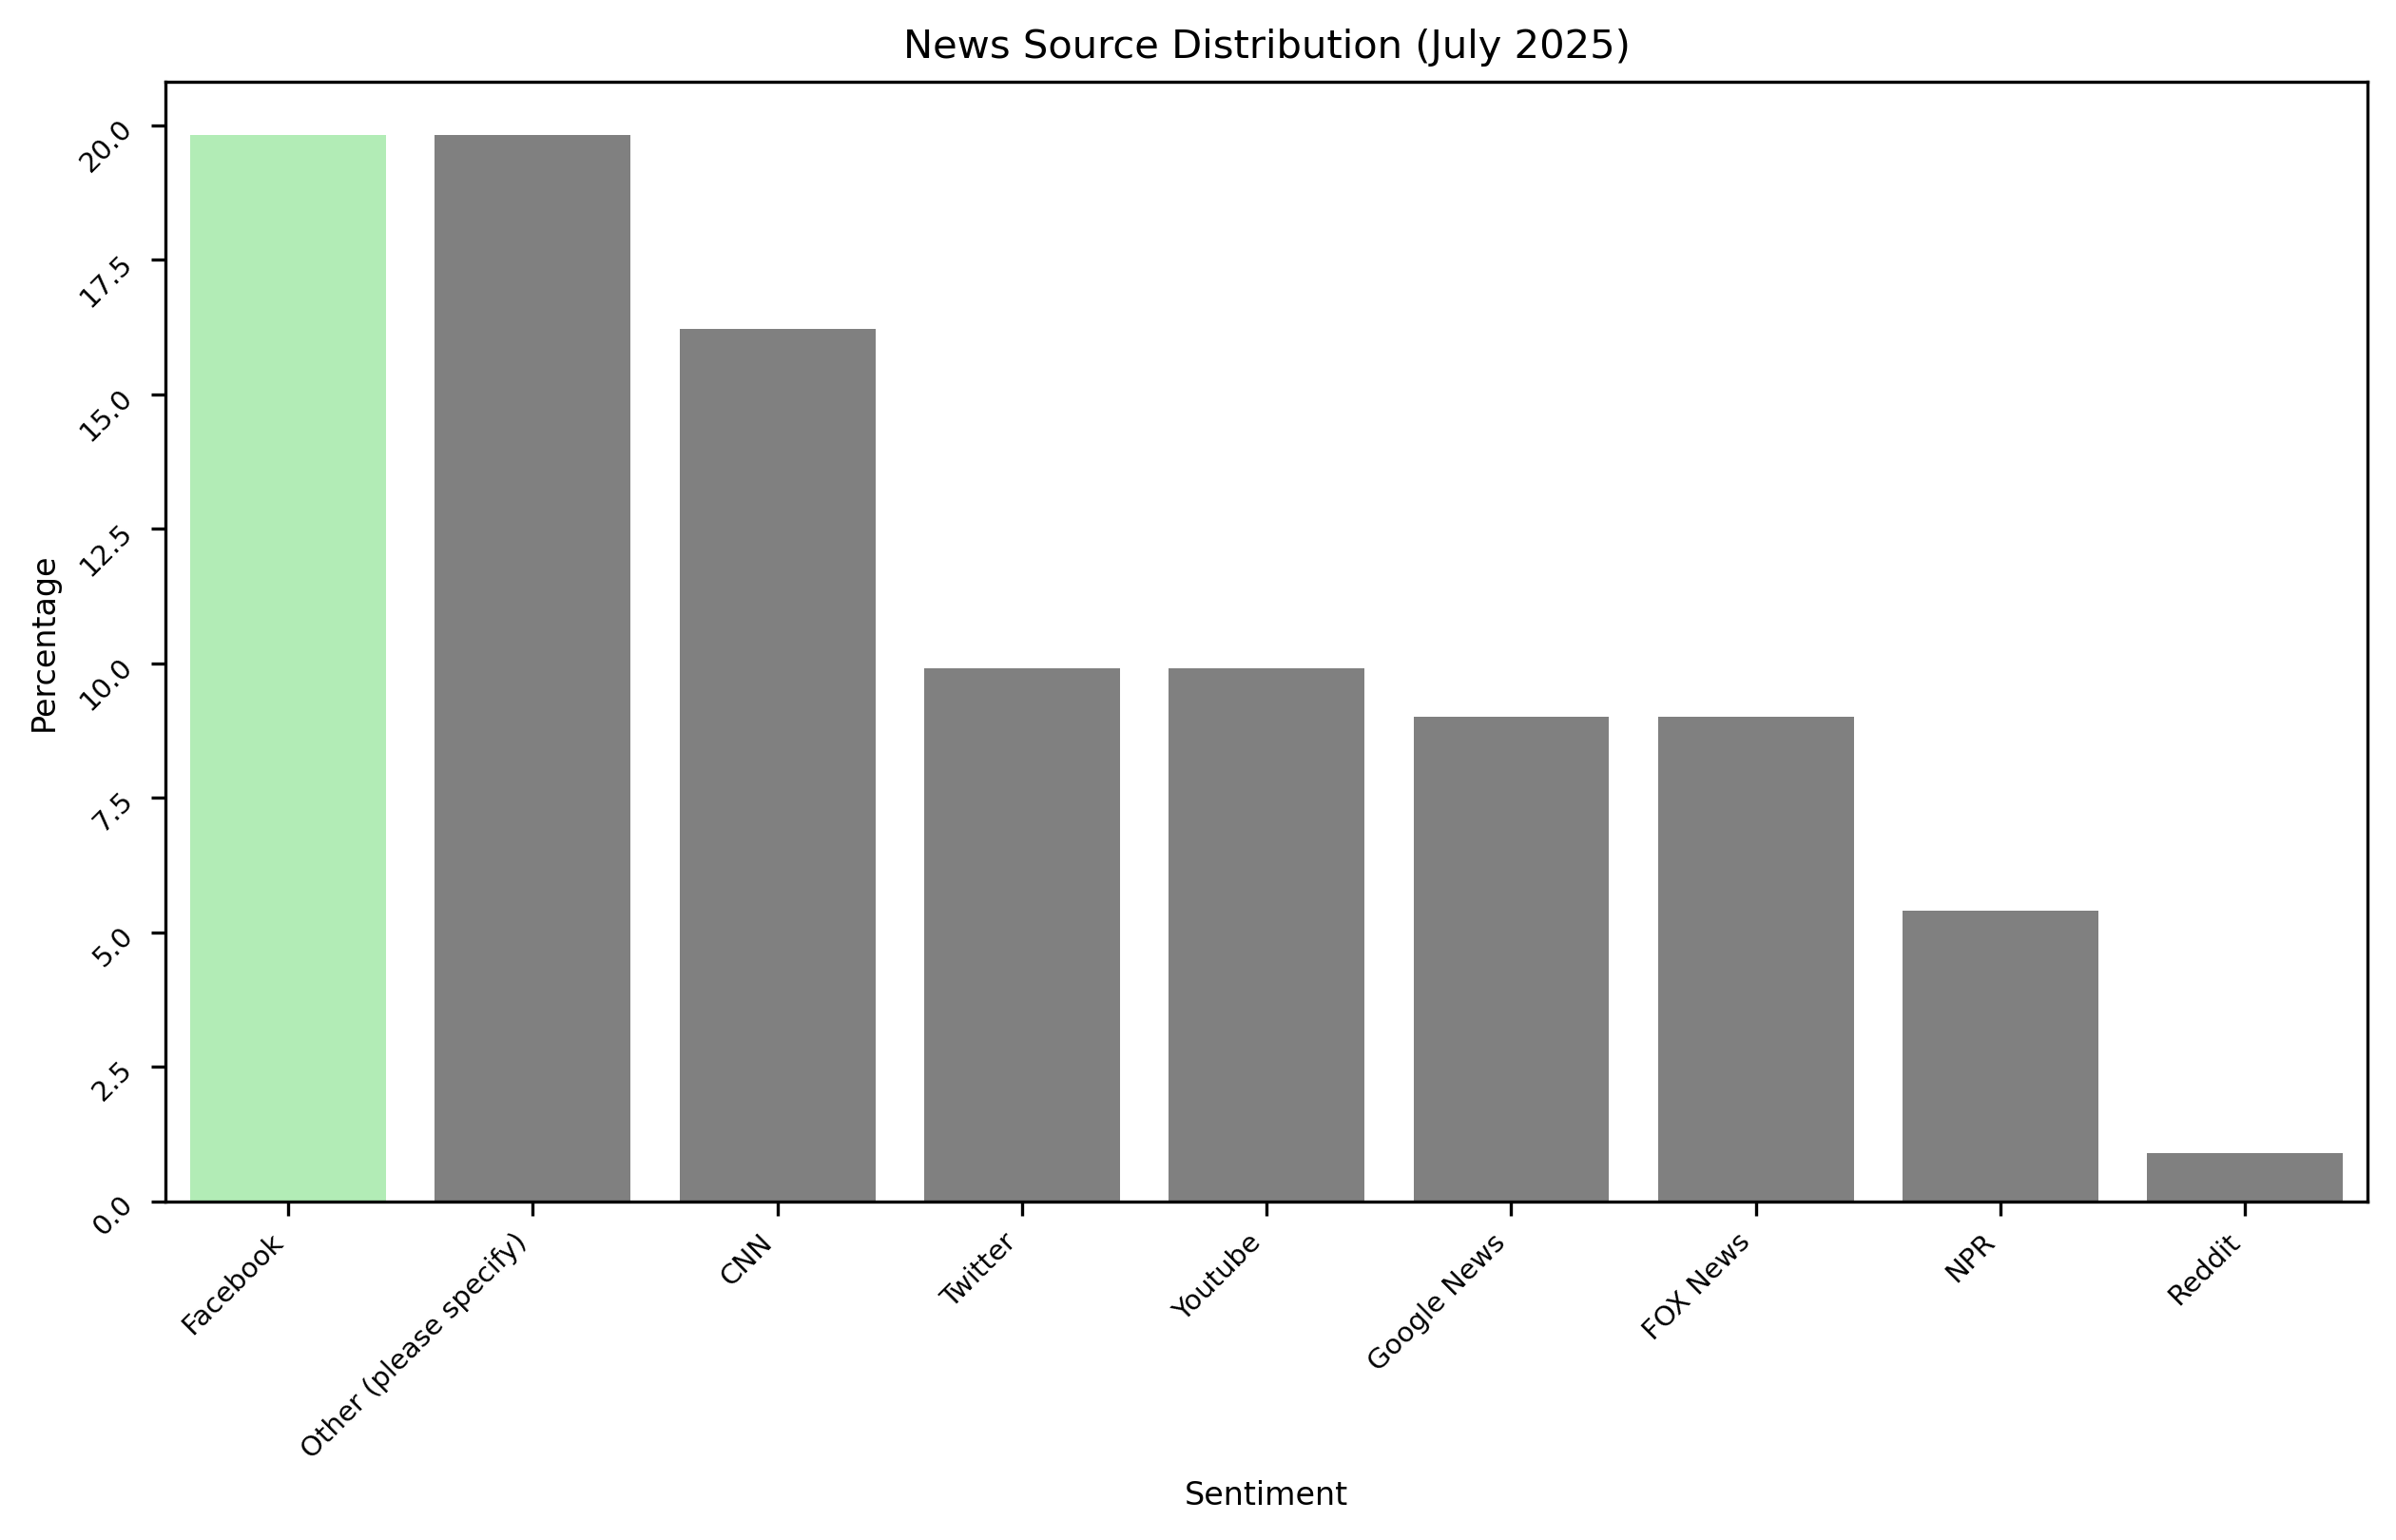

In [41]:
plot_percentages(july25,
                 column_name='Where do you get your news from?',
                 x_label='Sentiment',
                 title='News Source Distribution (July 2025)')

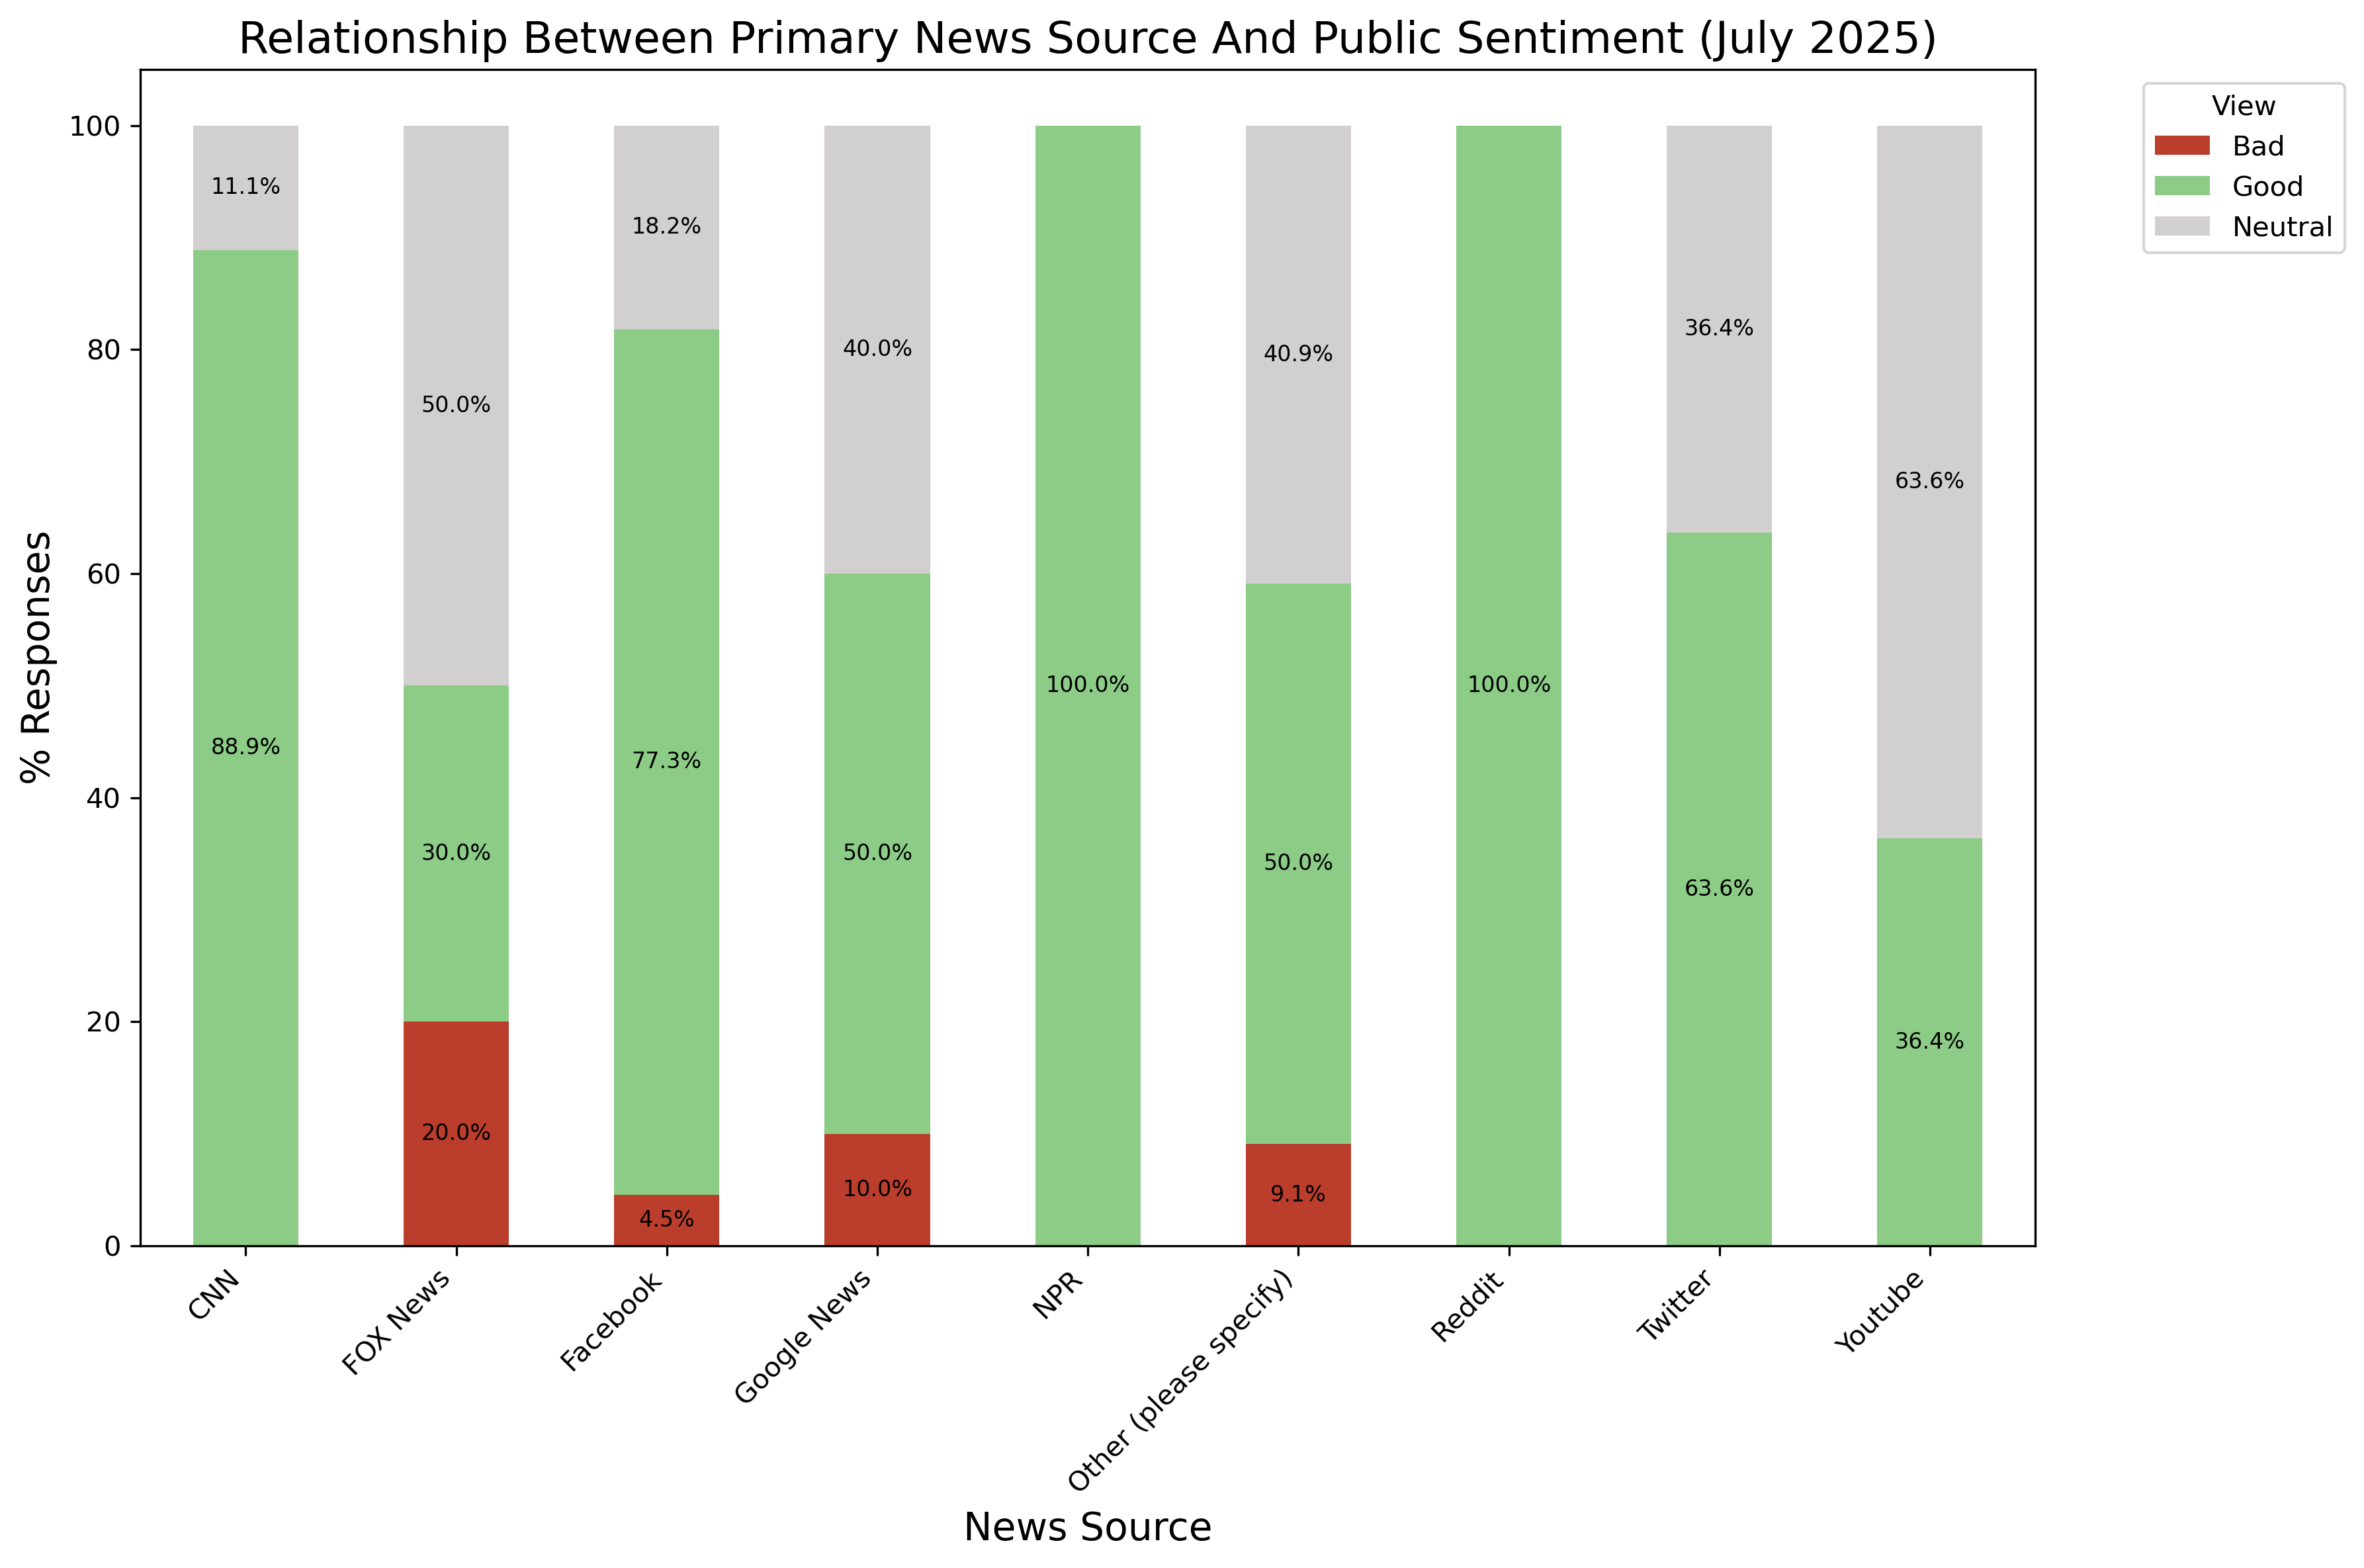

In [39]:
plot_stacked_bar_chart(
    df=july25, 
    title='Relationship Between Primary News Source And Public Sentiment (July 2025)',
    xlabel='News Source',
    ylabel='% Responses',
    cat_col= 'Where do you get your news from?',
    sent_col='How do you feel about Muslim people in America?'
)

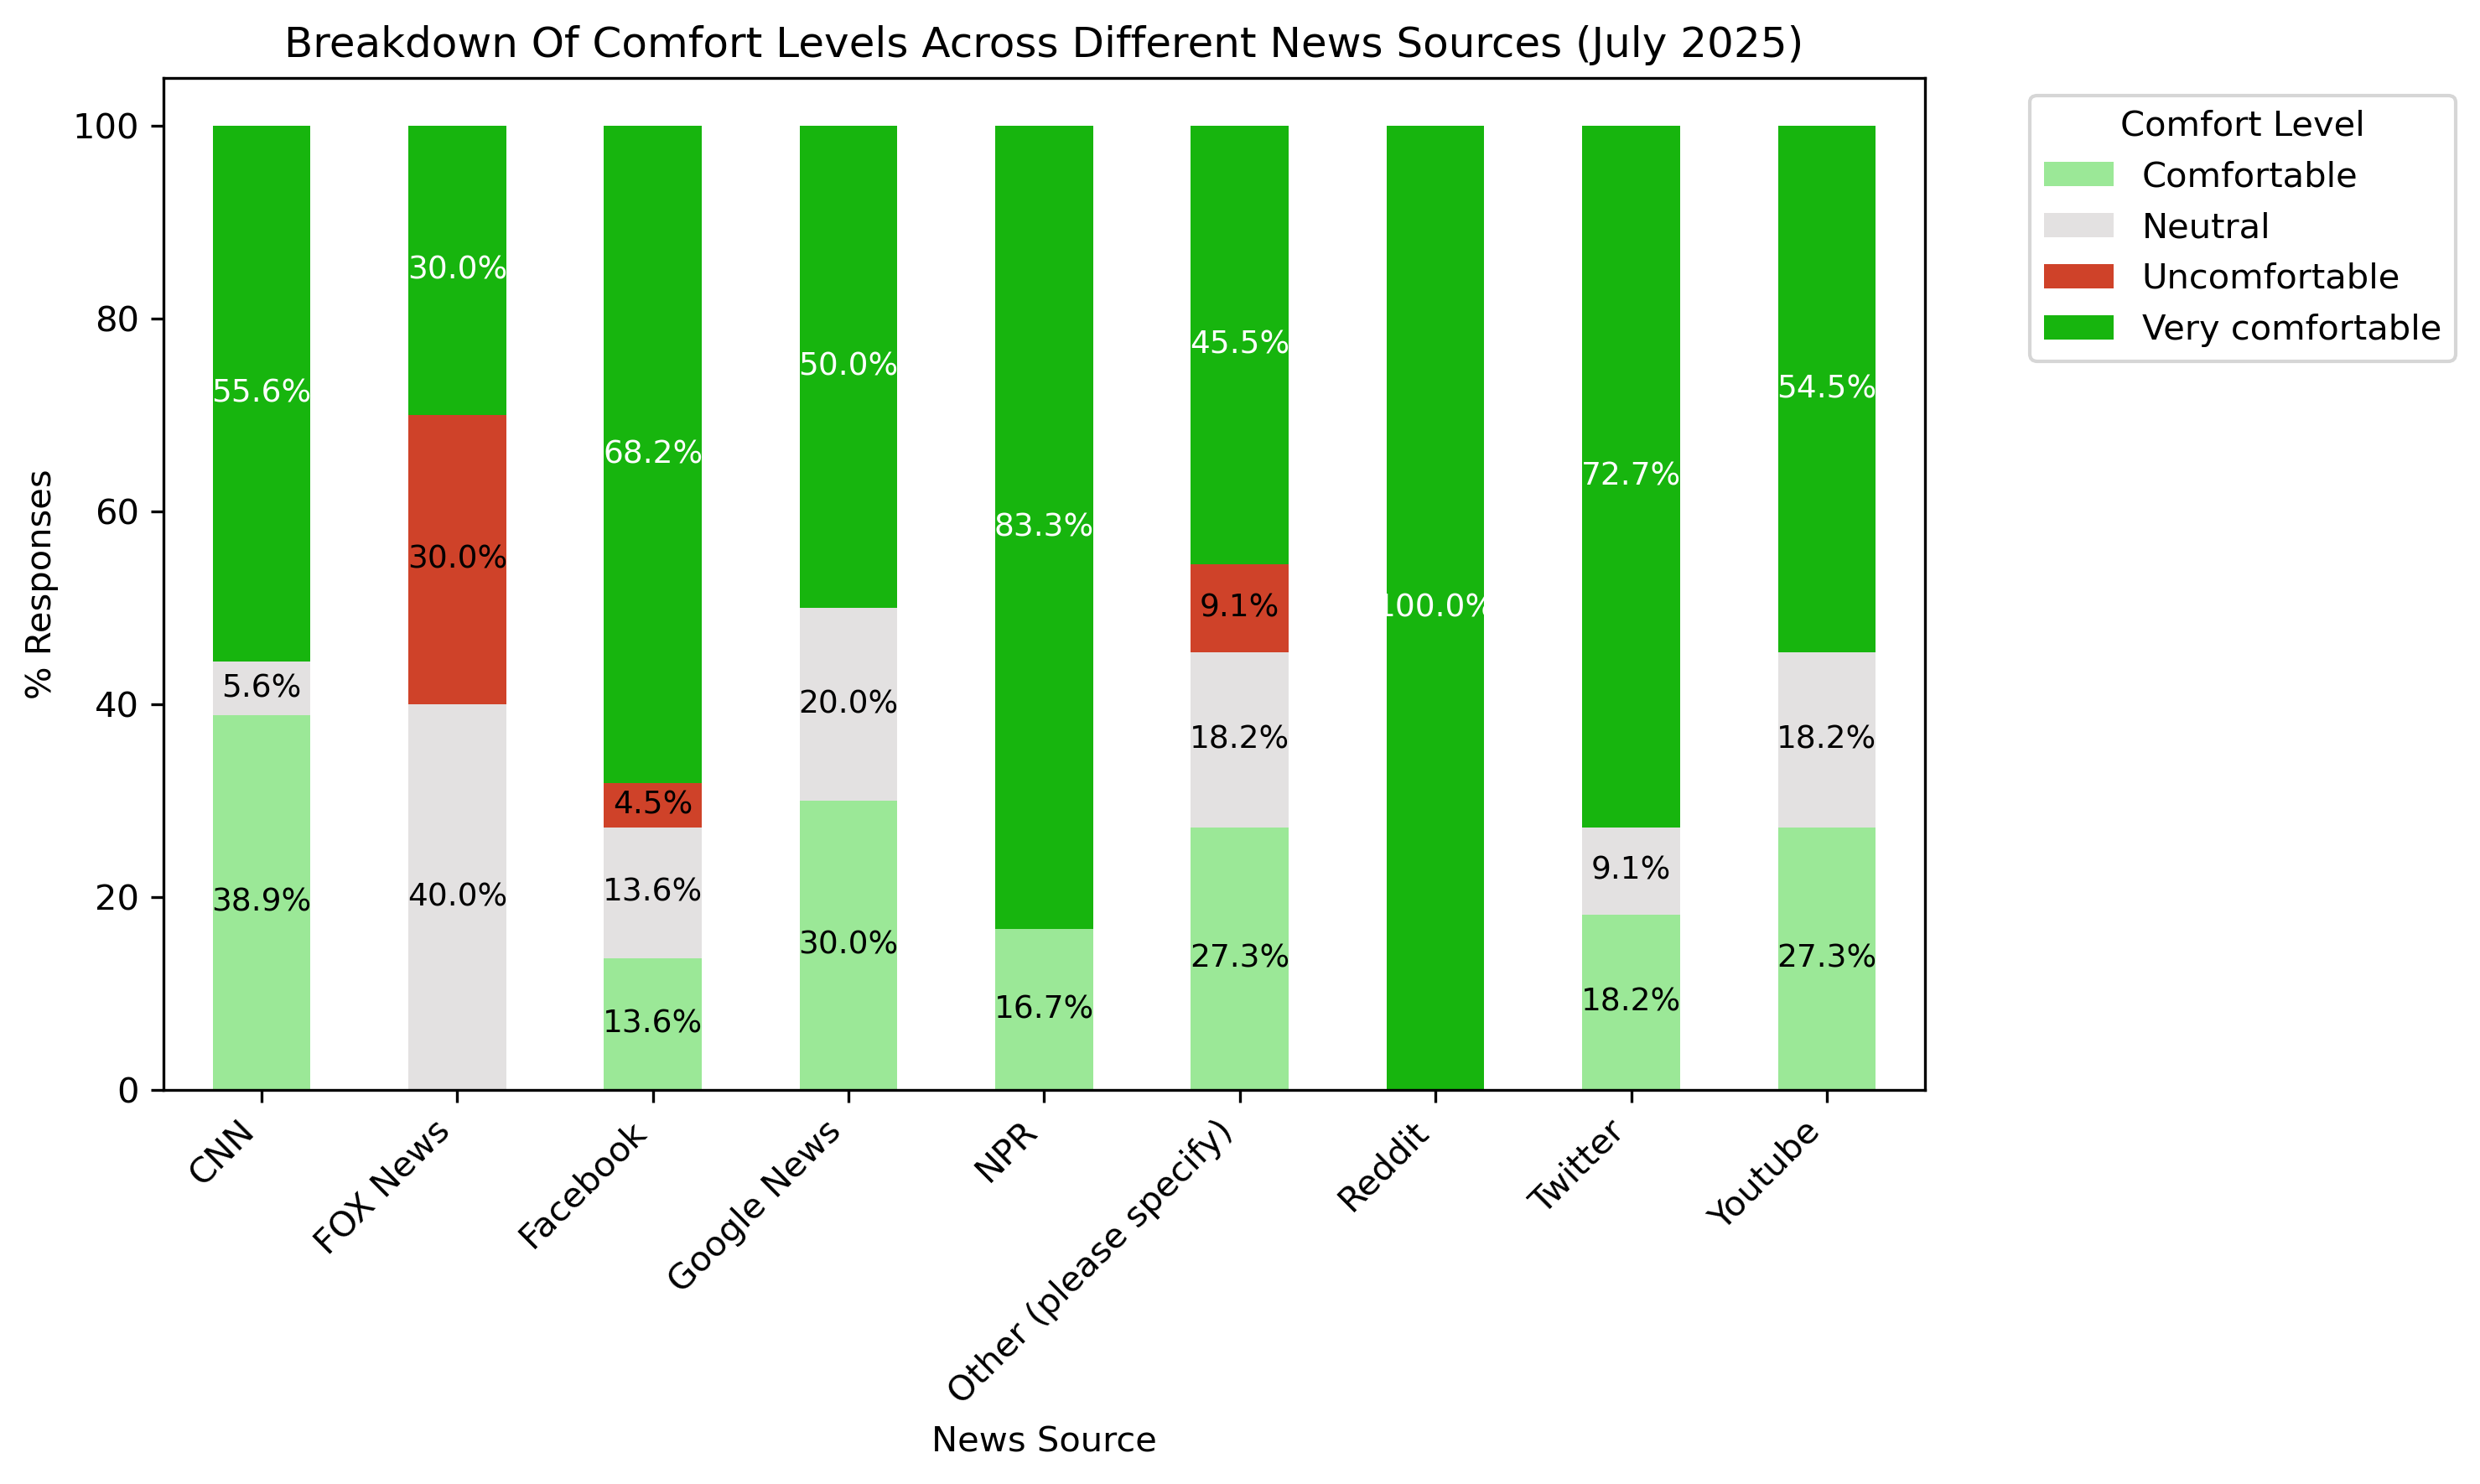

In [42]:
plot_comfort(
    df= july25, 
    category_col= 'Where do you get your news from?',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different News Sources (July 2025)',
    xlabel='News Source',
    ylabel='% Responses',
)

## Relationship Between Exposure to Positive Portrayal and Overall Sentiment

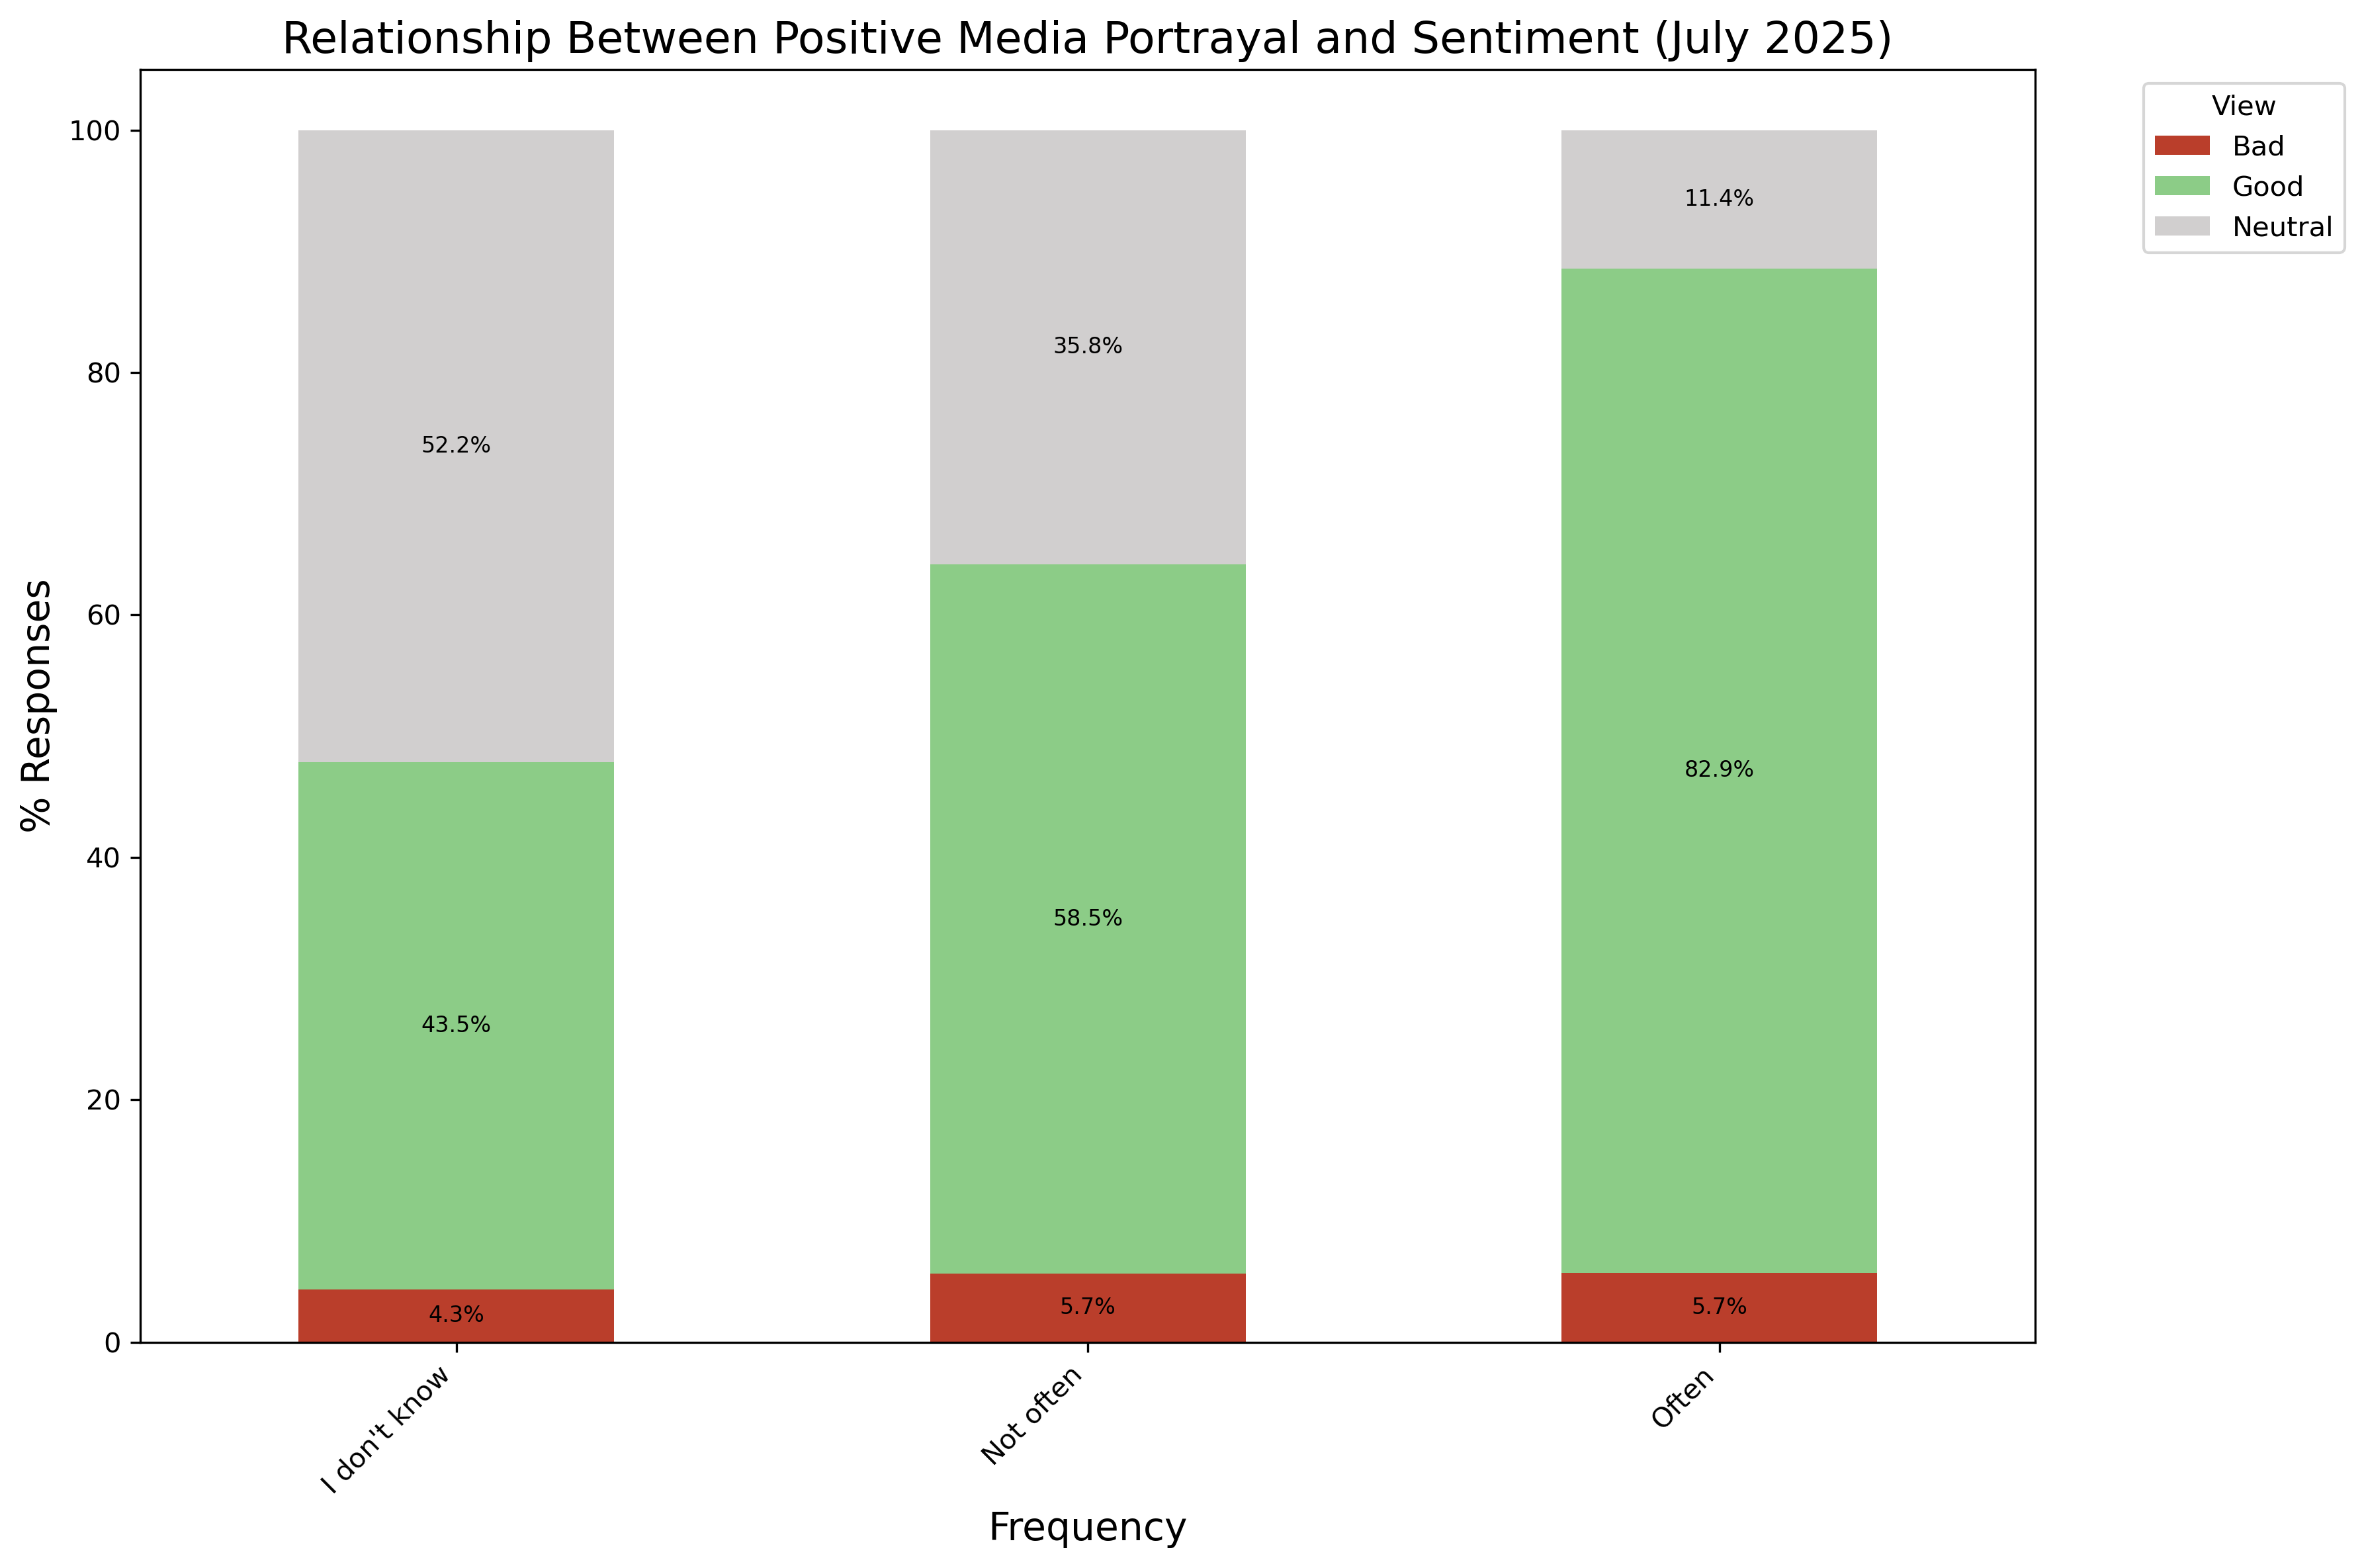

In [43]:
plot_stacked_bar_chart(
    df=july25, 
    title='Relationship Between Positive Media Portrayal and Sentiment (July 2025)',
    xlabel='Frequency',
    ylabel='% Responses',
    cat_col= 'How often do you hear positive things about Muslims in the media?',
    sent_col='How do you feel about Muslim people in America?'
)

Saving plot to: /Users/manelmahroug/Desktop/Muslim-Brand-Sentiment/scripts/../images/Only_30%_Of_Respondents_Reported_Seeing_Positive_Stories_About_Muslims_in_the_Media_July_2025.png


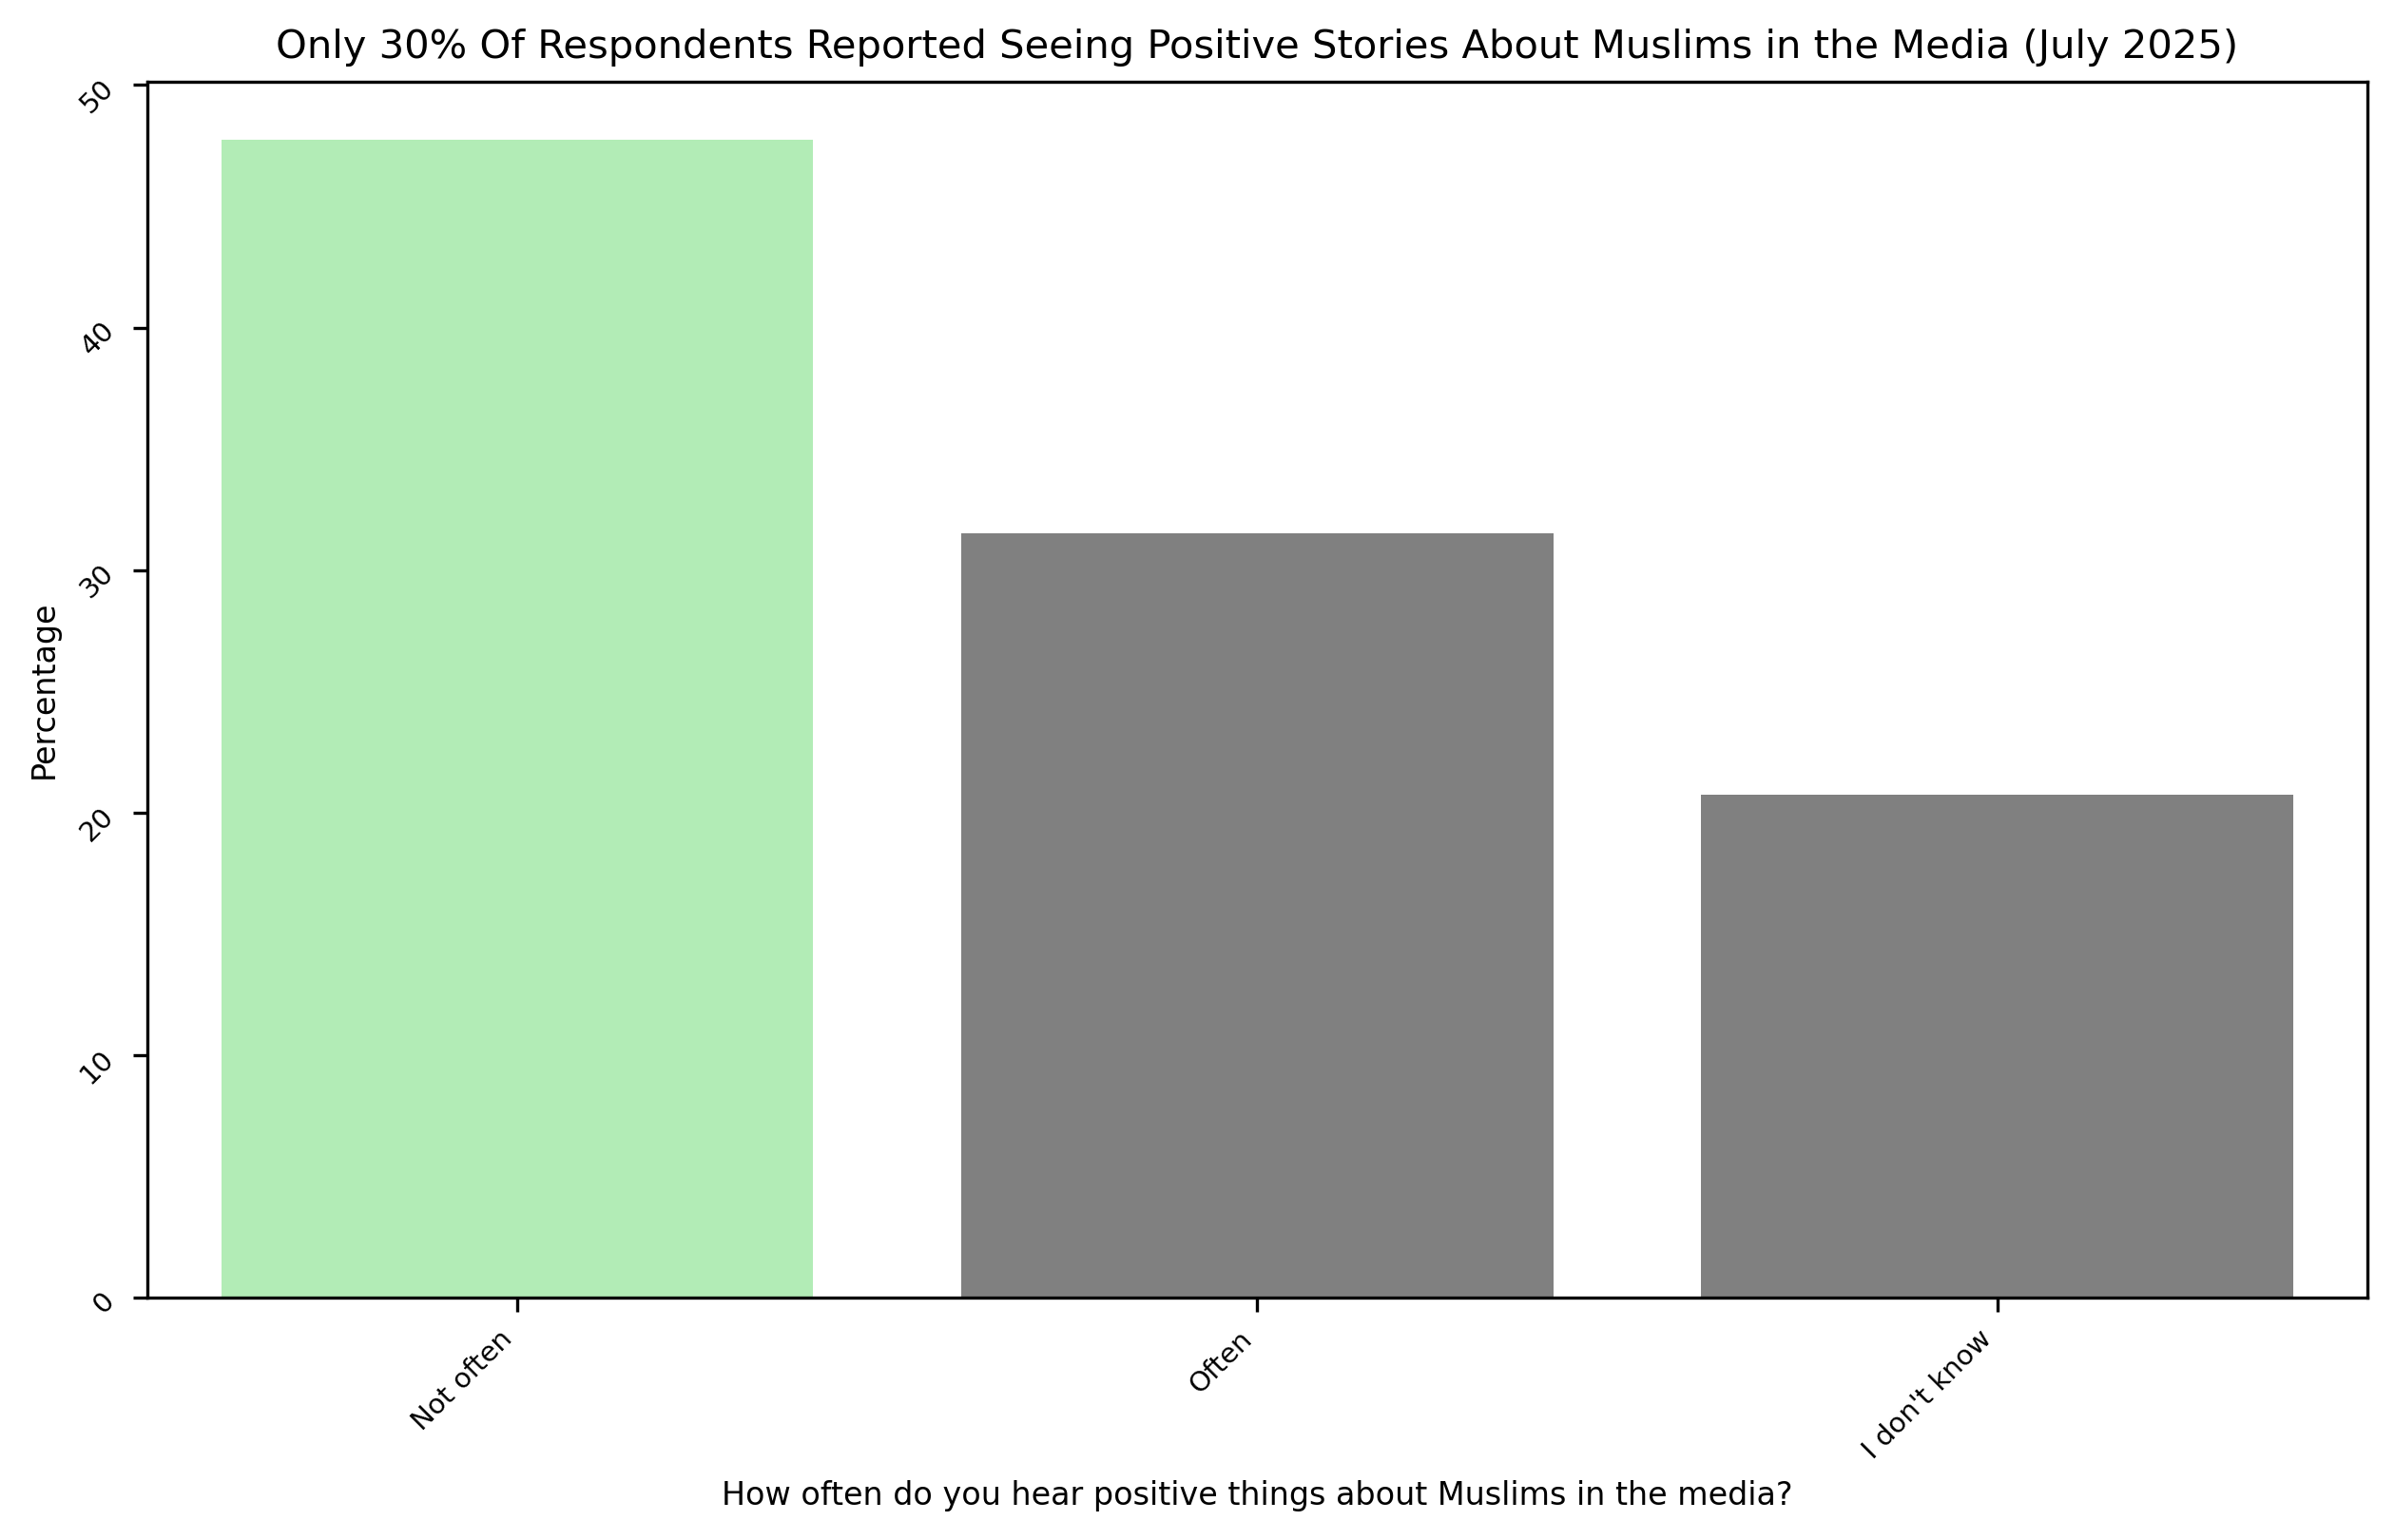

In [46]:
plot_percentages(july25,'How often do you hear positive things about Muslims in the media?', 'How often do you hear positive things about Muslims in the media?',
           'Only 30% Of Respondents Reported Seeing Positive Stories About Muslims in the Media (July 2025)')